## Hent data fra Bibsys autoritetsregister

In [1]:
import requests

def get_author(author):
    query = {'q': author,
             'start':1,
             'max':10,
             'format':'json'}
    res = requests.get("https://authority.bibsys.no/authority/rest/functions/v2/query", params = query)
    return res.json()

def get_author_info_from_key(key):
    query = {'format':'json'}
    res = requests.get("https://authority.bibsys.no/authority/rest/authorities/v2/{key}".format(key=key), params = query)
    return res.json()

def get_marc_post(name):
    r = get_author(name)

    results = r['results']
    #print(results)
    identifiers = [x['identifiersMap']['autid'][0] for x in results if 'autid' in x['identifiersMap']] 
    #print(identifier)
    res = []
    try:
        for identifier in identifiers:
            identifier = identifier.split('x')[1]
            try:
                #print(identifier)
                res.append(get_author_info_from_key(identifier))
            except:
                True #print('feil med:', identifier)
    except:
        True
    return res

def posts(name):
    return [x for x in get_marc_post(name) if x['authorityType'] == 'PERSON']

def life_span(marcpost):
    return [date['value'] for item in  marcpost[0]['marcdata'] for date in item['subfields'] if date['subcode'] == 'd' and item['tag'] == '100']

def alternatives(marcpost):
    return [alt['value'] for item in  marcpost[0]['marcdata'] for alt in item['subfields'] if alt['subcode'] == 'a' and item['tag'] == '400']

def get_authority_info(name):
    marcpost = posts(name)
    if marcpost != []:
        lf = life_span(marcpost)
        alter = alternatives(marcpost)
    else:
        lf = []
        alter = []
    return {'life-span': lf, 'alternatives': alter}

In [2]:
life = lambda x: get_authority_info(x)['life-span']

In [3]:
life('bjerke andre')

['1918-1985']

In [4]:
get_authority_info('zapffe peter')['life-span']

['1899-1990']

In [5]:
get_authority_info("peter zapffe")

{'life-span': ['1899-1990'],
 'alternatives': ['Henriksen, Ib',
  'Wessel Zapffe, Peter',
  'Henriksen, Ibs',
  'Zappfe, Peter Wessel']}

In [6]:
get_authority_info("knut hamsun")

{'life-span': ['1859-1952'],
 'alternatives': ['Hamsunas, Knutas',
  'Ego',
  'W.T.',
  'Han Musheng',
  'Hamsuns, Knuts',
  'Chamsun, Knut',
  'Hamsund, Knut',
  'Chamsoun, Knout',
  'Pedersen, Knud',
  'Hanmusheng, Ke',
  'Hamsun, Kanoot',
  'Hamsund, Knut Pedersen',
  'Thode, Knut',
  'Hamsund, Knud Pedersen',
  'Hamusun, K.',
  'Gamsun, Knut',
  "Hamsun, Knyut'",
  'Hamsuni, Knut',
  'Hamsun, Knuṭ',
  '\u200fה\u200fמסון, קנוט']}

In [4]:
get_authority_info("henrik ibsen")

{'life-span': ['1828-1906'],
 'alternatives': ['Bjarme, Brynjolf',
  'Ibzen, Chenrik',
  'Ibsen, Genrik',
  'Ipusen, Henrikku',
  'Ibsen, Henr.',
  'Yibusheng',
  'Ibsen, Enrico',
  'Ibsenŭ, Chenrikŭ',
  'Ibsen, Hendrik',
  'I-pu-sheng',
  'Ibsen, Henrik Johan',
  'Ibsin, Hinrik',
  'Ibsen, Henryk',
  'Yi bu sheng',
  'Yibusheng',
  '易卜生',
  'Ibsens, Henriks',
  'Ipsen, Errikou',
  'Ibsen, Henrick',
  'Ipusen',
  'Ibseni, Henrik',
  'イプセン, ヘンリック',
  'イブセン',
  'איבסן, הנריק']}

In [5]:
get_authority_info("anne ragde")

{'life-span': ['1957-'],
 'alternatives': ['Ragde, Anne Birkefeldt',
  'Birkefeldt Ragde, Anne',
  'Ragdeová, Anne Birkefeldt',
  'Birkefeldt Ragdeová, Anne',
  'Ragdeová, Anne B.',
  'Ragde, Ane Birkefeld']}

## Test med en tokenmap

In [47]:
names = """Henrik Wergeland - 1812
    Henrik Ibsen - 1286
    Sigrid Undset - 1192
    Jonas Lie - 1177
    Camilla Collett - 1122
    Petter Dass - 1106
    Jørgen Moe - 817
    Arne Garborg - 810
    Amalie Skram - 779
    Sigurd Hoel - 727
    Ludvig Holberg - 716
    Ivar Aasen - 700
    Knut Hamsun - 691
    Georg Brandes - 650
    Nordahl Grieg - 608
    Arnulf Øverland - 606
    Olav Duun - 596
    Tarjei Vesaas - 545
    Bjørnstjerne Bjørnson - 540
    Olaf Bull - 526
    Henrik Wergelands - 518
    Collett Vogt - 460
    Nini Roll - 457
    Jan Erik - 442
    Gunnar Heiberg - 380
    Helge Krog - 378
    Roll Anker - 372
    Dag Solstad - 369
    Nils Collett - 338
    Halldis Moren - 332
    Johan Borgen - 330
    Carl Johan - 328
    Hanna Winsnes - 328
    Johan Falkberget - 326
    Vilhelm Krag - 323
    Rolf Jacobsen - 323
    Inger Hagerup - 322
    Peder Paars - 318
    Olav Aukrust - 316
    Nils Johan - 314
    Sigrid Undsets - 304
    Moren Vesaas - 303
    Tryggve Andersen - 301
    Kristian Elster - 300
    Erik Vold - 298
    Ole Bull - 296
    Alf Prøysen - 291
    Maurits Hansen - 280
    Alf Larsen - 270
    Cora Sandel - 255
    Sjur Gabriel - 252
    Andreas Munch - 243
    Rudolf Nilsen - 241
    Peder Claussøn - 238
    Henrik Ibsens - 235
    Johan Herman - 232
    Per Sivle - 232
    Jonas Lies - 226
    Camilla Colletts - 224
    Hulda Garborg - 223
    Barbra Ring - 223
    Johan Nordahl - 219
    Paal Brekke - 216
    Aslaug Vaa - 212
    Alexander Kielland - 211
    Gabriel Scott - 208
    Kristofer Uppdal - 206
    Karl Johan - 205
    Nordahl Brun - 205
    Herman Wildenvey - 204
    Ronald Fangen - 203
    Johan Ludvig - 202
    Nordahl Rolfsen - 202
    Torborg Nedreaas - 201
    Sigurd Christiansen - 195
    Ingeborg Hagen - 194
    Kåre Holt - 186
    Dikken Zwilgmeyer - 186
    Jørgen Moes - 185
    Jens Bjørneboe - 183
    Stein Mehren - 182
    Aksel Sandemose - 179
    Inger Johanne - 178
    Synnøve Solbakken - 177
    Alvilde Prydz - 177
    Nils Kjær - 177
    Georg Johannesen - 177
    Magdalene Thoresen - 172
    Sigbjørn Obstfelder - 169
    Gunnar Larsen - 167
    Hans Jæger - 166
    Edvard Munch - 156
    Einar Økland - 152
    Finn Havrevold - 151
    Anne Marie - 147
    Nicolai Wergeland - 145
    Sven Moren - 145
    Johan Storm - 143
    Johan Sverdrup - 143
    Peter Andreas - 142
    Willy Dahl - 141
    Herman Wessel - 139
    Francis Bull - 139
    Johan Rud - 138
    Hjalmar Christensen - 134
    Camilla Wergeland - 132
    Regine Normann - 131
    Christian Frederik - 130
    Niels Klim - 130
    Moltke Moe - 127
    Jonas Collett - 126
    Ernst Sars - 126
    Peter Egge - 125
    Ragnhild Jølsen - 124
    Yngvar Nielsen - 123
    Søren Kierkegaard - 121
    John Gabriel - 120
    Henrik Jæger - 119
    Inge Krokann - 119
    Christian Krohg - 119
    Hedda Gabler - 118
    André Bjerke - 118
    Thorbjørn Egner - 117
    Nordahl Griegs - 116
    Claus Frimann - 115
    Johan Bojer - 113
    Sigurd Evensmo - 113
    Håkon Håkonsson - 111
    Bjørg Vik - 111
    Sigurd Hoels - 110
    Johan Christian - 109
    Storm Munch - 108
    Claus Fasting - 107
    Eilert Sundt - 107
    Amalie Skrams - 105
    Asbjørn Hall - 105
    Tor Jonsson - 103
    Carl Nærup - 102
    Claes Gill - 102
    Håkon Håkonssons - 102
    Hans Henrik - 101
    Gerhard Gran - 101
    Gunvor Hofmo - 101
    Rasmus Løland - 98
    Tormod Haugen - 97
    Thomas Krag - 95
    Snorres Edda - 95
    Peter Jonas - 93
    Claussøn Friis - 93
    Halvdan Koht - 92
    Tore Ørjasæter - 91
    Constance Ring - 91
    Ludvig Holbergs - 90
    Alfred Hauge - 89
    Espen Haavardsholm - 89
    Aimée Sommerfelt - 88
    Tor Åge - 87
    Lars Saabye - 87
    Hans Jacob - 86
    Gustav Storm - 86
    Olaf Bulls - 85
    Knut Hamsuns - 84
    Hans Heiberg - 84
    Tor Obrestad - 83
    Kjartan Fløgstad - 83
    Elling Holst - 80
    Edvard Storm - 79
    August Strindberg - 79
    Aasta Hansteen - 78
    Ole Aleksander - 78
    Sonja Hagemann - 78
    Mauritz Hansen - 77
    Gunnar Reiss-Andersen - 77
    Maurits Hansens - 77
    Bernt Lie - 77
    Karl Martin - 76
    Magnus Olsen - 76
    Harald Grieg - 76
    Marie Wexelsen - 76
    Olav Nygard - 76
    Jon Fosse - 76
    Alf Kvasbø - 75
    Hans Nielsen - 74
    Carl Fredrik - 73
    Arthur Omre - 73
    Johan Dahl - 72
    Sturla Tordsson - 72
    Edvard Brandes - 69
    Vilhelm Krags - 69
    Hans Fredrik - 68
    Paul Lange - 68
    Oskar Braaten - 68
    Nordahl Rolfsens - 68
    Jens Tvedt - 66
    Ingeborg Møller - 66
    Reidar Johan - 66
    Halvor Floden - 66
    Jonas Rein - 65
    Erik Skram - 65
    Clemens Petersen - 65
    Karin Bang - 65
    Harald Sverdrup - 64
    Roll Ankers - 64
    Nordal Brun - 63
    Thomas Kingo - 63
    Johan Fredrik - 63
    Maria Stuart - 63
    Magnhild Haalke - 63
    Karen Sundt - 62
    Ebba Haslund - 62
    Edvard Hoem - 62
    Johan Ernst - 61
    Johannes Ewald - 61
    Henrich Steffens - 61
    Anne Karin - 61
    Hans Christian - 60
    Jacob Aall - 60
    Edvard Grieg - 60
    Gunnar Bull - 60
    Ragnvald Vaage - 60
    Per Thomas - 60
    Gro Holm - 60
    Saabye Christensen - 60
    Johan Henrik - 59
    Emil Boyson - 59
    Erlend Loe - 59
    Ludvig Heiberg - 58
    Erling Falk - 58
    Dikken Zwilgmeyers - 58
    Per Olav - 58
    Ragnhild Jølsens - 57
    Åge Bringsværd - 57
    Christian August - 56
    Kristofer Janson - 56
    Elise Aubert - 56
    Sigurd Christiansens - 56
    Fredrik Paasche - 56
    Bjørn Nilsen - 56
    Hulda Garborgs - 56
    Cecilie Løveid - 56
    Carl Frederik - 55
    Halfdan Kjerulf - 55
    Ivar Aasens - 55
    Ragnar Hovland - 55
    Conradine Dunker - 54
    Claus Pavels - 54
    Edvard Bull - 53
    Finn Carling - 53
    Zinken Hopp - 53
    Øystein Lønn - 53
    Christian Fredrik - 52
    Gunnar Heibergs - 52
    Christiane Koren - 51
    Johan Vibe - 51
    Ida Kjerulf - 51
    Olaus Magnus - 51
    Just Bing - 51
    Borghild Rud - 51
    Jens Christian - 50
    Georg Sverdrup - 50
    Niels Henrik - 50
    Ibsens Peer - 50
    Lorentz Dietrichson - 50
    Lars Berg - 50
    Knud Knudsen - 50
    Olav Duuns - 50
    Laura Kieler - 50
    Åse Hiorth - 50
    Dagny Juel - 50
    Jostein Gaarder - 50
    Jan Kjærstad - 50
    Gro Dahle - 50
    Eugenia Kielland - 49
    Jon Bing - 49
    Jakob Sverdrup - 48
    Tønsbergs Blad - 48
    Anna Munch - 48
    Botten Hansen - 48
    Arnulf Øverlands - 48
    Bjørn Bjørnson - 48
    Arnljot Eggen - 48
    Engvald Bakkan - 48
    Andreas Faye - 47
    Herman Bang - 47
    Jens Zetlitz - 47
    Johan Borgens - 47
    Kjell Erik - 47
    Fam Ekman - 47
    Johanne Vogt - 46
    Per Anders - 46
    Johan Sebastian - 46
    Arne Dybfest - 46
    Edith Øberg - 46
    Anne Cathrine - 45
    Adolph Tidemand - 45
    Axel Jensen - 45
    Sven Elvestad - 45
    Solveig Christov - 45
    Klaus Hagerup - 45
    Marie Hamsun - 44
    Tor Hugo - 44
    Edvard Beyer - 44
    Tove Nilsen - 44
    Hjertenæs Andersen - 44
    Agnar Mykle - 44
    Henrik Holm - 43
    Per Sivles - 43
    Daniel Haakonsen - 43
    Karl Marx - 43
    Nielsen Hauge - 42
    Cora Sandels - 42
    Sven Møller - 42
    Gustava Kielland - 42
    Rudolf Muus - 42
    Bull Gundersen - 42
    Katti Anker - 42
    Anders Arrebo - 41
    Charles Kent - 41
    Bjørn Gunnar - 41
    Emil Herje - 41
    Jo Tenfjord - 41
    Sigurd Aa - 41
    Arne Garborgs - 40
    Walter Scott - 40
    Breda Bull - 40
    Erling Pedersen - 40
    Rune Belsvik - 40
    Martin Luthers - 39
    Henrik Anker - 39
    Ole Vig - 39
    Ibsens Brand - 39
    Bernt Lies - 39
    Finn Alnæs - 39
    Anker Møller - 39
    Adam Bodor - 39
    Ludvig Daae - 38
    Inger Marie - 38
    Einar Skavlan - 38
    Trygve Knudsen - 38
    Tryggve Andersens - 38
    Bernhard Stokke - 38
    Astrid Hjertenæs - 38
    Hans Peter - 37
    Jacob Breda - 37
    Henrik Rytter - 37
    Liv Køltzow - 37
    Dag Solstads - 37
    Arild Nyquist - 37
    Herman Jæger - 36
    Hallvard Lie - 36
    Carl Keilhau - 36
    Elling Holsts - 36
    Astrid Tollefsen - 36
    Kjell Heggelund - 36
    Jens Arup - 36
    Knut Faldbakken - 36
    Mette Newth - 36
    Ingvar Ambjørnsen - 36
    Svend Foyn - 36
    Peter Christen - 35
    Martin Luther - 35
    Christopher Bruun - 35
    Sigmund Skard - 35
    Olav Midttun - 35
    Erling Christie - 35
    Alf Prøysens - 35
    Marie Colban - 35
    Hans Børli - 35
    Aasmund Olavsson - 35
    Siful Sifadda - 34
    Rolv Thesen - 34
    Olaf Norli - 34
    Gabriel Scotts - 34
    Babbis Friis-Baastad - 34
    Peder Dass - 33
    Johanne Marie - 33
    Irgens Hansen - 33
    Christian Magnus - 33
    Henrik Steffens - 33
    Petter Larsen - 33
    Leif Hamre - 33
    Rikka Deinboll - 33
    Johan Peter - 32
    Gisle Johnson - 32
    Anne Holtsmark - 32
    Aksel Sandemoses - 32
    Sverre Steen - 32
    Ragnvald Skrede - 32
    Sebastian Welhaven - 32
    Anders Hovden - 32
    Barbra Rings - 32
    Åsta Holth - 32
    Arvid Hanssen - 32
    Karin Moe - 32
    Per Knutsen - 32
    Karin Beate - 32
    Virginia Woolf - 32
    Hans Jørgen - 31
    Peder Bjørnson - 31
    Anders Christensen - 31
    Ronald Fangens - 31
    Ole Hallesby - 31
    Sigmund Freud - 31
    Martin Andersen - 31
    Jens Thiis - 31
    Gunnar Lunde - 31
    Arup Seip - 31
    Einar Skjæraasen - 31
    Jakob Sande - 31
    Inger Hagerups - 31
    Arne Næss - 31
    Eva Jensen - 31
    Åse Skard - 31
    Anne Margrethe - 30
    Johan Frederik - 30
    Vilhelmine Ullmann - 30
    Ludvig Daa - 30
    Friedrich Nietzsche - 30
    Møller Kristensen - 30
    Leonora Christina - 30
    Tor Ulven - 30
    Ole Bulls - 29
    Karl Johans - 29
    Augusta Hagerup - 29
    Niels Krog - 29
    Søren Kierkegaards - 29
    Harald Beyer - 29
    Øyvind Anker - 29
    Marcus Jacob - 29
    Bernt Støylen - 29
    Didrik Arup - 29
    Vera Henriksen - 29
    Gudrun Larsen - 29
    Sigrun Okkenhaug - 29
    Herbjørg Wassmo - 29
    Erling Kittelsen - 29
    Saabye Christensens - 29
    Egil Børre - 29
    Johan Nordal - 28
    Gerhard Schøning - 28
    Helene Dickmar - 28
    Tor Fretheim - 28
    Walt Whitman - 28
    Peter Christian - 27
    Anne Sophie - 27
    Peter Frederik - 27
    Bjørnstjerne Bjørnsons - 27
    Marcus Thrane - 27
    Arne Paasche - 27
    Inger Elisabeth - 27
    Paal-Helge Haugen - 27
    Else Breen - 27
    James Joyce - 27
    Lorens Berg - 27
    Frederik Christian - 26
    Johan Andreas - 26
    Peter Hansen - 26
    Rolf Olsen - 26
    Collett Vogts - 26
    Karl Jonsson - 26
    Paul Gjesdahl - 26
    Nils Lie - 26
    Christian Krohgs - 26
    Andreas Haukland - 26
    Gunnar Olsen - 26
    Kjell Aukrust - 26
    Jon Michelet - 26
    Mathilde Schjøtt - 26
    Sigrid Heide - 26
    Harald Lyche - 26
    Kari Bøge - 26
    Olav Kaldestad - 26
    Ingvar Moe - 26
    Thorstad Hauger - 26
    Jens Peter - 25
    Sigurd Ibsen - 25
    Normann Dahl - 25
    Charles Darwin - 25
    Dagmar Blix - 25
    Philip Newth - 25
    Trond Berg - 25
    Ottar Grepstad - 25
    Olavsson Vinje - 25
    Ole Olsen - 24
    Thomas Krags - 24
    Jacob Monrad - 24
    Bernhard Herre - 24
    Kristian Elsters - 24
    Sofie Aubert - 24
    Odd Solumsmoen - 24
    Peter Dirk - 24
    Lars Kjølstad - 24
    Bolette Gjør - 24
    Fredrik Dahl - 24
    Helge Rønning - 24
    Sverre By - 24
    Kari Ørbech - 24
    Bjørn Rongen - 24
    Magdalene Thoresens - 24
    Jan Kjærstads - 24
    Tone Birkeland - 24
    Jonas Anton - 23
    Johan Sverdrups - 23
    Lyder Sagen - 23
    Olaf Røst - 23
    Olaus Nielsen - 23
    Adam Oehlenschlåger - 23
    Ernst Orvil - 23
    Jan Bull - 23
    Helge Hagerup - 23
    Odd Martin - 23
    Jens Bjørneboes - 23
    Knut Johansen - 23
    Elisabeth Schøyen - 23
    Vetle Vislie - 23
    Kirsten Langbo - 23
    Kjell Askildsen - 23
    Fridtjof Nansen - 23
    Johannes Heggland - 23
    Sissel Solbjørg - 23
    John Donner - 23
    Ingeborg Hagens - 23
    Anne Elisabeth - 22
    Charlotte Amalie - 22
    Jacob Kielland - 22
    Anton Martin - 22
    Jens Kraft - 22
    Nikolai Wergeland - 22
    Camilla Wergelands - 22
    Are Frode - 22
    Friedrich Schlegel - 22
    Peder Claussøns - 22
    Anders Krogvig - 22
    Erik Eggen - 22
    Ole Bentsen - 22
    Hallvard Bergh - 22
    Olav Sletto - 22
    Leif Longum - 22
    Vigdis Rojahn - 22
    Thomas Andersen - 22
    Emerentze Munch - 22
    Wenche Øyen - 22
    Børre Johnsen - 22
    Albert Camus - 22
    Marie Elisabeth - 21
    Henrik Christian - 21
    Elisabeth Hansen - 21
    Jacob Neumann - 21
    Alexander Kiellands - 21
    Andreas Munchs - 21
    Carl Gustav - 21
    Sigvat Tordsson - 21
    Jacob Grimm - 21
    Kjartan Fløgstads - 21
    Minda Ramm - 21
    Katharina Gjesdahl - 21
    Åsta Holths - 21
    Birger Jåstad - 21
    Ida Mathisen - 21
    Håkon Melberg - 21
    Stein Backe - 21
    Mona Lyngar - 21
    Mari Osmundsen - 21
    Rolf Jacobsens - 21
    Hans Normann - 21
    Oluf Ryghs - 21
    Ole Christian - 20
    Karen Marie - 20
    Niels Treschow - 20
    Hans Bull - 20
    Erik Lie - 20
    George Frederik - 20
    Johan Vogt - 20
    Inger Heiberg - 20
    Leif Mæhle - 20
    Stuart Mill - 20
    Johan Falkbergets - 20
    Odd Eidem - 20
    Philip Houm - 20
    Johan Berle - 20
    Norden Norden - 20
    Ingebjørg Mælandsmo - 20
    Gina Krog - 20
    Ebba Haslunds - 20
    Aksel Berentsen - 20
    Einar Øklands - 20
    Ove Røsbak - 20
    Pål Gerhard - 20
    Dahl Sem - 20
    Charles Baudelaire - 20
    Rolf Stenersen - 20
    The Art - 20
    Jens Andreas - 19
    Carl Christian - 19
    Fredrik Christian - 19
    Carl Johans - 19
    Else Marie - 19
    Gustav Jensen - 19
    Hans Jægers - 19
    Theodor Kjerulf - 19
    Frederik Stang - 19
    Gabriel Finne - 19
    Nicolai Wergelands - 19
    Nicolai Schwach - 19
    Arne Odd - 19
    Erling Nielsen - 19
    Nils Erik - 19
    Reidar Djupedal - 19
    Rasmus Lølands - 19
    Aslaug Groven - 19
    Eivind Nielsen - 19
    Margrethe Munthe - 19
    Jan-Magnus Bruheim - 19
    Hans Aanrud - 19
    Alfred Hauges - 19
    Ragna Nielsen - 19
    Aslaug Vaas - 19
    Kari Skjønsberg - 19
    Martin Arnesen - 19
    Olaf Benneche - 19
    Øyvind Berg - 19
    Annik Saxegaard - 19
    Einar Gerhardsen - 19
    Mona Hoff - 19
    Aasmund Brynildsen - 19
    Johan Carl - 18
    Anna Marie - 18
    Cathrine Elisabeth - 18
    Anne Christine - 18
    Jens Henrik - 18
    Christopher Bruuns - 18
    Jacob Nicolai - 18
    Ingeborg Marie - 18
    Hans Hanson - 18
    Hans Thomas - 18
    Arne Løchen - 18
    Knut Liestøl - 18
    Thomasine Lie - 18
    Tore Hamsun - 18
    Olav Dalgard - 18
    Sigurd Bødtker - 18
    Arne Ording - 18
    Haakon Lie - 18
    Georg Johannesens - 18
    Rasmus Lie - 18
    Ellisiv Steen - 18
    Jon Flatabø - 18
    Fernanda Nissen - 18
    Gro Holms - 18
    Eivind Tverbak - 18
    Otto Andreas - 18
    Erna Moen - 18
    Hans Allum - 18
    Ole Robert - 18
    Lauritz Johnson - 18
    Astrid Lindgren - 18
    Kjersti Scheen - 18
    Roald Amundsen - 18
    Absalon Beyer - 18
    Hanne Ørstavik - 18
    Petter Næss - 18
    Clara Tschudi - 18
    Jens Edvard - 17
    Johanne Margrethe - 17
    Johan Georg - 17
    Inger Charlotte - 17
    Erik Pontoppidans - 17
    Simon Kildal - 17
    Herman Foss - 17
    Ole Gabriel - 17
    Johan Welhaven - 17
    Hans Gram - 17
    Olav Aukrusts - 17
    Egil Rasmussen - 17
    Undsets Kristin - 17
    Olav Bø - 17
    Nordahl Rolf - 17
    Fredrik Engelstad - 17
    Asbjørn Aarseth - 17
    Knut Gjengedal - 17
    Thorbjørn Egners - 17
    Conradine Dunkers - 17
    Clay Allison - 17
    Hobæk Haff - 17
    Harald Bakke - 17
    Otlu Alsvik - 17
    Erik Volds - 17
    Evi Bøgenæs - 17
    Anka Borch - 17
    Berg Eriksen - 17
    Svein Nyhus - 17
    Kim Karlsen - 17
    Harald Eeg - 17
    Olaf Hansen - 16
    Dorothea Maria - 16
    Wilhelm Andreas - 16
    Emil Stang - 16
    Claus Berg - 16
    Erik Bøgh - 16
    Ivar Åsen - 16
    Ludwig Tieck - 16
    Jacob Munch - 16
    Christian Boeck - 16
    Hans Strøm - 16
    Louis Kvalstad - 16
    Jørgen Bukdahl - 16
    Hans Midbøe - 16
    Kristofer Uppdals - 16
    Johan Ruds - 16
    Asbjørn Aarnes - 16
    Jørgen Wendt - 16
    Magdalene Buchholm - 16
    Asbjørn Krag - 16
    Valborg Platou - 16
    Bergljot Hobæk - 16
    Karin Elstad - 16
    Eldrid Lunden - 16
    Wenche Krossøy - 16
    Karin Sveen - 16
    David Faye - 16
    Elisabeth Dored - 16
    Thor Larsen - 16
    Gunnar Staalesen - 16
    Merete Morken - 16
    Beate Vold - 16
    Sorte Bill - 16
    Eivind Berggrav - 16
    Franz Kafka - 16
    Nils Christian - 15
    Anna Cathrine - 15
    Ole Andreas - 15
    Frederik Wilhelm - 15
    Emil Jonas - 15
    Johan Christopher - 15
    Anton Wilhelm - 15
    Carl Paul - 15
    Johan Nilsen - 15
    Hans Olaf - 15
    Hans Nilsen - 15
    Christian Frederiks - 15
    Hedevig Rosing - 15
    Amalie Sofie - 15
    Erik Johan - 15
    Fredrik Petersen - 15
    Bjørnsons Sigurd - 15
    Kåre Foss - 15
    Peder Monsen - 15
    Kristen Stalleland - 15
    Arne Magnusson - 15
    Holbergs Erasmus - 15
    Benedicte Stendal - 15
    Kari Gløersen - 15
    Kirsten Brunvoll - 15
    Cecilie Løveids - 15
    Solstads Arild - 15
    Juhl Vogt - 15
    Faye Knudsen - 15
    Werner Skibsted - 15
    Rudolf Hultengreen - 15
    Henry Notaker - 15
    Erik Vindtorn - 15
    Elisabeth Wikborg - 15
    Petter Moen - 15
    Gunvor Risa - 15
    Odd Brochmann - 15
    Torill Thorstad - 15
    Solbjørg Bjugn - 15
    Kjell Ivar - 15
    Stein Erik - 15
    Harald Eia - 15
    Herman Anker - 14
    Anne Johanne - 14
    Henrik Abel - 14
    Carl August - 14
    Johan Jørgen - 14
    Ole Jacob - 14
    Lars Hansen - 14
    Hartvig Nissen - 14
    Andreas Aubert - 14
    Conrad Nicolai - 14
    Karen Nilsen - 14
    Fredrikke Egeberg - 14
    Jacob Edvard - 14
    Dorothea Christensen - 14
    Inger Johannes - 14
    Ole Vigs - 14
    Engebret Hougen - 14
    Helge Krogs - 14
    Kåre Fasting - 14
    Harald Noreng - 14
    Lippe Konow - 14
    Abraham Løvdahl - 14
    Breda Bulls - 14
    Anders Bye - 14
    Paulus Svendsen - 14
    Tom Kristensen - 14
    Olaf Øyslebø - 14
    Einar Østvedt - 14
    Nils Bjørgås - 14
    Helge Sverre - 14
    Sigbjørn Hølmebakk - 14
    Jonas Fjeld - 14
    Regine Normanns - 14
    Kari Gløersens - 14
    Marta Oulie - 14
    Gudmund Hovdenak - 14
    Lorenz Juhl - 14
    Andreas Anderssen - 14
    Per Linge - 14
    Amaldus Nielsen - 14
    Hugo Schwarz - 14
    Kjell Lars - 14
    Gerhard Olsen - 14
    Margit Ravn - 14
    Harald Nordberg - 14
    Beate Audum - 14
    Herman Jansen - 14
    Bjørnsons Arne - 13
    Bergens By - 13
    Erik Andreas - 13
    Ole Hansen - 13
    Aars Fest - 13
    Albert Henrik - 13
    Anton Christian - 13
    Elisabeth Margrethe - 13
    Nils Nilsen - 13
    Magdalene Sophie - 13
    Olaf Skavlan - 13
    Karl Magnus - 13
    Ferdinand Carl - 13
    Envold Falsen - 13
    Sæmund Frode - 13
    Benjamin Dass - 13
    Harald Schjelderup - 13
    Trygve Braatøy - 13
    Olav Storstein - 13
    Edvard Stang - 13
    Inger Simonsen - 13
    Ola Moe - 13
    Hermine Bernhoft - 13
    Zwilgmeyers Inger - 13
    Leiv Amundsen - 13
    Reidar Brodtkorb - 13
    Hilda Dahl - 13
    Aubert Lindbæk - 13
    Øvre Richter - 13
    Irene Engelstad - 13
    Anna Munchs - 13
    Toril Brekke - 13
    Ellisif Wessel - 13
    Johannes Schrøder - 13
    Olaf Forstrøm - 13
    Gunnar Sønsteby - 13
    Rune Andersen - 13
    Tone Ringen - 13
    Geir Pollen - 13
    Lars Amund - 13
    Tone Hødnebø - 13
    Jan Ragnar - 13
    Michael Sars - 13
    Harry Fett - 13
    Erna Osland - 13
    Salman Rushdie - 13
    Arne Dag - 13
    Elias Kræmmer - 13
    Margaret Skjelbred - 13
    Per Thoresen - 13
    Berthe Aarflot - 13
    Bolette Margrethe - 12
    Maren Marie - 12
    Thomas Rosing - 12
    Maren Christine - 12
    Nils Andreas - 12
    John Collett - 12
    Dorothea Marie - 12
    John Stenersen - 12
    Fredrik Stang - 12
    Georg Frederik - 12
    Bolette Nissen - 12
    Storm Munchs - 12
    Karl Georg - 12
    Christopher Hansen - 12
    Jonas Colletts - 12
    Elisabeth Welhaven - 12
    Christen Asbjørnsen - 12
    Christensen Arrebo - 12
    Peder Lauritsen - 12
    Peter Dass - 12
    Knud Ibsen - 12
    Peter Wessel - 12
    Nordahl Bruns - 12
    Peter Christopher - 12
    Botten Hansens - 12
    Sophus Bugge - 12
    Kristian Schjelderup - 12
    Moltke Moes - 12
    I.s Peer - 12
    Jørgen Dam - 12
    Johannes Flintoe - 12
    Bjørnsons Magnhild - 12
    Erik Bye - 12
    Johannes Thrap-Meyer - 12
    Hjorth Johansen - 12
    Matti Aikio - 12
    Solveig Haugan - 12
    Helene Lassen - 12
    Agnes Mathilde - 12
    Richter Frich - 12
    Karen Grude - 12
    Ellen Key - 12
    Henriette Bie - 12
    Vigdis Stokkelien - 12
    Gunvor Stornes - 12
    Sigwardt Aspestrand - 12
    Audun Hierman - 12
    Egil Hjorth-Jenssen - 12
    Buer Nustad - 12
    Kjell Gundersen - 12
    Turid Fosby - 12
    Fosby Elsness - 12
    Ragnar Kvam - 12
    Axel Jensens - 12
    Sigmund Mjelve - 12
    Robert Sunde - 12
    Jan Inge - 12
    Åsfrid Svensen - 12
    Erling Hauger - 12
    Gunvor Fossum - 12
    Erik Lunde - 12
    William Shakespeare - 12
    Sigurd Mathiesen - 12
    Steinar Sørlle - 12
    Bondens Liv - 11
    Andreas Heiberg - 11
    Ole Johan - 11
    Jacob Andreas - 11
    Johanne Cathrine - 11
    Johan Jacob - 11
    Johanne Christine - 11
    Niels Andreas - 11
    Elisabeth Marie - 11
    Christopher Hansteen - 11
    Carl Ludvig - 11
    Jørgen Herman - 11
    Charlotte Augusta - 11
    Peter Motzfeldt - 11
    Jacob Nilsen - 11
    Peder Carl - 11
    Lars Oftedal - 11
    Charlotte Koren - 11
    Colletts Hus - 11
    Theodor Dahl - 11
    Erik Rosenkrantz - 11
    Leif Welhaven - 11
    Frederik Moltke - 11
    Coucheron Jarl - 11
    Anders Wyller - 11
    Paasche Aasen - 11
    Hans Christensen - 11
    Maurits Christopher - 11
    Bjørnsons Over - 11
    Stein Bugge - 11
    Karl Erik - 11
    Sven Gjems - 11
    Gerhard Faye - 11
    Eirik Magnusson - 11
    Bjørnsons Synnøve - 11
    Per Krohg - 11
    Sigbjørn Obstfelders - 11
    Otto Hageberg - 11
    Finn Havrevolds - 11
    Mikkjel Fønhus - 11
    Paal Brekkes - 11
    Tove Lie - 11
    Dagny Juell - 11
    Undsets Jenny - 11
    Ingeborg Grytten - 11
    Maria Moss - 11
    Drude Krog - 11
    Grude Koht - 11
    Sidsel Mørck - 11
    Ole Jakob - 11
    Alma Nilssen - 11
    Erling Børke - 11
    Arvid Johanson - 11
    Frank Kiel - 11
    Kiel Jacobsen - 11
    Oddvar Rakeng - 11
    Edin Løvås - 11
    Signe Greve - 11
    Wikborg Bang - 11
    Bernhard Folkestad - 11
    Thorleif Auerdahl - 11
    Hans Aleksander - 11
    Øystein Rottem - 11
    Karsten Alnæs - 11
    Terje Dragseth - 11
    Vigdis Hjorth - 11
    Ola Bauer - 11
    Amund Vaage - 11
    Leif Johan - 11
    Berit Nesheim - 11
    Torill Eide - 11
    Bjørn Erik - 11
    John Milton - 11
    Theodor Kallifatides - 11
    Niels Klims - 11
    Samuel Beckett - 11
    Juel Stubberud - 11
    Reidar Astås - 11
    Jan Mehlum - 11
    Tilla Valstad - 11
    Berte Aarflot - 11
    Claus Fastings - 10
    Nils Klim - 10
    Holberg Ludvig - 10
    Peder Olsen - 10
    Christian Berg - 10
    Fredrik Wilhelm - 10
    Johannes Brun - 10
    Hans Hansen - 10
    Birgitte Marie - 10
    Marie Cathrine - 10
    Anna Dorothea - 10
    Peter Nicolai - 10
    Carl Jacob - 10
    Maren Elisabeth - 10
    Bredo Morgenstierne - 10
    Alexander Lange - 10
    Hans Ernst - 10
    Nicolai Christian - 10
    Ole Pedersen - 10
    Axel Kielland - 10
    Hans Gerhard - 10
    Olav Sande - 10
    Nils Krog - 10
    Erik Pontoppidan - 10
    Frederik Schmidt - 10
    Christian Monsen - 10
    Hildur Andersen - 10
    Rudolf Steiner - 10
    Per Vogt - 10
    Christen Collin - 10
    Erik Krag - 10
    Ivar Holm - 10
    Arne Hannevik - 10
    Bjørn Hansen - 10
    Egil Tveterås - 10
    Einar Eggen - 10
    Knut Hauge - 10
    Hans Magnus - 10
    Øystein Magnusson - 10
    Magnus Håkonssons - 10
    Nilsen Nagel - 10
    Hagen Ingeborg - 10
    Ola Jonsmoen - 10
    Tonje Strøm - 10
    Dag Skogheim - 10
    Hugo Schwartz - 10
    Stein Riverton - 10
    Birgitte Lange - 10
    Lilly Heber - 10
    Cally Monrad - 10
    Borghild Krane - 10
    Edith Øbergs - 10
    Bie Lorentzen - 10
    Margit Sandemo - 10
    Anders Sørensen - 10
    Per Egil - 10
    Edvin Haug - 10
    Georg Jacobsen - 10
    Oddvar Nilsen - 10
    Tove Diesen - 10
    Terje Vigen - 10
    Per Pihl - 10
    Olav Angell - 10
    Sigurd Helseth - 10
    Tor Edvin - 10
    Edvin Dahl - 10
    Rune Christiansen - 10
    Terje Johanssen - 10
    Henning Hagerup - 10
    Kathrine Lie - 10
    Rolf Romøren - 10
    Bjørn Berg - 10
    Odd Selmer - 10
    Thore Hansen - 10
    Hans Sande - 10
    Jon Ewo - 10
    Jean-Jacques Rousseau - 10
    Dagfinn Grønoset - 10
    Grue Finnskog - 10
    Anders Reitan - 10
    Carl Vestaberg - 10
    Lars Rustbøle - 10
    Christian Tullin - 10
    Hans Olsen - 9
    Axel Christian - 9
    Anton Rosing - 9
    Anna Christine - 9
    Margrethe Elisabeth - 9
    Bergen Johan - 9
    Marie Sophie - 9
    Ole Larsen - 9
    Andreas Olsen - 9
    Anne Helene - 9
    Anne Dorothea - 9
    Cathrine Marie - 9
    Carl Emil - 9
    Karen Sophie - 9
    Hjelm Hansen - 9
    Johan Koren - 9
    Christian Martin - 9
    Rasmus Nielsen - 9
    Inger Margrethe - 9
    Carl Muller - 9
    Marie Andersen - 9
    Hans Mo - 9
    Peter Anker - 9
    Ernst Welhaven - 9
    John Lie - 9
    Andreas Bull - 9
    Rasmus Berg - 9
    Aasmund Vinje - 9
    Christian Dahl - 9
    Ole Worm - 9
    Krog Bredal - 9
    Christen Pram - 9
    Friedrich Wilhelm - 9
    Elise Wolff - 9
    Sigurd Ibsens - 9
    Halvdan Svarte - 9
    Hartvig Lassen - 9
    Rudolf Schmidt - 9
    Erling Winsnes - 9
    Knut Coucheron - 9
    Emil Boysons - 9
    Trygve Bull - 9
    Ludvig Kristensen - 9
    Anders Bugge - 9
    Egil Eggen - 9
    Tore Ørjasæters - 9
    Odd Bang-Hansen - 9
    David Friedrich - 9
    Finn Halvorsen - 9
    John Nome - 9
    Arne Johnson - 9
    Claes Gills - 9
    Knut Holt - 9
    Paulus Hove - 9
    Antoinette Meyn - 9
    Emilie Zogbaum - 9
    Anna Kathrine - 9
    Rikka Gan - 9
    Janneken Øverland - 9
    Marie Takvam - 9
    Asta Graah - 9
    Jonas Rist - 9
    Alette Golden - 9
    Greve Dal - 9
    Sigurd Folkestad - 9
    Steinar Løding - 9
    Torgeir Schjerven - 9
    Liv Nysted - 9
    Kim Småge - 9
    Morten Harry - 9
    Geir Gulliksen - 9
    Roy Jacobsen - 9
    Karin Fossum - 9
    Rune Johan - 9
    Wilhelm Winsnes - 9
    Zinken Hopps - 9
    Sigurd Winsnes - 9
    Berit Brænne - 9
    Liv Marie - 9
    Anne Scott - 9
    Ellen Francke - 9
    Sivert Aarflot - 9
    Lorentz Dietrichsons - 9
    Rudolf Keyser - 9
    Helga Helgesen - 9
    Henrik Arnold - 9
    Bjørn Sortland - 9
    Roald Dahl - 9
    John Locke - 9
    Jens Nilsson - 9
    Vidar Sandbeck - 9
    Britt Karin - 9
    Bernt Eggen - 9
    Andreas Seierstad - 9
    Helga Eriksen - 9
    Jacob Aalls - 8
    Anna Maria - 8
    Johanne Christiane - 8
    Peder Anker - 8
    Johanne Sophie - 8
    Theodor Christian - 8
    Marie Bull - 8
    Christine Marie - 8
    Johan Collett - 8
    Hans Andreas - 8
    Otto Lund - 8
    Sophie Amalie - 8
    Hans Jakob - 8
    Christine Sophie - 8
    Anna Elisabeth - 8
    Elisabeth Møller - 8
    Jacob Peter - 8
    Søren Christian - 8
    Karen Sofie - 8
    John Paulsen - 8
    Vilhelm Andreas - 8
    Helene Dorothea - 8
    Georg Fasting - 8
    Ole Wilhelm - 8
    Anna Magdalene - 8
    Anne Maria - 8
    Jacob Sverdrup - 8
    Else Margrethe - 8
    Jens Gran - 8
    Johan Daniel - 8
    Anna Margrethe - 8
    Elisabeth Cathrine - 8
    Ibsens Liv - 8
    Ingeborg Birgitte - 8
    Nils Vogt - 8
    Hans Liv - 8
    Harald Ulrik - 8
    Pavels Larsen - 8
    Erik Vullum - 8
    Arne Kraft - 8
    Martin Schweigaard - 8
    Jørgen Erikssøn - 8
    Jonas Ramus - 8
    Henrik Bjelke - 8
    Elisa Wolff - 8
    Karoline Bjørnson - 8
    Hans Andersen - 8
    Gunnar Larsens - 8
    William Nygaard - 8
    Sigurd Høst - 8
    Gunnar Nordahl - 8
    Odd Nordland - 8
    Georg Friedrich - 8
    Jan Magnus - 8
    Arild Haaland - 8
    Martin Nag - 8
    Erik Axel - 8
    Torkjell Svarte - 8
    Olav Tordsson - 8
    Krohgs Albertine - 8
    Skogstad Aamo - 8
    Kirsten Thesen - 8
    Ulf Aas - 8
    Sverre Anker - 8
    Mathilde Wergeland - 8
    Kjell Hallbing - 8
    Ingeborg Møllers - 8
    Synnøve Christensen - 8
    Magli Elster - 8
    Håkon Evjenth - 8
    Wenche Sivle - 8
    Stein Backes - 8
    Anne Holt - 8
    Sverre Udnæs - 8
    Helge Rykkja - 8
    Knut Faldbakkens - 8
    Steinar Sivertsen - 8
    Harry Olsen - 8
    Karin Larsen - 8
    Nils Yttri - 8
    Hans Herbjørnsrud - 8
    Stig Sæterbakken - 8
    Sonja Hagemanns - 8
    Marie Lyche - 8
    Julli Wiborg - 8
    Knut Berg - 8
    Johan Vestly - 8
    Finn Inga - 8
    Nielsen Hauges - 8
    Christiane Korens - 8
    Frederik Schmidts - 8
    Arne Skouen - 8
    Hans Skjervheim - 8
    Lars Roar - 8
    Bjørn Bjørnsen - 8
    Knut Ødegård - 8
    Arnold Wergeland - 8
    Ola Hansson - 8
    Kari Sverdrup - 8
    Rønnaug Kleiva - 8
    Theodor Kittelsen - 8
    Jan Østby - 8
    Tom Lotherington - 8
    Karen Margrethe - 7
    Oskar Storm - 7
    Maren Johanne - 7
    Anna Catharina - 7
    Hans Nicolai - 7
    Frederik August - 7
    Peter Wilhelm - 7
    Georg Christian - 7
    Johanne Helene - 7
    Wilhelm Lange - 7
    Carl Wilhelm - 7
    Otto Frederik - 7
    Christine Elisabeth - 7
    Ole Christopher - 7
    Marie Louise - 7
    Nils Aall - 7
    Bergens Bys - 7
    Henriette Elisabeth - 7
    Helene Margrethe - 7
    Jacob Nielsen - 7
    Christian Andersen - 7
    Frederik Vilhelm - 7
    Peder Hansen - 7
    Henrik Krohn - 7
    Morten Luthers - 7
    Emil Olsen - 7
    Hans Smith - 7
    Otto Christian - 7
    Frederik Ludvig - 7
    Henrik Johan - 7
    Nils Peter - 7
    Johan Bøgh - 7
    Jens Jacob - 7
    Niels Christian - 7
    Kristian Magnus - 7
    Stoud Platous - 7
    Johan Selmer - 7
    Jakob Sverdrups - 7
    Johannes Vilhelm - 7
    Orla Lehmann - 7
    Frederik Nannestad - 7
    Jørgen Friis - 7
    Lie Jonas - 7
    Sæmund Jonsson - 7
    Wilhelm Schlegel - 7
    Wilhelm Grimm - 7
    Ove Bjelke - 7
    Magnus Berg - 7
    Anders Hanssøn - 7
    August Wilhelm - 7
    Hans-Henrik Holm - 7
    Harald Griegs - 7
    Hallvard Lies - 7
    Blom Svendsen - 7
    Gunnar Høst - 7
    Ibsens Hedda - 7
    Axel Otto - 7
    Garborg Arne - 7
    Anders Bording - 7
    Johan Anker - 7
    Peter Johannes - 7
    Gunnar Hagen - 7
    Helge Haugen - 7
    Ole Bjarne - 7
    Arne Bugge - 7
    Audun Tvinnereim - 7
    Egil Eiken - 7
    Halvor Flodens - 7
    Gerd Nyquist - 7
    Mary Wollstonecraft - 7
    Kari Vogt - 7
    Sophie Buchholm - 7
    Borghild Kranes - 7
    Mai Lindegård - 7
    Ingrid Norby - 7
    Annemarta Borgen - 7
    Sissel Lie - 7
    Ellen Marie - 7
    Signe Marie - 7
    Øivind Bolstad - 7
    Terje Stigen - 7
    Tor Obrestads - 7
    Øystein Lønns - 7
    Johanne Trondsen - 7
    Jacob Børresen - 7
    Aleksander Hansen - 7
    Paal-Helge Haugens - 7
    Tormod Haugens - 7
    Kaj Skagen - 7
    Helge Torvund - 7
    Håvard Rem - 7
    Anne Bøe - 7
    Herman Starheimsæter - 7
    Åge Bringsværds - 7
    Dag Larsen - 7
    Peter Serck - 7
    Kjell Bjarne - 7
    Morken Andersen - 7
    Arne Berggren - 7
    Anne Kristin - 7
    Ingeborg Rolfsen - 7
    Steinar Supphellen - 7
    Torill Steinfeld - 7
    Frederik Holst - 7
    Gustava Kiellands - 7
    Wilhelm Reich - 7
    Kristian Ottosen - 7
    Thor Heyerdahl - 7
    Lise Børsum - 7
    Trygve Bratteli - 7
    Jo Benkow - 7
    Eli Quisling - 7
    Oskar Stein - 7
    Laila Stien - 7
    Hilde Hagerup - 7
    Inger Lise - 7
    Francesco Petrarca - 7
    Erlend Loes - 7
    Nicolai Ramm - 7
    Ramm Østgaard - 7
    Trude Marstein - 7
    Clara Tschudis - 7
    Laura Hansson - 7
    Holbergs Peder - 6
    Ole Henrik - 6
    Marie Christiane - 6
    Marie Margrethe - 6
    Lars Christian - 6
    Fredrik Ludvig - 6
    Marie Lovise - 6
    Anna Johanne - 6
    Christian Ludvig - 6
    Elisabeth Christine - 6
    Marie Hansen - 6
    Christian Peter - 6
    Carl Peter - 6
    Margrethe Marie - 6
    Magdalene Margrethe - 6
    Carl Nicolai - 6
    Andreas Christian - 6
    Elise Sophie - 6
    Sophie Marie - 6
    Jørgen Andreas - 6
    Marie Caroline - 6
    Kristian Jensen - 6
    Ingeborg Christine - 6
    Jens Christopher - 6
    Frederik Anton - 6
    Christian Henrik - 6
    Karen Elisabeth - 6
    Henrik Anton - 6
    Christian Holst - 6
    Gabriel Kielland - 6
    Christian Ulrik - 6
    Carl Andreas - 6
    Christian Vilhelm - 6
    Jens Larsen - 6
    Christopher Henrik - 6
    Ludvig Mathias - 6
    Sophie Charlotte - 6
    Peter Treschow - 6
    Ole Peter - 6
    Bernt Andreas - 6
    Andreas Jensen - 6
    Sophie Magdalene - 6
    Jens Johan - 6
    Jakob Christian - 6
    Kristian Fredrik - 6
    Morten Luther - 6
    Ludvig Meyer - 6
    Anne Kirstine - 6
    Kirstine Margrethe - 6
    Marie Magdalene - 6
    Hans Ross - 6
    Aars Sommer - 6
    Bergens Sommer - 6
    Ole Ring - 6
    Georg Wilhelm - 6
    Søren Anton - 6
    Andreas Wexels - 6
    Henriette Wulfsberg - 6
    Thomas Bredal - 6
    Peder Christofer - 6
    Christofer Stenersen - 6
    Jacob Baden - 6
    Henrik Fredrik - 6
    Ottar Svarte - 6
    Brand Jonsson - 6
    Christian Lassen - 6
    Munch Ivar - 6
    Christian Friis - 6
    Niels Juel - 6
    Peder Hersleb - 6
    Eilert Bundt - 6
    Elise Bjørnson - 6
    Jørgen Stein - 6
    Erik Gustav - 6
    Kristensen Daa - 6
    Ernst Theodor - 6
    Georg Vilhelm - 6
    Olav Bull - 6
    Else Høst - 6
    Per Amdam - 6
    John Stuart - 6
    Oslo Nye - 6
    Else Heiberg - 6
    Bjørnsons Maria - 6
    Ibsens Hjalmar - 6
    Johannes Nilsen - 6
    Johan Bojers - 6
    Fredrik Fasting - 6
    Finn Bjørnseth - 6
    Einar Haugen - 6
    Arne Kjell - 6
    Kari Marie - 6
    Hallvard Magerøy - 6
    Johannes Magnus - 6
    Ragnhild Magerøy - 6
    Knut Nygaard - 6
    Per David - 6
    Egil Elseth - 6
    Hans Aanruds - 6
    Olav Gullvåg - 6
    Hanna Andresen - 6
    Andresen Butenschøn - 6
    Maren Ragna - 6
    Krog Janson - 6
    Birgitte Christine - 6
    Marta Steinsvik - 6
    Eva Ramm - 6
    Ella Griffiths - 6
    Christine Norby - 6
    Alf Kvasbøs - 6
    Stein Mehrens - 6
    Arvid Torgeir - 6
    Otto Borgen - 6
    Erland Kiøsterud - 6
    John Enersen - 6
    Petter Fergestad - 6
    Agnar Mykles - 6
    Finn Strømsted - 6
    Halvor Roll - 6
    Stein Bjørlykke - 6
    Atle Næss - 6
    Erling Indreeide - 6
    Liv Lundberg - 6
    Finn Øglænd - 6
    Hanne Aga - 6
    Hanne Bramness - 6
    Arild Dahl - 6
    Niels Fredrik - 6
    Harald Bache-Wiig - 6
    Jonas Wergeland - 6
    Rakel Christina - 6
    Anna Knudsen - 6
    Sissel Aas - 6
    Sverre Nesheim - 6
    Ebba Lind - 6
    Karin Lorentzen - 6
    Hans Petter - 6
    Fridtjof Nansens - 6
    Ottar Dahl - 6
    Axel Blytt - 6
    Oluf Rygh - 6
    Charles Darwins - 6
    Georg Brochmann - 6
    Hans Bergersen - 6
    Herman Sachnowitz - 6
    Nils Christie - 6
    Kåre Willoch - 6
    John Arne - 6
    Ida Elisabeth - 6
    Giovanni Boccaccio - 6
    Karen Blixen - 6
    Ove Ansteinsson - 6
    Thor Ola - 6
    Rolf Fredheim - 6
    Karin Bangs - 6
    Lagerkvists Anders - 6
    Hoels Anders - 6
    Gunnar Andersen - 6
    Nordal Bruns - 5
    Jens Baggesen - 5
    Kristian Holberg - 5
    Carsten Anker - 5
    Peder Martin - 5
    Georg Daniel - 5
    Marie Catharine - 5
    Marie Christine - 5
    Karen Dorothea - 5
    Peter Martin - 5
    Anne Catharine - 5
    Oluf Bangs - 5
    Helene Marie - 5
    Hans Georg - 5
    Carl Georg - 5
    Amalie Olsen - 5
    Sophie Dorothea - 5
    Caroline Marie - 5
    Lars Otto - 5
    Abel Marie - 5
    Helene Cathrine - 5
    Christiane Frederikke - 5
    Henrik Andreas - 5
    Marie Birgitte - 5
    Jens Møller - 5
    Anders Olsen - 5
    August Theodor - 5
    Christiane Marie - 5
    Wergelands Minde - 5
    Jacob Bull - 5
    Peter Ludvig - 5
    Margrethe Christine - 5
    Carl Theodor - 5
    Hans Holmboe - 5
    Wilhelm Frimann - 5
    Dorothea Elisabeth - 5
    Hagerup Bull - 5
    Johan David - 5
    Karen Bolette - 5
    Magnus Falsen - 5
    Anne Kristine - 5
    Nils Dahl - 5
    Jacob Christian - 5
    Marie Olsen - 5
    Cathrine Smith - 5
    Sophie Augusta - 5
    Peter Johan - 5
    Maren Dorothea - 5
    Helene Sophie - 5
    Hans Johan - 5
    Edvard Pedersen - 5
    Yngvar Nielsens - 5
    Magnus Andreas - 5
    Marthe Marie - 5
    Sophie Cathrine - 5
    Treschow Hanson - 5
    Johan Wilhelm - 5
    Jakob Aall - 5
    Lars Olsen - 5
    Hans Pedersen - 5
    Theodor Caspari - 5
    Paul Fredrik - 5
    Marie Smith - 5
    Marie Berg - 5
    Jens Holmboe - 5
    Ole Nilsen - 5
    Peter Petersen - 5
    Anders Nilsen - 5
    Jacob Heiberg - 5
    Johanne Elisabeth - 5
    Anton Henrik - 5
    Poul Christian - 5
    Bernt Michael - 5
    Jonas Christian - 5
    Hartvig Nissens - 5
    Knud Ibsens - 5
    Hans Jensen - 5
    Jens Johnsen - 5
    Jan Theodor - 5
    Dorothea Margrethe - 5
    Anne Birgitte - 5
    Carl Konow - 5
    Wergelands Liv - 5
    John Andreas - 5
    Jens Nicolai - 5
    Johan Vilhelm - 5
    Fredrikke Elisabeth - 5
    Marie Dorothea - 5
    Munchs Saga - 5
    Nils Olsen - 5
    Christian Wilhelm - 5
    Ludvig Mariboe - 5
    Erik Nicolai - 5
    Carl Michael - 5
    Erik Gerhard - 5
    Hans Wilhelm - 5
    Carl Ferdinand - 5
    Søren Jaabæk - 5
    Ingeborg Margrethe - 5
    Jakob Liv - 5
    Jørgen Magnus - 5
    Bolette Pavels - 5
    Vestre Aker - 5
    Henrik Strøm - 5
    Maren Vinsnes - 5
    David Vogt - 5
    Andreas Hauge - 5
    John Grieg - 5
    Jacobine Dunker - 5
    Harald Wergeland - 5
    Wilhelm Henrik - 5
    Welhaven Wergeland - 5
    Nikolai Wergelands - 5
    Nils Lykke - 5
    Lange Kielland - 5
    Wilhelm Christie - 5
    Håkon Jarl - 5
    Hans Egede - 5
    Gerhard Schønings - 5
    Jens Juel - 5
    Suzannah Thoresen - 5
    Alf Christensen - 5
    William James - 5
    Wilhelm Keilhau - 5
    H.s Liv - 5
    Herman Jægers - 5
    Else Christie - 5
    Christie Kielland - 5
    Jonas Jansen - 5
    Peter Magnus - 5
    Bjørnsons Arnljot - 5
    Hamsuns Nagel - 5
    Thomas Peter - 5
    Sven Morens - 5
    Sigmund Moren - 5
    Niels Mathias - 5
    James Walter - 5
    Stein Grieg - 5
    Christen Henriksen - 5
    Dass Holberg - 5
    Strøm Aas - 5
    Nini Anker - 5
    Erling Vik - 5
    Arild Kolstad - 5
    Elisabeth Aasen - 5
    Nanna Thrane - 5
    Hiorth Lervik - 5
    Hilda Margrethe - 5
    Jon Flatabøs - 5
    Emerentze Munchs - 5
    Nini Haslund - 5
    Lalli Knutsen - 5
    Eugenie Winther - 5
    Bjørg Berg - 5
    Ole Th - 5
    Thorleif Bache - 5
    Per Bronken - 5
    Bjørn Aamodt - 5
    Arne Ruste - 5
    Rolf Sagen - 5
    Jo Eggen - 5
    Ellen Einan - 5
    Per Petterson - 5
    Jonny Halberg - 5
    Lars Hertervig - 5
    Erlend Kiøsterud - 5
    Klaus Hagerups - 5
    Jon Fosses - 5
    John Erik - 5
    Lars Elling - 5
    Lars Berge - 5
    Eilert Sundts - 5
    Jacob Rosted - 5
    Jacob Wille - 5
    Mathias Blytt - 5
    Ivar Vannebo - 5
    Arild Linneberg - 5
    Thorvald Klaveness - 5
    Erik Werenskiold - 5
    Eivind Berggravs - 5
    Ragnar Frisch - 5
    Arup Seips - 5
    Harriet Holter - 5
    Petter Jakob - 5
    Martin Gunnar - 5
    Aksel Selmer - 5
    Ole Arthur - 5
    Anne Grete - 5
    Idar Lind - 5
    René Descartes - 5
    Michael Birkeland - 5
    Franz Kafkas - 5
    Jan Olav - 5
    Ole Bjørn - 5
    Knut Imerslund - 5
    Olaf Gjems - 5
    Bjarne Øygarden - 5
    Ola Martinus - 5
    Elin Prøysen - 5
    Kåre Glette - 5
    Egil Nyhus - 5
    Per Nyhus - 5
    Snorre Snorre - 5
    Peter Fredrik - 4
    Nils Henrik - 4
    Herman Christian - 4
    Christine Margrethe - 4
    Jørgen Christian - 4
    John Aas - 4
    Martin Anker - 4
    Major Christian - 4
    Ingeborg Maria - 4
    Carl Julius - 4
    Jørgen Breder - 4
    Birgitte Andrea - 4
    Karen Magdalene - 4
    Anna Sofie - 4
    Thomas Frederik - 4
    Joachim Christian - 4
    Fredrik Nicolai - 4
    Jens Frederik - 4
    Johannes Henrik - 4
    Paul Frederik - 4
    Otto Theodor - 4
    John Lund - 4
    Emma Dahl - 4
    Hans Dag - 4
    Lovise Brun - 4
    Bergen Andreas - 4
    B.s Liv - 4
    Peter Blom - 4
    Jens Ludvig - 4
    Peter Anton - 4
    Fredrikke Cathrine - 4
    Anton Hjelm - 4
    Dorothea Sophie - 4
    Peter Otto - 4
    Johanne Andrea - 4
    Lovise Fredrikke - 4
    Smith Hjort - 4
    Andrea Lange - 4
    Peter Collett - 4
    Marie Helene - 4
    Margrethe Daae - 4
    Lovise Christine - 4
    Bergen Christian - 4
    Ulrik Frederik - 4
    Jacob Johannes - 4
    Elisabeth Lund - 4
    Fredrik Hansen - 4
    Johanne Fredrikke - 4
    Nils Jørgen - 4
    Helene Christine - 4
    Christiane Henriette - 4
    Johan Martin - 4
    Karen Helene - 4
    Marie Dorthea - 4
    Henrik Frederik - 4
    Sofie Amalie - 4
    Anna Sophie - 4
    Christiane Sophie - 4
    Andreas Frederik - 4
    Georg Fredrik - 4
    Magdalene Christine - 4
    Andreas Jørgen - 4
    Ole Berg - 4
    Henriette Gislesens - 4
    Jørgen Gustav - 4
    Elen Marie - 4
    Elise Kristine - 4
    Peter Georg - 4
    Christian Olsen - 4
    Frederikke Dorothea - 4
    Ingeborg Anna - 4
    Caroline Sophie - 4
    Lars Nielsen - 4
    Elisabeth Larsen - 4
    Harald Hansen - 4
    Christian Otto - 4
    Kirstine Marie - 4
    Paul Christian - 4
    Axel Holst - 4
    Marie Nielsen - 4
    Johan Thomas - 4
    Hans Peder - 4
    Ingeborg Kirstine - 4
    Nicolai Frederik - 4
    Bolette Marie - 4
    Hans Anton - 4
    Daniel Peter - 4
    Carl Herman - 4
    Erik Jaabæks - 4
    Maren Kirstine - 4
    Sophie Margrethe - 4
    Thomas Hansen - 4
    Hans Carl - 4
    Christian Georg - 4
    Henriette Christiane - 4
    Sophie Christine - 4
    Christian Andreas - 4
    Christiane Augusta - 4
    Christian Jensen - 4
    Niels Berg - 4
    Mette Christine - 4
    Bernt Moe - 4
    Cathrine Margrethe - 4
    Otto Ludvig - 4
    Lars Larsen - 4
    Peder Rinde - 4
    Carl Platous - 4
    Ole Anton - 4
    Nils Larsen - 4
    Maria Elisabeth - 4
    Mette Marie - 4
    Lyder Sagens - 4
    Hans Tank - 4
    Oluf Saxe - 4
    Ole Andersen - 4
    Søren Daniel - 4
    Johannes Stenersen - 4
    Marcus Frederik - 4
    Otto Sinding - 4
    Johan Larsen - 4
    Hauges Minde - 4
    Peter Henrik - 4
    Niels Olsen - 4
    Liv Borch - 4
    Jens Theodor - 4
    Axel Andersen - 4
    Nilsen Vogt - 4
    David V.s - 4
    Christian Winther - 4
    Herr Welhaven - 4
    Fredrikke Lehmann - 4
    Peter Lykke - 4
    Amalie Wergeland - 4
    Holst Jensen - 4
    Jens Bull - 4
    Jens Ring - 4
    Nicolai Møller - 4
    Ørn Blom - 4
    Vilhelm Andersen - 4
    Ernst Kinck - 4
    Bette Bin - 4
    Erik Hanssøn - 4
    Iver Erikssøn - 4
    Hans Hanssøn - 4
    Hans Egedes - 4
    Moltke Bugge - 4
    Bernhard Dunker - 4
    Herman Ruge - 4
    Søren Monrad - 4
    Falk Ibsens - 4
    Harald Jarl - 4
    Garborg Nordens - 4
    Erik Holt - 4
    Erik Hjalmar - 4
    Odd Nordlands - 4
    Georg Christensen - 4
    Einar Jansen - 4
    Jacob Friis - 4
    Ragnvald Moe - 4
    Anton Heiberg - 4
    Tore H.s - 4
    Jon Moe - 4
    Carl Bang - 4
    Bugge Olsen - 4
    Carl Jonas - 4
    Paul Winsnes - 4
    Einar Arne - 4
    Axel Strindberg - 4
    Sverre Magnus - 4
    Olav Sverre - 4
    Tore Håkonsson - 4
    Håkon Magnusson - 4
    Stenerson Stenerson - 4
    Ibsens Nora - 4
    Elsters Tora - 4
    Herman Wildenveys - 4
    Grieg Nordahl - 4
    Frederik Prytz - 4
    Arne Thomas - 4
    Paul Emil - 4
    Ragnhild Foss - 4
    Kaare Lervik - 4
    Svein Erik - 4
    Ludvig Holm-Olsen - 4
    Henry Thomas - 4
    Rolv Thesens - 4
    Bjørn Carling - 4
    Lars Thomas - 4
    Thomas Braaten - 4
    Per Arne - 4
    Steen Andersen - 4
    Per Helge - 4
    Olaf Rynning-Tønnesen - 4
    Nils Aas - 4
    Hjalmar Christensens - 4
    Arne Lie - 4
    Olav Holm - 4
    Emma Hagerup - 4
    Cecilie Thoresen - 4
    Arne Bendik - 4
    Skrams Agnete - 4
    Brett Borgen - 4
    Nina Karin - 4
    Olav Vesaas - 4
    Leif Hamres - 4
    Tormod Skagestad - 4
    Åge Rønning - 4
    Georg Henrik - 4
    Engvald Bakkans - 4
    Arild Nyquists - 4
    Gunnar Lundes - 4
    Fredrik Skagen - 4
    Marit Tusvik - 4
    Dag Helleve - 4
    Rolf Enger - 4
    Karin Moes - 4
    Thomas Bernhard - 4
    Unni Lindell - 4
    Erling Andersen - 4
    Audun Engelstad - 4
    Hans Lind - 4
    Skard To - 4
    Gunnar Sem - 4
    Fredrik Grøgaard - 4
    Kåre Berg - 4
    Trond Brænne - 4
    Erling Brænne - 4
    Ragnar Hagland - 4
    Knud Olaus - 4
    Carl Richard - 4
    Hans Jakobsen - 4
    Rasmus Steinsvik - 4
    Andreas Hofgaard - 4
    Arne Martin - 4
    Helge Nordahl - 4
    Sigmund Freuds - 4
    Helge Ingstad - 4
    Jon Hellesnes - 4
    Francis Sejersted - 4
    Berge Furre - 4
    Helge Ole - 4
    Hans Robert - 4
    Johann Sebastian - 4
    Fredrik Ramm - 4
    Frøydis Storaas - 4
    Arne Svingen - 4
    Tone Lie - 4
    Terje Nordberg - 4
    Ingeborg Mjør - 4
    Nina Goga - 4
    Hilde Hagerups - 4
    Oskar Bjørnstad - 4
    Frank Eriksen - 4
    Per Johan - 4
    Bjørg Øygarden - 4
    Else Berit - 4
    Tormod Vislie - 4
    Peder Friis - 4
    Peter Pavels - 3
    Margrethe Sophie - 3
    Axel Andreas - 3
    Michael Sundt - 3
    Ivar Andreas - 3
    Theodor Frederik - 3
    Thomas Olsen - 3
    Johanne Stenersen - 3
    Anders Christian - 3
    Dorothea Nielsen - 3
    Charlotte Margrethe - 3
    Broder Peter - 3
    Wilhelm Theodor - 3
    Christian Smith - 3
    Hans Michael - 3
    Nissens Minde - 3
    Margrethe Cathrine - 3
    Andrea Margrethe - 3
    Helene Larsen - 3
    Elise Sofie - 3
    Rasmus Hansen - 3
    Gustav Ludvig - 3
    Ivar Christian - 3
    Magdalene Cathrine - 3
    August Christian - 3
    Bernt Anker - 3
    Lovise Cathrine - 3
    Jens Møllers - 3
    Marie Amalie - 3
    Paul Ernst - 3
    Charlotte Petersen - 3
    Elisabeth Birgitte - 3
    Christian Blom - 3
    Amalie Muller - 3
    Christine Lund - 3
    Gustav Peter - 3
    Jens Hansen - 3
    Peter Michael - 3
    Henrik Ernst - 3
    Marie Møller - 3
    Wilhelm Boeck - 3
    Sofie Augusta - 3
    Johan Rasmus - 3
    Paul Peter - 3
    Frederikke Sophie - 3
    Christiane Andrea - 3
    Helene Frederikke - 3
    Catharine Frederikke - 3
    Caroline Elisabeth - 3
    Nils Rosing - 3
    Karen Elise - 3
    Sophie Aars - 3
    Rasmus Rosing - 3
    Anton Petersen - 3
    Fredrikke Nielsen - 3
    Louise Caroline - 3
    Fredrikke Blom - 3
    Jens Hersleb - 3
    Christiane Birgitte - 3
    Christian Hansen - 3
    Hedevig Sophie - 3
    Maren Cathrine - 3
    Thomas Martin - 3
    Johanne Dorothea - 3
    Ludvig Kr - 3
    Iver Munthe - 3
    Anna Hedevig - 3
    Inger Anna - 3
    Bergen Hans - 3
    Sophie Møller - 3
    Carl Joachim - 3
    Anna Margrete - 3
    Nicoline Andrea - 3
    Karen Christiane - 3
    Gustav Fredrik - 3
    Wilhelm Christian - 3
    Otto Fredrik - 3
    Marie Heiberg - 3
    Christine Andersen - 3
    Maren Sophie - 3
    Cathrine Holst - 3
    Elisabeth Smith - 3
    Louise Augusta - 3
    Christian Rasmus - 3
    Fredrikke Amalie - 3
    Wilhelmine Elisabeth - 3
    Karen Kirstine - 3
    Else Cathrine - 3
    Edvard Johan - 3
    Gabriel Smith - 3
    Molde Blad - 3
    David Christopher - 3
    Johanne Henriette - 3
    Johannes Mathias - 3
    Jonas Dahl - 3
    Ludvig Theodor - 3
    Andreas Vibe - 3
    Peder Cappelen - 3
    Andreas Wilhelm - 3
    Bergen Jens - 3
    Bergen Lars - 3
    Ingeborg Elisabeth - 3
    Christine Lovise - 3
    Hans Blom - 3
    Christine Augusta - 3
    Peder Pedersen - 3
    Hans Edvard - 3
    August Herman - 3
    Nils Johannes - 3
    Johannes Holm - 3
    Christian Ernst - 3
    Søren Hertzberg - 3
    Hans Iver - 3
    Peder Pavels - 3
    Anna Lovise - 3
    Lovise Augusta - 3
    Andrea Marie - 3
    Margrethe Blom - 3
    Ingeborg Cathrine - 3
    Dorothea Andrea - 3
    Charlotte Elisabeth - 3
    Elling Mathias - 3
    Hans Hanssen - 3
    Henriette Marie - 3
    Olaf Holm - 3
    Henrik Jørgen - 3
    Johannes Peter - 3
    Ole Johnsen - 3
    Christopher Andreas - 3
    Johan Hansen - 3
    Nora Ibsen - 3
    Dorothea Hansen - 3
    Jens Jonas - 3
    Bjørnsons Gaard - 3
    Charlotte Sophie - 3
    Marie Bang - 3
    Christiane Lange - 3
    Nicolai Henrik - 3
    Hans Heyerdahl - 3
    Ole Hartvig - 3
    Johan Michael - 3
    Oscar Nissen - 3
    Jens Lund - 3
    Emilie Bernhoft - 3
    Karl Theodor - 3
    Helene Johanne - 3
    Lovise Meyer - 3
    Andreas Magnus - 3
    Georg Herman - 3
    Ernst Anton - 3
    Thomas Christian - 3
    Harald Wilhelm - 3
    Albert Peter - 3
    Nils Jensen - 3
    Jens Daniel - 3
    Inger Caroline - 3
    Christiane Collett - 3
    Andreas Hansen - 3
    Jørgen Bernhoft - 3
    Elisabeth Kirstine - 3
    Thomas Georg - 3
    Jacob Lund - 3
    Christopher Pavels - 3
    Marie Musæus - 3
    Major Peter - 3
    Nicoline Marie - 3
    Ludvig Carl - 3
    Andreas Georg - 3
    Anders Andersen - 3
    Peter Vogt - 3
    Anne Pedersen - 3
    Ludvig Stoud - 3
    Otto Stoud - 3
    Jonas Nicolai - 3
    Paul Andersen - 3
    Rosenkrantz Johnsen - 3
    Wilhelmine Brandt - 3
    Jakob Rosted - 3
    Christopher Johnsen - 3
    Koren Christie - 3
    Lyder Christian - 3
    Helene Hansen - 3
    Henrik Muller - 3
    Helene Andrea - 3
    Jørgen Olsen - 3
    Marie Steen - 3
    Ludvig Henrik - 3
    Claus Pedersen - 3
    Hans Rasmus - 3
    Christian Julius - 3
    Elisabeth Dorothea - 3
    Marie Johnsen - 3
    Nilsen Hauge - 3
    Johan Heinrich - 3
    Johanne Wilhelmine - 3
    Margrethe Sverdrup - 3
    Harald Vilhelm - 3
    Hans Maj - 3
    Christian Vibe - 3
    Sigurd Muller - 3
    Peder Jacob - 3
    Johan Sy - 3
    Hersleb Vogt - 3
    Nils Foss - 3
    Andreas Larsen - 3
    Hans Conrad - 3
    Johan Berg - 3
    August Ferdinand - 3
    Jacob Wilhelm - 3
    Herman Vogt - 3
    Olaus Fredrik - 3
    Karl Edvard - 3
    Ring Welhaven - 3
    Per Winge - 3
    Julius Clausen - 3
    Christian Storm - 3
    Lars Johan - 3
    Johan Wergeland - 3
    W.s Liv - 3
    Christian Carl - 3
    Jacob Wulfsberg - 3
    Nils Kristian - 3
    Christian Holberg - 3
    Zetlitz Kielland - 3
    Jakob Rudolf - 3
    Bjørnson Bjørnson - 3
    Claus Hansen - 3
    Christian Nielsen - 3
    Paal Jonsson - 3
    Ludwig Tiecks - 3
    Wilhelm Lassen - 3
    Christian Sagen - 3
    Holbergs Per - 3
    Eirik Vandvik - 3
    Claussøns Snorre - 3
    Jens Bjelke - 3
    Jørgen Bjelke - 3
    Nicolai Benjamin - 3
    Christopher Stenerson - 3
    Edvard Colbjørnsen - 3
    Christian Colbjørnsen - 3
    Suzannah Ibsen - 3
    Ole Richter - 3
    Erik Gran - 3
    Sverre Hansen - 3
    Helge Gran - 3
    Jørgen Bull - 3
    Snorre Edda - 3
    Jacob Grøgaard - 3
    Andreas Biørn - 3
    Andreas Brandt - 3
    Henrik Helgeland - 3
    Hans Hagerup - 3
    Garborgs Fred - 3
    Nordal Olsen - 3
    Håkon Bjørn - 3
    Arne Eggen - 3
    Marie H.s - 3
    Alf Tveterås - 3
    Astrid Kielland - 3
    Finn Bø - 3
    Kristian Kjær - 3
    Ole Storm - 3
    Frederik Nielsen - 3
    Sven Holm - 3
    Johann Andreas - 3
    Bull Ibsen - 3
    Arrebo Anders - 3
    Anders Arrebos - 3
    Klim Holberg - 3
    Munch Andreas - 3
    Asbjørnsen Asbjørnsen - 3
    Elsters Knut - 3
    Ella Lie - 3
    Irene Ibsen - 3
    Nora Helmer - 3
    Jacob Lange - 3
    Ibsens Rebekka - 3
    Krags Jon - 3
    Johan Nagel - 3
    Peter Krag - 3
    Jens Tvedts - 3
    Collin Obstfelder - 3
    Tvedts Per - 3
    Duuns Odin - 3
    Hamsuns Victoria - 3
    Berg Lars - 3
    Alf Sommerfelt - 3
    Lars Andreas - 3
    Carl Friedrich - 3
    Einar Solstad - 3
    Hans Alexander - 3
    Olav Rytter - 3
    Harald Tveterås - 3
    Kjell Haugen - 3
    Odd Larsen - 3
    Wilhelm Friedrich - 3
    Kjell Lund - 3
    David Knudsen - 3
    Skrams Constance - 3
    Carl Henrik - 3
    Jon Peter - 3
    Moe Jørgen - 3
    Liv Nilsen - 3
    Jonas Jonas - 3
    Charlotte Dorothea - 3
    Emma Gad - 3
    Cecilie Dahl - 3
    Per Buvik - 3
    Hanna Marie - 3
    Anker Møllers - 3
    Jølsens Rikka - 3
    Signe Lund - 3
    Erna Ingeborg - 3
    Liv Ullmann - 3
    Kaia Nilsen - 3
    Sigrun Karin - 3
    Odin Odin - 3
    Øverland Arnulf - 3
    Kristian Kristiansen - 3
    Claus Jæger - 3
    Svend Rønning - 3
    Karl Halvor - 3
    Torgeir Lie - 3
    Oscar Albert - 3
    Jo Lie - 3
    Johan Friedrich - 3
    Ewald Johannes - 3
    Jacob Rudolf - 3
    Edvard Griegs - 3
    Frederik Hegel - 3
    Knut Jonsson - 3
    Hanna Strøm - 3
    Martin Monsen - 3
    Anton Nilsen - 3
    Wenche Nilsen - 3
    Trygve Trondsen - 3
    Alf Johan - 3
    Synnøve Anker - 3
    Synnøve Persen - 3
    Haugens Anne - 3
    Marie Hamsuns - 3
    Bente Christensen - 3
    Ola Bauers - 3
    Tor Ulvens - 3
    Ragnar Hovlands - 3
    Erik Lund - 3
    Kjærstads Rand - 3
    Kjell Olaf - 3
    Gro Fossum - 3
    Olav Hagen - 3
    Erling Lars - 3
    Aschehougs Ung - 3
    Per Wiborg - 3
    Thore Roksvold - 3
    Jacob Monrads - 3
    Albert Olsen - 3
    Jostein Fet - 3
    Christian Schultz - 3
    Ernst Gunnerus - 3
    Carl Schnitler - 3
    Karl Rygh - 3
    Thore Lie - 3
    Frederik George - 3
    Ove Malling - 3
    Elisabeth Bang - 3
    Niels Johannes - 3
    Holm Hansen - 3
    Martin Simon - 3
    Roald Amundsens - 3
    Hans Aall - 3
    Haakon Christian - 3
    Kristian Schjelderups - 3
    Thor Dahl - 3
    Erling Welle-Strand - 3
    Henrik Mohn - 3
    Helge Sivertsen - 3
    Henry Valen - 3
    Einar Lie - 3
    Kjell Fjørtoft - 3
    Jan Myrdal - 3
    Gunnar Skirbekk - 3
    Helge Seip - 3
    Per Øyvind - 3
    Jostein Gaarders - 3
    Knut Bjørnsen - 3
    Johann Olav - 3
    Søren Hvenekilde - 3
    Jan Kjær - 3
    Hans Marius - 3
    Ulf Peder - 3
    Fam Ekmans - 3
    Ole Martin - 3
    Svein Slettan - 3
    Anna Beate - 3
    Lars Rune - 3
    Dag Vidar - 3
    Anne Berit - 3
    Bjørn Arild - 3
    Jon Ewos - 3
    Randi Arnestad - 3
    Inger Helene - 3
    Bjørn Tore - 3
    Hans Ludvig - 3
    Dag Østigaard - 3
    Rolf Lie - 3
    Øystein Hovden - 3
    Leif Kåre - 3
    Olaf Lommerud - 3
    Groven Michaelsen - 3
    Arve Moen - 3
    Geir Ove - 3
    Odd Jan - 3
    Odd Erling - 3
    Arve Stensrud - 3
    Olaf Erling - 3
    Egil Larsen - 3
    Trond Vidar - 3
    Magne Østby - 3
    Gunnar Wasberg - 3
    Oslo Dahl - 3
    Herdis Herdis - 3
    Christen Holberg - 3
    Ibsens Inger - 3
    Peer Brand - 3
    Gunnar Andersens - 3
    Peter Meyer - 2
    Du Heiberg - 2
    Fredrik Suhm - 2
    Munch Wergelands - 2
    Oluf Andreas - 2
    Christiane Lovise - 2
    Margrethe Pavels - 2
    Frederik Julius - 2
    Margrethe Lund - 2
    Johan Julius - 2
    Bergen Peder - 2
    Maren Sofie - 2
    Carl Dahl - 2
    Caroline Theodor - 2
    Johan August - 2
    Wilhelmine Charlotte - 2
    Henrik August - 2
    Lovise Marie - 2
    Wilhelm August - 2
    Cathrine Fredrikke - 2
    Nicolai Theodor - 2
    Michael Smith - 2
    Emil Tidemand - 2
    Arne Olsen - 2
    Fredrikke Gran - 2
    Andreas Arntzen - 2
    Aars Love - 2
    Sofie Marie - 2
    Catharine Marie - 2
    Broder Joh - 2
    Anne Berg - 2
    Johanne Caroline - 2
    Frederik Nicolai - 2
    Wilhelmine Johanne - 2
    Ludvig Ernst - 2
    Magdalene Lange - 2
    Albert Christopher - 2
    Marie Elisabet - 2
    Charlotte Lovise - 2
    Christopher Anker - 2
    Helene Catharine - 2
    Anker Bergh - 2
    Caroline Johanne - 2
    Lars Jørgen - 2
    Sofie Elisabeth - 2
    Joachim Christopher - 2
    Andrea Frederikke - 2
    Henrik Christopher - 2
    Paul Hansen - 2
    Amalie Sophie - 2
    Frederikke Marie - 2
    Jonas Andreas - 2
    Pavels Hjelm - 2
    Maren Helene - 2
    Marie Larsen - 2
    Elise Hansen - 2
    Bulls Grav - 2
    Carl Arntzen - 2
    Hans Bruns - 2
    Marie Brun - 2
    Peder Smith - 2
    Sophie Caroline - 2
    Dorothea Christine - 2
    Jørgen Meyer - 2
    Elisabeth Collett - 2
    Axel B.s - 2
    Augusta Aars - 2
    Emma Marie - 2
    Amalie Marie - 2
    Marie Elise - 2
    Thomas Henrik - 2
    Kongsberg Jonas - 2
    Jacob Ludvig - 2
    Georg Theodor - 2
    Vilhelmine Marie - 2
    Fredrik Johannes - 2
    Elisabeth Falsen - 2
    Thomas Theodor - 2
    Helene Olsen - 2
    Ingeborg Brun - 2
    Daniel Smith - 2
    Johan Bruun - 2
    Sophie Wilhelmine - 2
    Wilhelm Frederik - 2
    Oluf Joachim - 2
    Joachim Lund - 2
    Major Christopher - 2
    Fredrikke Wilhelmine - 2
    Georg Jacob - 2
    Maren Anna - 2
    Cathrine Lund - 2
    Charlotte Bull - 2
    Bernt Martin - 2
    Christiane Fredrikke - 2
    Charlotte Wilhelmine - 2
    Nils Christopher - 2
    Elisabeth Dietrichson - 2
    Peder Otto - 2
    Carl Nielsen - 2
    Abel Margrethe - 2
    Bogen Daniel - 2
    Peter Hersleb - 2
    Frederik Edvard - 2
    Cathrine Sundt - 2
    Hartvig Caspar - 2
    Johanne Augusta - 2
    Maren Kristine - 2
    Sophie Collett - 2
    Peter Jacob - 2
    Iver Otto - 2
    Christen Daae - 2
    Bergen Ludvig - 2
    Margrethe Fritzner - 2
    Otto Andersen - 2
    Carl Motzfeldt - 2
    Emil Huitfeldt - 2
    Augusta Fredrikke - 2
    Louise Christiane - 2
    Lars Dahl - 2
    Caroline Andrea - 2
    Lovise Frederikke - 2
    Klæbu Prestegaard - 2
    Morten Smith - 2
    Sophie Smith - 2
    Sophie Elisabeth - 2
    Julius Martin - 2
    Frederikke Wilhelmine - 2
    Elisabeth Heyerdahl - 2
    Jacob Frederik - 2
    Frederikke Aars - 2
    Sophie Henriette - 2
    Wilhelmine Hedevig - 2
    Claus Jacob - 2
    Oscar Fredrik - 2
    Catharine Vibe - 2
    Hans Larsen - 2
    Henrik Bernhard - 2
    Ernst Frederik - 2
    Mathias Wilhelm - 2
    Marie Holtermann - 2
    Kristian Martin - 2
    Frederik Andreas - 2
    Karen Louise - 2
    Martha Christine - 2
    Caroline Margrethe - 2
    Ingeborg Dorothea - 2
    Christine Cathrine - 2
    Andreas Emil - 2
    Nils Ulrik - 2
    Ida Sophie - 2
    Fredrikke Christiane - 2
    Wilhelmine Stenersen - 2
    Fredrik Christopher - 2
    Edvard Nicolai - 2
    Johan Edvard - 2
    Sofie Hansen - 2
    Caroline Wilhelmine - 2
    Johan Nicolai - 2
    Anna Kirstine - 2
    Emilie Christine - 2
    Henriette Berg - 2
    Christine Helene - 2
    Frederikke Christiane - 2
    Frederikke Margrethe - 2
    Anna Aas - 2
    Sofie Emilie - 2
    Gisle Knudsen - 2
    Magdalene Elisabeth - 2
    Ole Kristian - 2
    Birgitte Johanne - 2
    Henrik Vilhelm - 2
    Anna Charlotte - 2
    Johan Fritzner - 2
    Julie Augusta - 2
    Dorothea Larsen - 2
    Peter Jakob - 2
    Maren Birgitte - 2
    Oslo Jens - 2
    Birgitte Olsen - 2
    Fredrik Oscar - 2
    Ole Johannes - 2
    Benedicte Catharine - 2
    Elisabeth Maria - 2
    Fredrikke Dorothea - 2
    Caspar Peter - 2
    Major Anton - 2
    Bergen Niels - 2
    Hans Julius - 2
    Caroline Fredrikke - 2
    Henriette Louise - 2
    Amalie Andrea - 2
    Andrea Holst - 2
    Nicoline Conradine - 2
    Ulrik Cappelen - 2
    Hans Petersen - 2
    Marie Petersen - 2
    Marie Treschow - 2
    Hanson Hanssen - 2
    Bergen Rasmus - 2
    Anton Theodor - 2
    Morten Paul - 2
    Dorothea Christiane - 2
    Bernt Jørgen - 2
    Anna Dons - 2
    Knud Bergh - 2
    Ernst Wilhelm - 2
    Luthers Liv - 2
    Knud Gislesen - 2
    Søren Johan - 2
    Marie Fredrikke - 2
    Birgitte Margrethe - 2
    Margrethe Stenersen - 2
    Johanne Louise - 2
    Fredrikke Sverdrup - 2
    Christine Stang - 2
    Otto Henrik - 2
    Birgitte Sophie - 2
    Sophie Hansen - 2
    Peder Hjort - 2
    Margrethe Bolette - 2
    Knud Hansen - 2
    Bergen Ole - 2
    Anne Elise - 2
    Georg Carl - 2
    Marthe Dorothea - 2
    Karl Wilhelm - 2
    Hans Abel - 2
    Anne Lovise - 2
    Bolette Christine - 2
    Gabriel Hofgaard - 2
    Skien Anton - 2
    Christiane Margrethe - 2
    Margrethe Heyerdahl - 2
    Fredrik Holsts - 2
    Olaf Bergs - 2
    Else Maria - 2
    Lovise Irgens - 2
    Erik Frederik - 2
    Jacob Georg - 2
    Nils Jacob - 2
    Christine Larsen - 2
    Søren Abel - 2
    Vilhelm Hartvig - 2
    Lovise Charlotte - 2
    Halvor Andersen - 2
    Henriette Sophie - 2
    Maren Christiane - 2
    Andreas Fredrik - 2
    Henrik Jægers - 2
    Carl Behrens - 2
    Hans Ven - 2
    Ole Johannesen - 2
    Louise Cathrine - 2
    Bergen Georg - 2
    Hans Hartvig - 2
    Daniel Stub - 2
    Peder Sørensen - 2
    Emil Lie - 2
    Aker Jørgen - 2
    Marie Daae - 2
    Hans Holst - 2
    Christian Christopher - 2
    Karen Amalie - 2
    Hans Bang - 2
    Jan Christian - 2
    Jakob Løkke - 2
    Frederik Otto - 2
    Else Sophie - 2
    Simon Jakob - 2
    Lovise Johanne - 2
    Margrethe Nissen - 2
    Christian Nicolai - 2
    Smith Petersen - 2
    Johanne Meyer - 2
    Hans Fest - 2
    Marie Charlotte - 2
    Jan Gustav - 2
    Bergen Jacob - 2
    Christian Collett - 2
    Broder Wilhelm - 2
    Knud Larsen - 2
    Laura Elisabeth - 2
    Lars Johannes - 2
    Bergen Peter - 2
    Joachim Andreas - 2
    Wergelands Grav - 2
    Theodor Fredrik - 2
    Henrik Olsen - 2
    Harald Konow - 2
    Elisabeth Petersen - 2
    Fredrik August - 2
    Otto Carl - 2
    Hans Emil - 2
    Georg Anton - 2
    Johan Andersen - 2
    Krohg Krohn - 2
    Fredrikke Louise - 2
    Louise Marie - 2
    Johanne Birgitte - 2
    Jakob Jensen - 2
    Jens Knudsen - 2
    Henriette Nicoline - 2
    Johan Theodor - 2
    Gran Albert - 2
    Christiane Holst - 2
    Anne Nicoline - 2
    Hans Theodor - 2
    Lars Andersen - 2
    Kirstine Olsen - 2
    Jacob Jacob - 2
    Martin Andreas - 2
    August Fredrik - 2
    Nicoline Birgitte - 2
    Elisabeth Sophie - 2
    Bredo Henrik - 2
    Michael Nicolai - 2
    Cathrine Larsen - 2
    Frederik Georg - 2
    John Lies - 2
    Jakob Andreas - 2
    Peter Lindeman - 2
    Marie Kirstine - 2
    Ole Nicolai - 2
    Karen Johanne - 2
    Morten Henrik - 2
    Anne Charlotte - 2
    Wilhelmine Mariboe - 2
    Anna Pauline - 2
    Christian Edvard - 2
    Edvard Theodor - 2
    Hans Bog - 2
    Cathrine Berg - 2
    Dorothea Neumann - 2
    Jacob Christopher - 2
    Christiane Bolette - 2
    Olsen Moe - 2
    Mette Kirstine - 2
    Carl Gerhard - 2
    Luthers Minde - 2
    Otto Christopher - 2
    Vilhelm Ludvig - 2
    Fredrikke Marie - 2
    Christine Dorothea - 2
    Christine Berg - 2
    Henrik Jacob - 2
    Moes Grav - 2
    Anna Helene - 2
    Peter Munch - 2
    Munchs Liv - 2
    Paludan Muller - 2
    Johanne Munk - 2
    Marie Pauline - 2
    Birgitte Magdalene - 2
    Karen Olsen - 2
    Maren Hansen - 2
    Smith Petersens - 2
    Marie Motzfeldt - 2
    Gustav Blom - 2
    Asker Prestegaard - 2
    Nicolai Johnsen - 2
    Bernt Moes - 2
    Niels Aars - 2
    Erik Anker - 2
    Gerhard Munthe - 2
    Pauline Marie - 2
    Per Nissen - 2
    Ingeborg Lovise - 2
    Nils Johnsen - 2
    John Jensen - 2
    Carl Ernst - 2
    Peder Odland - 2
    Thomas Jensen - 2
    Christian Emil - 2
    Jørgen Ottesen - 2
    Ole Georg - 2
    Moss Bys - 2
    Johan Eilert - 2
    Fredrik Riis - 2
    Bergen Christopher - 2
    Farsund Peter - 2
    Paul Andreas - 2
    Peter Marius - 2
    Marie Lange - 2
    Karl Aas - 2
    Claus Peter - 2
    Inger Cathrine - 2
    Lars Jakob - 2
    Christian Stoud - 2
    Hans Munk - 2
    Peter Vilhelm - 2
    Ole Frederik - 2
    Jan Henrik - 2
    Magdalene Marie - 2
    Erik Vilhelm - 2
    Jens Mørch - 2
    Anna Hansen - 2
    Johanne Reimers - 2
    Jakob Wilhelm - 2
    Catharine Elisabeth - 2
    Caroline Dunker - 2
    Bergen Henrik - 2
    Halfdan Marius - 2
    Hans Brun - 2
    Boye Christopher - 2
    Harald Larsen - 2
    Hans Reimers - 2
    Marie Johanne - 2
    Birgitte Brun - 2
    Maren Olsen - 2
    Peter Lund - 2
    Hans Møller - 2
    Sophie Munch - 2
    Elisabeth Lovise - 2
    Anna Qvam - 2
    Thomas Thoresen - 2
    Henrik Gustav - 2
    Margrethe Rahbeks - 2
    Hans Tanks - 2
    Birgitte Maria - 2
    Herman Major - 2
    Henrik Eilert - 2
    Bergen Herman - 2
    Helene Elisabeth - 2
    Catharine Christine - 2
    Christine Scheel - 2
    Bergen Frederik - 2
    Peter Schnitler - 2
    Hjalmar August - 2
    Marie Hauge - 2
    Sophie Hagerup - 2
    Anton Bang - 2
    Jacob Sparre - 2
    Molde Bys - 2
    Bolette Schnitler - 2
    Julius Ferdinand - 2
    Peter Heinrich - 2
    Peter Nielsen - 2
    Jørgen Fredrik - 2
    Caroline Homann - 2
    Halvor Schou - 2
    Martin Schweigaards - 2
    Bergen Jonas - 2
    Georg Sandberg - 2
    Gustav Wilhelm - 2
    Oscar Paul - 2
    Christine Møller - 2
    Peter Larsen - 2
    Ole Sivertson - 2
    Johannes Olsen - 2
    Iver Pedersen - 2
    Knut Tandberg - 2
    Helene Smith - 2
    Johannes Nicolai - 2
    Elisabeth Bull - 2
    Nils Pedersen - 2
    Jens Sørenssen - 2
    Gustav Adolf - 2
    Jørgen Broch - 2
    Theodor Broch - 2
    Christian Gerhard - 2
    Broder Johan - 2
    Halfdan Fredrik - 2
    Michael Andreas - 2
    Nils Aalls - 2
    Emil Ferdinand - 2
    Mette Cathrine - 2
    Sverdrups Liv - 2
    Jacob Liv - 2
    Jakob Sy - 2
    Jakob S.s - 2
    Martha Johanne - 2
    Birgitte Nyerup - 2
    Bergen Meyer - 2
    Andreas Borch - 2
    Andrea Heyerdahl - 2
    Harald Conrad - 2
    Jørgen Jacob - 2
    Iver Steen - 2
    Ludvig Schweigaard - 2
    Johan Adolph - 2
    Augusta Sophie - 2
    Henriette Dorothea - 2
    Christian Borch - 2
    Hans Hauges - 2
    Johannes Hansen - 2
    Dorothea Cathrine - 2
    Ferdinand August - 2
    Ferdinand Theodor - 2
    Dorothea Magdalene - 2
    Ole Jacobsen - 2
    Ferdinand Emil - 2
    Nils Magnus - 2
    Adolf Tidemand - 2
    Wilhelm Hansen - 2
    Lund Sogn - 2
    Martha Marie - 2
    Saga Olafs - 2
    Halfdan Møller - 2
    John Pedersen - 2
    Kari Utheim - 2
    Ole Christensen - 2
    Oslo Peter - 2
    Niels Carl - 2
    Georg Ferdinand - 2
    Bin Gaard - 2
    Johannes Jensen - 2
    Johan Anton - 2
    Karen Steen - 2
    Jakob Larsen - 2
    Anna Egeberg - 2
    Johanne Holmboe - 2
    Henrik Ludvig - 2
    Jacob Vogt - 2
    Elise Lie - 2
    Herman Lie - 2
    Andrea Petersen - 2
    Peter Herman - 2
    Thomas Collett - 2
    Johannes Steen - 2
    Olaus V.s - 2
    Sverdrups Tale - 2
    Carl Maria - 2
    Baron Ferdinand - 2
    Ferdinand Julius - 2
    Erik Jensen - 2
    Caroline Holmboe - 2
    Maren Heiberg - 2
    Frederik Bøgh - 2
    Herr Welhavens - 2
    Storm Wang - 2
    Vinje Welhaven - 2
    Oscar Nielsen - 2
    Jens Aubert - 2
    Nannestad Wexels - 2
    Michael Wilhelm - 2
    Gerhard Henrik - 2
    Marie Muller - 2
    Claus Edvard - 2
    Lars Pedersen - 2
    Carl Otto - 2
    Wilhelm Wexels - 2
    Jens Christensen - 2
    Martin Rasmus - 2
    Andrea Dorothea - 2
    John Larsen - 2
    Ola Nilsen - 2
    David Andersen - 2
    Henrik Christensen - 2
    Holbergs Niels - 2
    Peter Kr - 2
    Skrams Roman - 2
    Jens Vogt - 2
    Ludvig Heibergs - 2
    Peder Kjerulf - 2
    Andreas Aasen - 2
    Bjørnson Brandes - 2
    Welhaven Sars - 2
    Gustav Theodor - 2
    Ole Lie - 2
    Snorre Balders - 2
    Christian Strøm - 2
    Ole Blom - 2
    Friedrich Nicolai - 2
    Kan Du - 2
    Iver Aasen - 2
    Herman Wessels - 2
    Anker Bjerregaard - 2
    Snorre Magnus - 2
    Bjørnson Kielland - 2
    Pål Jonsson - 2
    Hanssøn Paus - 2
    Johan Hanssøn - 2
    Christian Stockfleth - 2
    Peter Wessels - 2
    Hans Friis - 2
    Hans Paus - 2
    Edvard Storms - 2
    Thomas Stockfleth - 2
    Otto Ludwig - 2
    Sofie Wergeland - 2
    Amalie Munch - 2
    Carl Bernhard - 2
    Bang Bine - 2
    Henrik Il - 2
    Min Bog - 2
    Thomasine Lies - 2
    Alf Larsens - 2
    Sigmund Ingeborg - 2
    Hjalmar Haalke - 2
    Trygve Wyller - 2
    Tor Aukrust - 2
    Camilla Camilla - 2
    Kielland Alexander - 2
    Sigurd Ring - 2
    Mauritz Christopher - 2
    Krog Steffens - 2
    Andreas Colban - 2
    Oslo Bergen - 2
    Herman Thoresen - 2
    Edvard Bulls - 2
    Collett Wergeland - 2
    Peder Collett - 2
    Eirik Egil - 2
    Egil Grim - 2
    Torstein Gunnlaug - 2
    Gunnlaug Helga - 2
    Gunnlaug Ravn - 2
    Torkjel Gisle - 2
    Gisle Torgrim - 2
    Holberg Holberg - 2
    Johan Jensen - 2
    Svend Holst - 2
    Scott Jensen - 2
    Vogt Lie - 2
    Erik Magnusson - 2
    Johan Ibsen - 2
    Hallvard Johnsen - 2
    Knut Steen - 2
    Carl André - 2
    Kjell Kjær - 2
    David Tor - 2
    Johan Brun - 2
    Anders Foss - 2
    Kaare Petersen - 2
    Bjørn Bjørnsons - 2
    Trygve Hagen - 2
    Wergeland Bjørnson - 2
    Friis Hamsun - 2
    Solstad Kinck - 2
    Hoel Grieg - 2
    Grieg Boyson - 2
    Jonas Bjørnseth - 2
    Arvid August - 2
    Magnus Gustav - 2
    Per Daniel - 2
    Mathias Anton - 2
    Sven Svendsen - 2
    Johan Hansson - 2
    Ole Elias - 2
    Lars Anton - 2
    Christen Nielsen - 2
    Magnus Magnus - 2
    Margrethe Margrethe - 2
    Peder Ludvig - 2
    Elias Nilsen - 2
    Ingeborg Aas - 2
    Axel Nielsen - 2
    Olav Sigurd - 2
    Jean Paul - 2
    Rolf Egil - 2
    The Saga - 2
    Reidar Th - 2
    Leif Ludvig - 2
    Dag Finn - 2
    Helge Dahl - 2
    Egil Elster - 2
    Hans Heibergs - 2
    Odd Inge - 2
    John Northam - 2
    Northam I.s - 2
    David Thomas - 2
    Henry James - 2
    Gunnar Foss - 2
    Nils Magne - 2
    Peter Kierkegaard - 2
    Henrik Jensen - 2
    Karl Egil - 2
    Egil Johansen - 2
    Odd Christiansen - 2
    Duun Kaare - 2
    Kåre Halvorsen - 2
    Magne Skrede - 2
    Lars Groven - 2
    Kjell Krogvig - 2
    Leif Anker - 2
    Anker Andersen - 2
    Egil Henriksen - 2
    Bjarne Gran - 2
    Per Fredrik - 2
    Fredrik Christiansen - 2
    André Borgen - 2
    Martin Alfred - 2
    Robert David - 2
    Solbakken Arne - 2
    Collett Vinje - 2
    Wessel Holberg - 2
    Bjørnsons Olav - 2
    Heibergs Harald - 2
    Oskar Jæger - 2
    Kiellands Jacob - 2
    Jan Lunde - 2
    Sverre Holm - 2
    Christian Hauge - 2
    Andreas Kolstad - 2
    Astrid Krog - 2
    Nils Ole - 2
    Sigurd Gunnar - 2
    Bjørneboe Jonas - 2
    Kielland Kielland - 2
    Norden Brandes - 2
    Ulrikke Dahl - 2
    Nissen Gjør - 2
    Elisabeth Koren - 2
    Elise Welhaven - 2
    Falkbergets Gunnar - 2
    Thomasine Heiberg - 2
    Les Jan - 2
    Luthers Vår - 2
    Gregers Werle - 2
    Thoresens Min - 2
    Sophie Aubert - 2
    Johan Irgens - 2
    Ines Amalie - 2
    Maren Anne - 2
    Karen Sandel - 2
    Ankers Benedicte - 2
    Sandels Alberte - 2
    Kari Christensen - 2
    Lise Lindbæk - 2
    Else Hagen - 2
    Margit Lindegård - 2
    Else Hagens - 2
    Eli Krog - 2
    Åse Marie - 2
    Kirsten Dorothea - 2
    Bergen Ibsen - 2
    Wergeland Wergeland - 2
    Sandel Thrap-Meyer - 2
    Hans Kristiansen - 2
    Adam Ung - 2
    Kjell Arnljot - 2
    Albert Johnsen - 2
    Sverre Inge - 2
    Bjarte Birkeland - 2
    Aasmund Sveen - 2
    Gerd Solveig - 2
    Johann Jakob - 2
    Inger Alver - 2
    Johan Munch - 2
    Friedrich Ernst - 2
    Ernst Daniel - 2
    Sigvat Snorre - 2
    Sturla Sturla - 2
    Sturla Olav - 2
    Kingo Thomas - 2
    Mens Wergeland - 2
    Maria Moe - 2
    Mens Aasen - 2
    Mens Bjørnson - 2
    Mens Kjær - 2
    Erling Nilsen - 2
    Brekke Wergeland - 2
    Wildenvey Herman - 2
    Olav Benneche - 2
    Per Otto - 2
    Niels Bache - 2
    Jo Ørjasæter - 2
    Ørjasæter Backe - 2
    John Henrik - 2
    Henrik Enersen - 2
    Jon Arne - 2
    Nils Petter - 2
    Carl Jørgen - 2
    Knut Pedersen - 2
    Nils Bjørn - 2
    Carl Morten - 2
    Kirsten Alnæs - 2
    Dag Ove - 2
    Bernhard Borge - 2
    Tove Nilsens - 2
    Karl Kristian - 2
    Gunnar Torvund - 2
    Sissel Bjugn - 2
    Don Jonas - 2
    Don Johannes - 2
    Atle Kittang - 2
    Jan Otto - 2
    Sverre Tusvik - 2
    Erling Gjelsvik - 2
    Unni Langås - 2
    Else Karin - 2
    Ingvar Ambjørnsens - 2
    Karl Ove - 2
    Olaf Jensen - 2
    Kjell Ola - 2
    Unni Nielsen - 2
    Hans Kristian - 2
    Tore Johan - 2
    Jo Michael - 2
    Risa Karin - 2
    Lyche Wexelsen - 2
    Zwilgmeyers Annikken - 2
    Lølands Paa - 2
    Winsnes Stabell - 2
    Signe Pedersen - 2
    Margrethe Gaarder - 2
    The Hans - 2
    Alf Fossum - 2
    Ingeborg Lyche - 2
    Vestly Thorbjørn - 2
    Jørgen Lorentzen - 2
    Alf Kåre - 2
    Ola Ola - 2
    Bernt Stokke - 2
    Bente Pedersen - 2
    Reidar Vold - 2
    Holmas Helge - 2
    Johanne Heggland - 2
    Sven Svensen - 2
    Liv Marit - 2
    Margit Berg - 2
    Berg Borch - 2
    Einar Bøge - 2
    Ellinor Margrethe - 2
    Jo Holmas - 2
    Marie Brochmann - 2
    Brochmann Hopp - 2
    Gunvor Hovland - 2
    Einar Osland - 2
    Finn Moe - 2
    Knut Olav - 2
    Marcus Schnabel - 2
    Anton Friedrich - 2
    Anders Davidsen - 2
    Hans Adolph - 2
    Albert Dass - 2
    Martin Bruun - 2
    Peter Friedrich - 2
    Morten Thrane - 2
    Peter Tidemand - 2
    Michael Holmboe - 2
    Henrik Abels - 2
    Abels Liv - 2
    Andreas Aarflot - 2
    Bugge Amundsen - 2
    Simon Kildals - 2
    Henrik Rosted - 2
    Christen Smith - 2
    Harald Tveter - 2
    Simon Olaus - 2
    Christian Bang - 2
    Georg Bull - 2
    Aasta Hansteens - 2
    Olav Johan - 2
    Hjalmar Falk - 2
    Dag Gundersen - 2
    Olav Brekke - 2
    Bergen Kvalsvik - 2
    Press Rahbek - 2
    Gunnar Christie - 2
    Press Smith - 2
    Johann Dahl - 2
    Jacob Jensen - 2
    Svein Olaf - 2
    Jan Johnsen - 2
    Thor Kielland - 2
    Martin Eide - 2
    Ole Hallesbys - 2
    Per Hagen - 2
    Marianne Egeland - 2
    Harald Skjønsberg - 2
    Vilhelm Aubert - 2
    Odd Aukrust - 2
    Øyvind Foss - 2
    Yngvar Hauge - 2
    Hans Vogt - 2
    Gaarders Sofies - 2
    Ronald Bye - 2
    Otto Sverdrup - 2
    Arne Olav - 2
    Odd Karsten - 2
    Johann Christian - 2
    Per Henrik - 2
    Niels Larsen - 2
    Ord Hoel - 2
    Ord Schjelderup - 2
    Press Vinje - 2
    Einar Næss - 2
    Press Hauge - 2
    Press Tveterås - 2
    August Hermann - 2
    Johann Hermann - 2
    Olavsson Vinjes - 2
    Kielland Skipper - 2
    Kiellands Skipper - 2
    Gustav Munch - 2
    Bull Nye - 2
    Arthur Juel - 2
    Under Hauges - 2
    Hans Erik - 2
    Vidar Wexelsen - 2
    Rolfsen Grieg - 2
    Ingeborg Grieg - 2
    Jan Kåre - 2
    Ola By - 2
    Sverre Knudsen - 2
    Kjell Otto - 2
    Dass Herre - 2
    Andreas Moe - 2
    Knut Olsen - 2
    Finn Edvard - 2
    Brekke The - 2
    Les Sigbjørn - 2
    Sisyfos Albert - 2
    Vincent Astrid - 2
    Les Sigmund - 2
    Fosse Jon - 2
    Ellen Berit - 2
    Dagny Bjørnson - 2
    Knut Eidem - 2
    Tore Fossum - 2
    Eli Haugen - 2
    Oddvar Røst - 2
    Jørgen Norheim - 2
    Liv Helene - 2
    Per Pedersen - 2
    Jon Østby - 2
    Karl Jørgen - 2
    Tom Egil - 2
    Per Eivind - 2
    Steinar Moe - 2
    Svein Bugge - 2
    Oslo Rottem - 2
    Oslo Thoresen - 2
    Wenche Løvdahl - 2
    Lindstrøms Mai - 2
    Aars Bergens - 2
    Frederiks Fest - 2
    Ingeborg Hansen - 2
    Erasmus Erasmus - 2
    Gløersens Else - 2
    Per Asbjørnsen - 2
    Albertine Christian - 2
    Julie August - 2
    Jenny Sigrid - 2
    Welhavens Bog - 1
    Bredals Ven - 1
    Fastings Liv - 1
    Christian Asbjørnsen - 1
    Louise Vilhelmine - 1
    Vilhelmine Collett - 1
    Henrik Foss - 1
    Lovise Andrea - 1
    Sophie Birch - 1
    Karen Andrea - 1
    Andreas Aars - 1
    Cathrine Pauline - 1
    Aker Jacob - 1
    Elisabeth Nielsen - 1
    Bernt Theodor - 1
    Karen Maria - 1
    Peter Emil - 1
    Daae Aasen - 1
    Søren Georg - 1
    Frederikke Hansen - 1
    Næs Prestegaard - 1
    Charlotte Louise - 1
    Christian Hjort - 1
    Christine Selmer - 1
    Amalie Bull - 1
    Emil Johannes - 1
    Angell Anker - 1
    Johanne Maria - 1
    Major Anker - 1
    Andrea Smith - 1
    Arctander Arctander - 1
    Ludvig Wilhelm - 1
    A.s Minde - 1
    Margrethe Fredrikke - 1
    Fredrikke Selmer - 1
    Christine Andrea - 1
    Andrea Selmer - 1
    Christiane Berg - 1
    Cathrine Selmer - 1
    Dorothea Bull - 1
    Frederik Oluf - 1
    Vilhelmine Cathrine - 1
    Christine Dahl - 1
    Elise Sverdrup - 1
    Arne Christian - 1
    Cathrine Muller - 1
    Margrethe Motzfeldt - 1
    Elen Dorothea - 1
    Christiane Cappelen - 1
    Elisabeth Bruun - 1
    Marie Aschehoug - 1
    Johanne Bolette - 1
    Bolette Aschehoug - 1
    Catharina Marie - 1
    April Stav - 1
    Sofie Aars - 1
    Maria Lange - 1
    Søren Nielsen - 1
    Augusta Marie - 1
    Augusta Bugge - 1
    Holmestrand Jørgen - 1
    Marie Støren - 1
    Albert Theodor - 1
    Vilhelmine Pauline - 1
    Bangs Gaard - 1
    Laura Helene - 1
    Andreas Boeck - 1
    Maren Elisabet - 1
    Major Albert - 1
    Broder Albert - 1
    Bergen Christen - 1
    Nils Frederik - 1
    Elisabeth Charlotte - 1
    Charlotte Bruun - 1
    Thomas Fredrik - 1
    Andrea Cathrine - 1
    Catharina Charlotte - 1
    Charlotte Theodor - 1
    Bolette Elisabet - 1
    Elisabet Dorothea - 1
    Bergen Joachim - 1
    Moss Peter - 1
    Elisabeth Caroline - 1
    Christiane Larsen - 1
    Ingeborg Frederikke - 1
    Major Joachim - 1
    Aker Gaard - 1
    Berg Moss - 1
    Jakob Frederik - 1
    Andrea Birgitte - 1
    Dorothea Elisabet - 1
    Nils Joachim - 1
    Fredrikke Støren - 1
    Catharine Bergh - 1
    Marie Hjort - 1
    Helene Bergh - 1
    Andreas Bonnevie - 1
    Christine Frederikke - 1
    Johanne Cappelen - 1
    Johanne Magdalene - 1
    Axel Olaf - 1
    Sofie Johanne - 1
    Strømsø August - 1
    Johanne Anne - 1
    Cathrine Bruun - 1
    Birgitte Bergh - 1
    Maren Foss - 1
    Christopher Frederik - 1
    Michael Johannes - 1
    Jørgen Stenersen - 1
    Maria Elisabet - 1
    Jens Johannes - 1
    Elisabeth Birch - 1
    Jørgen Birch - 1
    Sophie Motzfeldt - 1
    Elise Angell - 1
    Lier Christian - 1
    Maren Arctander - 1
    Carl Anton - 1
    Elen Birgitte - 1
    Vilhelmine Dorothea - 1
    Peder Christian - 1
    Broder Peder - 1
    Fredrik Bjørnson - 1
    Elisabeth Catharine - 1
    Edvard Lobedanz - 1
    Bruuns Tale - 1
    Tale Bjørnson - 1
    B.s Strid - 1
    April Maj - 1
    Juli Norden - 1
    Bergen Ivar - 1
    Fredrikke Muller - 1
    Caroline Kr - 1
    Maren Wilhelmine - 1
    Otto Albert - 1
    Theodor Christopher - 1
    Daniel Christopher - 1
    Ivar Olsen - 1
    Marie Bjerregaard - 1
    Catharina Møller - 1
    Peder Bruun - 1
    Peter Blix - 1
    Catharine Blom - 1
    Blom Holland - 1
    Christiane Blom - 1
    Margrethe Storm - 1
    Catharine Helene - 1
    Anne Catharina - 1
    Magdalene Collett - 1
    Ingeborg Sofie - 1
    Sofie Meyer - 1
    Broder Axel - 1
    Peter Møller - 1
    Jonas Axel - 1
    Pauline Louise - 1
    Bernt Sverdrup - 1
    Bonnevie Norden - 1
    Maren Berg - 1
    Wilhelmine Sofie - 1
    Johanne Daae - 1
    Margrethe Møller - 1
    Andreas Meyer - 1
    Elisabeth Anker - 1
    Helene Storm - 1
    Peter Th - 1
    Dorothea Barth - 1
    Frederikke Louise - 1
    Frederik Peter - 1
    Birgitte Christiane - 1
    Vilhelmine Charlotte - 1
    Gustav Frederik - 1
    Elisabeth Arctander - 1
    Cathrine Petersen - 1
    Christopher Bernhoft - 1
    Wilhelmine Schmidt - 1
    Falsen Smith - 1
    Sofie Vilhelmine - 1
    Emma Christiane - 1
    Carl Hjort - 1
    Catharina Helene - 1
    Ludvig Frederik - 1
    Elisabeth Andrea - 1
    Nils Bjerregaard - 1
    Birgitte Larsen - 1
    Sophie Blix - 1
    Wilhelm Støren - 1
    Christopher Brun - 1
    Dag Bergen - 1
    Christiane Lund - 1
    Sophie Frederikke - 1
    Frederikke Petersen - 1
    Bruns Tale - 1
    Bergens Dom - 1
    Dorothea Brock - 1
    Anne Elisabet - 1
    B.s Bog - 1
    Anne Kr - 1
    Andrea Moe - 1
    Thomas Larsen - 1
    Ole Edvard - 1
    Christopher Peter - 1
    Bud Bugge - 1
    Martin Johannes - 1
    Cathrine Magdalene - 1
    Anders Berg - 1
    Elisabeth Dahl - 1
    Christiane Elisabeth - 1
    Daniel Georg - 1
    Erlandsens Norden - 1
    Maria Augusta - 1
    Dorothea Catharina - 1
    Jakob Edvard - 1
    Bulls Liv - 1
    Marie Bugge - 1
    Elisabeth Magdalene - 1
    Magdalene Abel - 1
    Kongsberg By - 1
    Levanger Peter - 1
    Christiane Charlotte - 1
    Jens Brun - 1
    Fredrikke Johanne - 1
    Christiane Støren - 1
    Cathrine Birch - 1
    Maria Dorothea - 1
    Dorothea Møller - 1
    Dorothea Sagen - 1
    Albert Sagen - 1
    August Frederik - 1
    Ingeborg Sophie - 1
    Frederik Lund - 1
    Frederikke Helene - 1
    Julie Nielsen - 1
    Johnson Caspari - 1
    Catharine Magdalene - 1
    Catharina Blom - 1
    Sophie Hofgaard - 1
    Caroline Cathrine - 1
    Cathrine Pedersen - 1
    Daniel Olsen - 1
    Kristine Jensen - 1
    Andrea Hansen - 1
    Jens Michael - 1
    Catharina Caroline - 1
    Herman Larsen - 1
    Benedicte Frederikke - 1
    Helene Møller - 1
    Frimann Koren - 1
    Claus Andersen - 1
    Anna Birgitte - 1
    Kirstine Aas - 1
    Christine Collett - 1
    Robert Collett - 1
    Andrea Henriette - 1
    Poul Holst - 1
    Birgitte Catharina - 1
    Louise Hansen - 1
    Louise Nielsen - 1
    Dorothea Holm - 1
    Bergen Paul - 1
    Johanne Holst - 1
    Margrete Neumann - 1
    Elise Benedicte - 1
    Benedicte Petersen - 1
    Andrea Margrete - 1
    Ida Johanne - 1
    Claus Nils - 1
    Bergenhus Daae - 1
    Amalie Koren - 1
    Daae Dahl - 1
    Louise Johanne - 1
    Anna Bolette - 1
    Bolette Elisabeth - 1
    Magnus Falsens - 1
    Emilie Sofie - 1
    Margrethe Charlotte - 1
    Henriette Augusta - 1
    Julie Marie - 1
    Hans Bernt - 1
    Luthers Hus - 1
    Neumann Hjelm - 1
    Ludvig Vilhelm - 1
    Fredrikke Dons - 1
    Jens Nilsen - 1
    Maren Smith - 1
    Karen Marthe - 1
    Gran Dahl - 1
    Wilhelm Julius - 1
    Dorthea Marie - 1
    Hans Aars - 1
    Frederikke Møller - 1
    Bernt Henrik - 1
    Ida Wilhelmine - 1
    Maria Smith - 1
    Peter Gløersen - 1
    Hans Gabriel - 1
    Caroline Henriette - 1
    Henriette Fredrikke - 1
    Christiane Holm - 1
    Jens Esmark - 1
    Dorthea Deinboll - 1
    Edvard Bernhard - 1
    Henriette Johnsen - 1
    Georg Halvor - 1
    Elise Cathrine - 1
    Amalie Johnsen - 1
    Marie Frimann - 1
    Frimann Dahl - 1
    Henriette Aars - 1
    Johannes Wilhelm - 1
    Heiberg Dahl - 1
    Edvard Bergh - 1
    Niels Gabriel - 1
    Elisabeth Knudsen - 1
    Oskar Andersen - 1
    Andrea Elieson - 1
    Ernst Hans - 1
    Wilhelmine Dunker - 1
    Helene Lund - 1
    Theodor August - 1
    Christine Huitfeldt - 1
    Maria Hansson - 1
    Anton Lange - 1
    Bergs Bog - 1
    Henriette Charlotte - 1
    Cathrine Vibe - 1
    Lovise Wilhelmine - 1
    Wilhelmine Smith - 1
    Wilhelmine Christine - 1
    Conradine Birgitte - 1
    Ulrik Anton - 1
    Anton Nicolai - 1
    Wilhelm Dunker - 1
    Paul Irgens - 1
    Holmboe Irgens - 1
    Maria Irgens - 1
    Johan Peder - 1
    Peder Michael - 1
    Marthe Margrete - 1
    Catharina Elisabeth - 1
    Sophie Catharina - 1
    Hedevig Bergh - 1
    Nicoline Johanne - 1
    Michael Nissen - 1
    Johanne Dorthea - 1
    Fredrikke Olsen - 1
    Karl Emil - 1
    Anna Karen - 1
    Louise Dahll - 1
    Georg Johannes - 1
    Anna Collett - 1
    Elieson Elster - 1
    Marie Hedevig - 1
    John Johnsen - 1
    Kirstine Holm - 1
    Gustav Alexander - 1
    Hedevig Hansen - 1
    Marthe Kirstine - 1
    Julie Elster - 1
    Olaf Hansson - 1
    Hans Morten - 1
    Bernhard Ludvig - 1
    Johan Gustav - 1
    Cathrine Motzfeldt - 1
    Bergen Hartvig - 1
    Munthe Lund - 1
    Frederik Hesselberg - 1
    Bolette Margrete - 1
    Lovise Caroline - 1
    Wilhelmine Petersen - 1
    Anton Hielm - 1
    Julie Falsen - 1
    Conradine Wilhelmine - 1
    Andrea Tidemand - 1
    Vilhelm August - 1
    Fasting Faye - 1
    Anton Ludvig - 1
    Sophie Lovise - 1
    Akers Sogn - 1
    Faye Grav - 1
    Anne Ida - 1
    Karl Frederik - 1
    Augusta Daae - 1
    Marthe Helene - 1
    Elisabeth Olsen - 1
    Henriette Falsen - 1
    Margrethe Dietrichson - 1
    Marie Faye - 1
    Sophie Faye - 1
    Fleischer Ord - 1
    Severine Dorothea - 1
    Magdalene Margrete - 1
    Emilie Hedevig - 1
    Ida Kirstine - 1
    Marie Juni - 1
    Fleischer Flood - 1
    Boye Joachim - 1
    Edvard Andersen - 1
    Marine Olsen - 1
    Elise Christiane - 1
    Caroline Møller - 1
    Jørgen Møller - 1
    Halvor Olsen - 1
    Bolette Sofie - 1
    John Thomas - 1
    Halvor Larsen - 1
    Henrik Herman - 1
    Marthe Johnsen - 1
    Charlotte Eleonore - 1
    Eleonore Tidemand - 1
    Tidemand Arentz - 1
    Kirstine Hansen - 1
    Lars Hanssen - 1
    Jørgen Ibsen - 1
    Levanger By - 1
    Fredrikke Arentz - 1
    Christen Andersen - 1
    Jacob Pavels - 1
    Søren Hjelm - 1
    John Andersen - 1
    Bolette Dorthea - 1
    Dorthea Wilhelmine - 1
    Landets Fritzner - 1
    Næs Sogn - 1
    Mathias Jensen - 1
    Michael Johan - 1
    Elen Sofie - 1
    Bolette Dorothea - 1
    Cathrine Blom - 1
    Maren Holst - 1
    Andrea Johanne - 1
    Vilhelm Julius - 1
    Nicolai Vilhelm - 1
    Bernhard Fredrik - 1
    Anne Bolette - 1
    Sophie Horn - 1
    Caroline Benedicte - 1
    Benedicte Hagerup - 1
    Bernhard Jæger - 1
    Anna Kristine - 1
    Fredrikke Berg - 1
    Marie Peder - 1
    Sophie Dorthea - 1
    Ole Elieson - 1
    Christine Krohn - 1
    Margrethe Lange - 1
    Elisabeth Hoff - 1
    Elen Dahl - 1
    Ven John - 1
    Herman Frederik - 1
    Julie Olsen - 1
    Maria Treschow - 1
    Ludvig Michael - 1
    Elise Catharina - 1
    Catharina Andersen - 1
    Henriette Vibe - 1
    Elisabeth Huitfeldt - 1
    Elisabeth Johnsen - 1
    Wilhelmine Catharina - 1
    Karl Gran - 1
    Mandal Thomas - 1
    Sophie Wulfsberg - 1
    Elise Nicoline - 1
    Nicoline Cathrine - 1
    Marie Arentz - 1
    Inger Sophie - 1
    Maren Greve - 1
    Nicolai Andreas - 1
    Edvard Hagerup - 1
    Martin Theodor - 1
    Anna Andersen - 1
    Benedicte Maria - 1
    Louise Frederikke - 1
    Ulrik Wilhelm - 1
    Christopher Martin - 1
    Fredrik Johan - 1
    Benedicte Henriette - 1
    Andreas Wulfsberg - 1
    Caspar Hansen - 1
    Helene Dorthea - 1
    Elise Margrethe - 1
    Maren Maria - 1
    Martin Kristian - 1
    Martin Hansen - 1
    Ingeborg Pavels - 1
    Sara Fredrikke - 1
    Kirstine Nielsen - 1
    Jens Iver - 1
    Iver Henrik - 1
    Johannes Irgens - 1
    Christiane Irgens - 1
    Sofie Sverdrup - 1
    Charlotte Bolette - 1
    Major Bernt - 1
    Strømsø Michael - 1
    Ingeborg Benedicte - 1
    Christiane Benedicte - 1
    Benedicte Krohn - 1
    Margrethe Catharine - 1
    Eleonore Steffens - 1
    Anna Cappelen - 1
    Sofie Hersleb - 1
    Anton Ulrik - 1
    Ulrik Holtermann - 1
    Hedevig Marie - 1
    Henriette Elise - 1
    Elise Margrete - 1
    Mandal Christian - 1
    Frederikke Andersen - 1
    Marie Gløersen - 1
    Caspar Andreas - 1
    Elisabeth Grønvold - 1
    Marie Severine - 1
    Fredrikke Dahl - 1
    Hans Greve - 1
    Knud Pedersen - 1
    Caspar Anton - 1
    Anton Olsen - 1
    Anna Louise - 1
    Andreas Michael - 1
    Andrea Amalie - 1
    Amalie Holst - 1
    Claus Gustav - 1
    Fredrikke Bull - 1
    Martha Caroline - 1
    Caroline Lehmann - 1
    Margrethe Gran - 1
    Daniel Irgens - 1
    Johanne Heyerdahl - 1
    Elisabeth Faye - 1
    Anna Dorthea - 1
    Conradine Sundt - 1
    Sundt Hansen - 1
    Otto Møller - 1
    Severine Elisabeth - 1
    Paul Hjelm - 1
    Maren Magdalene - 1
    Hansen Hanson - 1
    Else Magdalene - 1
    Bernhard Frederik - 1
    Eleonore Christine - 1
    Henrik Julius - 1
    Ida Christine - 1
    Marie Molde - 1
    Cathrine Treschow - 1
    Cathrine Andrea - 1
    Bergen Edvard - 1
    Wilhelmine Birgitte - 1
    Kristine Emilie - 1
    Helene Christiane - 1
    Broder Ole - 1
    Andrea Anders - 1
    Peter Holm - 1
    Holm Larsen - 1
    Oslo Th - 1
    Stange Sogn - 1
    Severine Larsen - 1
    Henriette Gislesen - 1
    Carl Vilhelm - 1
    Wilhelm Ludvig - 1
    John Hansen - 1
    Peder Motzfeldt - 1
    Heiberg Bergen - 1
    Augusta Henriette - 1
    Anton Vilhelm - 1
    Axel Wulfsberg - 1
    Caspar Cappelen - 1
    Amalie Wilhelmine - 1
    Poul Møller - 1
    Catharina Dorothea - 1
    Augusta Dahl - 1
    Christiane Motzfeldt - 1
    Margrethe Heiberg - 1
    Louise Heiberg - 1
    Louise Elisabeth - 1
    Frederik Hartvig - 1
    Hartvig Johan - 1
    Martin Nissens - 1
    Ingeborg Næs - 1
    Peter Bernhard - 1
    Helland Paulsen - 1
    Carl David - 1
    Anne Dorthea - 1
    Jens Olsen - 1
    Karen Kristine - 1
    Herman Knudsen - 1
    Jørgen Sverdrup - 1
    Jan Nilsen - 1
    Margrethe Mathias - 1
    Johannes Pedersen - 1
    Hertzberg Hertzberg - 1
    Martha Cathrine - 1
    Cathrine Maria - 1
    Hertzberg Hesselberg - 1
    Dorthea Dahl - 1
    Inger Dorthea - 1
    Magdalene Smith - 1
    Magnus Gabriel - 1
    Catharina Bull - 1
    Kristine Heyerdahl - 1
    Elise Frimann - 1
    H.s Grav - 1
    Louise Irgens - 1
    Broder Jonas - 1
    Rasmus Theodor - 1
    Nils Otto - 1
    Bergen Hamburg - 1
    Lillehammer Morten - 1
    Lars Robert - 1
    Poul Møllers - 1
    Augusta Petersen - 1
    Hjort Hjort - 1
    Anton David - 1
    Jens Jakob - 1
    Edvard Hjorth - 1
    Edvard Hans - 1
    Edvard Hoff - 1
    Bolette Sophie - 1
    Charlotte Caroline - 1
    Poul Henrik - 1
    Elisabeth Heiberg - 1
    Frederikke Christine - 1
    Christine Heiberg - 1
    Hansen Blom - 1
    Knud Kraft - 1
    Karen Holtermann - 1
    Broder Anton - 1
    Sophie Hedevig - 1
    Claus Vilhelm - 1
    Johanne Ingeborg - 1
    Jørgen Smith - 1
    Christian Lund - 1
    John Olsen - 1
    Sara Elisabeth - 1
    Holm Holm - 1
    Olaf Andreas - 1
    Elisabeth Pedersen - 1
    Elise Hoff - 1
    Caroline Birgitte - 1
    Sara Margrethe - 1
    Bergen Arentz - 1
    Johannes Michael - 1
    Sophie Birgitte - 1
    Amalie Fredrikke - 1
    Fredrikke Bergh - 1
    Benedicte Mandal - 1
    Christian Holsts - 1
    Catharine Faye - 1
    Inger Kirstine - 1
    Jakob Hansen - 1
    Maria Hersleb - 1
    Julie Emilie - 1
    Lars Kristian - 1
    Bergen Søren - 1
    Elisabeth Christiane - 1
    Elisabeth Frederikke - 1
    Sophie Hersleb - 1
    Christiane Nicoline - 1
    Else Johanne - 1
    Christopher August - 1
    Herman Krohn - 1
    Ulrik Fredrik - 1
    Margrethe Dahl - 1
    Johanne Knudsen - 1
    Lovise Pedersen - 1
    Margrethe Hersleb - 1
    Broder Fredrik - 1
    Peter Ulrik - 1
    Ulrik Magnus - 1
    Hartvig Huitfeldt - 1
    Huitfeldt Huitfeldt - 1
    Charlotte Huitfeldt - 1
    Iver Huitfeldt - 1
    Jørgen Huitfeldt - 1
    Amalie Magdalene - 1
    Marie Fasting - 1
    Christian Mathias - 1
    Christine Lange - 1
    Else Elisabeth - 1
    Christine Nissen - 1
    Georg Andreas - 1
    Christiane Hansen - 1
    Jens Carl - 1
    Maj Kr - 1
    H.s Bog - 1
    Andreas Peter - 1
    Helene Lange - 1
    Jensen Lie - 1
    Ibsens Ven - 1
    Grimstad Peter - 1
    Johannes Bruun - 1
    Das Fest - 1
    Stykkets Kunst - 1
    Bin Ven - 1
    Richard Petersen - 1
    The London - 1
    Lars Møller - 1
    Emilie Aars - 1
    Helene Holm - 1
    Fredrik Emil - 1
    Jens Stub - 1
    Susanne Cathrine - 1
    Helene Susanne - 1
    Magdalene Dorothea - 1
    Knud Nielsen - 1
    Simon Lie - 1
    Maj Jaabæk - 1
    Sagen Jaabæk - 1
    Harald Holm - 1
    Margrethe Dorothea - 1
    Jens Rolfsen - 1
    Lars Petersen - 1
    Andrea Daae - 1
    The Christian - 1
    Karen Augusta - 1
    Elise Charlotte - 1
    Augusta Jenssen - 1
    Jens Jenssen - 1
    Caroline Charlotte - 1
    Edvard Holm - 1
    Johannes Andersen - 1
    Axel Theodor - 1
    Nicolai Muller - 1
    Nicoline Fredrikke - 1
    John Peter - 1
    Johnsen Johnsen - 1
    Johannes Johnsen - 1
    Jørgen Peder - 1
    Amalie Krohn - 1
    Ingeborg Bruun - 1
    Jægers Tale - 1
    Johanne Th - 1
    Christian Anton - 1
    Jan Blom - 1
    Otto Anton - 1
    Anton Frederik - 1
    Jacob Jørgen - 1
    Keilhau Keyser - 1
    Jacob Johan - 1
    Birgitte Meyer - 1
    Laura Anna - 1
    Sophie Muller - 1
    Thomas Joachim - 1
    Susanne Sophie - 1
    Birgitte Helene - 1
    Margrethe Knudsen - 1
    Otto Richard - 1
    Ida Marie - 1
    Peter Daniel - 1
    Christine Aall - 1
    Aall Lange - 1
    Kildal Huset - 1
    Marie Holst - 1
    Simon Nicolai - 1
    Margrethe Andersen - 1
    Christian Jens - 1
    Gustav Olaf - 1
    Magdalene Sofie - 1
    Maria Lasson - 1
    Richard Lehmann - 1
    Johan Albert - 1
    Albert Julius - 1
    Johanne Bugge - 1
    Foged Peter - 1
    Caroline Jenssen - 1
    Marie Kr - 1
    Peder Johan - 1
    Cathrine Jacobsen - 1
    Marie Lie - 1
    Marie Blom - 1
    Knudsen Knudsen - 1
    Knudsen Larsen - 1
    Karen Muller - 1
    Henriette Caroline - 1
    Caroline Lovise - 1
    Marie Johannesen - 1
    Johan John - 1
    Harald Christian - 1
    Konow Koren - 1
    Koren Konow - 1
    Christiane Johanne - 1
    Johanne Molde - 1
    Caroline Christine - 1
    Johanne Jacobsen - 1
    Christian Joachim - 1
    Major Thomas - 1
    Peter Rasmus - 1
    Carl Martin - 1
    Emilie Jenssen - 1
    Fredrikke Lovise - 1
    Emilie Bjørnson - 1
    Oscar Hansen - 1
    Anna Lund - 1
    Sophie Meyer - 1
    Marie Lasson - 1
    Sophie Petersen - 1
    Hans Jacobsen - 1
    Inger Susanne - 1
    Krogh-Tonning Krogh-Tonning - 1
    Knud Karl - 1
    Caroline Christiane - 1
    Christiane Krogh - 1
    Johan Richard - 1
    Krohg Krohg - 1
    Anton Krogh - 1
    Peder Nicolai - 1
    Helene Nicoline - 1
    Sophie Krohg - 1
    Sophie Stub - 1
    Anne Ingeborg - 1
    Frederik Krohg - 1
    Jens Jensen - 1
    Michael Krohn - 1
    Sofie Gran - 1
    Louise Sofie - 1
    Alexander Georg - 1
    Jan Johannesen - 1
    Nils Jakob - 1
    Karl Petersen - 1
    Johanne Emilie - 1
    Skien Skien - 1
    Susanne Lund - 1
    Hans Joachim - 1
    Daniel Muller - 1
    Julius Emil - 1
    Christiane Bergh - 1
    Maria Stub - 1
    Landstads Bog - 1
    Karen Cathrine - 1
    Cathrine Kirstine - 1
    Amalie Maren - 1
    Albert Jacob - 1
    Frederik Carl - 1
    Nicoline Aall - 1
    Christian Larsen - 1
    Cathrine Birgitte - 1
    Laura Christine - 1
    Gran Wilhelm - 1
    Christiane Krog - 1
    Christiane Emilie - 1
    Karen Knudsen - 1
    Bergen Albert - 1
    Theodor Alexander - 1
    Andreas Jacob - 1
    Christine Elise - 1
    Christopher Munthe - 1
    Broder Jacob - 1
    Henriette Lie - 1
    Lars Holst - 1
    Lie Lie - 1
    Skien Paul - 1
    Martin Frederik - 1
    Cathrine Holm - 1
    Caroline Nielsen - 1
    Lindeman August - 1
    Broder Jakob - 1
    Karen Lovise - 1
    Augusta Hansen - 1
    Birgitte Dietrichson - 1
    Lochmann Lochmann - 1
    Charlotte Marie - 1
    Anna Christiane - 1
    Martin Christian - 1
    Christian Theodor - 1
    Cathrine Heiberg - 1
    Smith Lund - 1
    Henriette Lovise - 1
    Emma Petersen - 1
    Margrethe Holst - 1
    Peter Ernst - 1
    Wergelands Tale - 1
    Otto Karl - 1
    Marie Julie - 1
    Dorothea Lange - 1
    Ida Helene - 1
    Otto Joachim - 1
    Julie Caroline - 1
    Caroline Helene - 1
    Nicolai Jenssen - 1
    Henriette Aall - 1
    Theodor Julius - 1
    Charlotte Catharine - 1
    Anker Nielsen - 1
    Ludvig Johan - 1
    Sophie Nielsen - 1
    Pauline Caroline - 1
    Hans Gustav - 1
    Henrik Nicolai - 1
    Cathrine Kr - 1
    Georg Otto - 1
    Carl Mørch - 1
    Wilhelm Larsen - 1
    Jacob Gerhard - 1
    Lars Edvard - 1
    Christine Neumann - 1
    Mette Sophie - 1
    Margrethe Meyer - 1
    Birgitte Norman - 1
    Hans Joh - 1
    Louise Christine - 1
    Johanne Bruun - 1
    Peter Albert - 1
    Ingeborg Mørch - 1
    Ivar Morten - 1
    Louise Henriette - 1
    Henriette Hansen - 1
    Anne Olsen - 1
    Oscar Moe - 1
    Charlotte Neumann - 1
    Nicoline Rieck - 1
    Birgitte Munch - 1
    Munchs Grav - 1
    Olaf Peder - 1
    Kongsbergs Blad - 1
    Frederik Jacob - 1
    Cathrine Stang - 1
    Vilhelm Herman - 1
    Herman Ludvig - 1
    Frederikke Nicoline - 1
    Jørgen Otto - 1
    Caroline Stang - 1
    Morten Olsen - 1
    Kirstine Rasmussen - 1
    Albert Moss - 1
    Dorothea Muller - 1
    Elisabeth Wessel - 1
    Emilie Marie - 1
    Fredrikke Andrea - 1
    Margrethe Andrea - 1
    Erik Christian - 1
    Paul Johan - 1
    Mandal Bernt - 1
    Christiane Rieck - 1
    Andrea Sophie - 1
    Vilhelm Møller - 1
    Wilhelmine Frederikke - 1
    Caroline Amalie - 1
    Munchs Broder - 1
    Skien Christian - 1
    Christine Munch - 1
    Margrethe Wessel - 1
    Sophie Storm - 1
    Karen Fredrikke - 1
    Munk Munk - 1
    Søren Munch - 1
    Kirstine Johanne - 1
    Christiane Wessel - 1
    Karen Emilie - 1
    Emilie Hansen - 1
    Arne Hansen - 1
    Sogn Hartvig - 1
    Christine Pavels - 1
    Munthe Hamar - 1
    Catharine Pauline - 1
    Hartvig Andreas - 1
    Hartvig Munthe - 1
    Moss Otto - 1
    Lovise Paulsen - 1
    Gustav Edvard - 1
    Anne Christiane - 1
    Inger Aall - 1
    Hans Paludan - 1
    Molde By - 1
    Hedevig Rasch - 1
    Ven Steffens - 1
    Sophie Maren - 1
    Ludvig Christian - 1
    Bergen Fredrik - 1
    Johanne Blom - 1
    Neumann Jacob - 1
    Margrethe Wilhelmine - 1
    Wilhelmine Bernhoft - 1
    Maren Welhaven - 1
    Emilie Frederikke - 1
    Frederikke Andrea - 1
    Andrea Aars - 1
    Foged Berg - 1
    Hans Daae - 1
    Nielsen Nielsen - 1
    Kongsberg Paul - 1
    Tønsberg Nielsen - 1
    Karen Anna - 1
    Nils Nielsen - 1
    Niels Halfdan - 1
    Camilla Emilie - 1
    Emilie Richter - 1
    Helene Holst - 1
    Jacob Roll - 1
    Marie Nissen - 1
    Christian Paul - 1
    Margrethe Musæus - 1
    Henriette Andrea - 1
    Martin Edvard - 1
    Cathrine Andersen - 1
    Andrea Emilie - 1
    Emilie Christiane - 1
    Ole Nielsen - 1
    Johannes Musæus - 1
    Anna Fredrikke - 1
    Nordland John - 1
    Kirstine Musæus - 1
    Nils Norman - 1
    Paul Magnus - 1
    Lund Christian - 1
    Elisabeth Martin - 1
    Hans Nissens - 1
    Karen Preus - 1
    Paul Ludvig - 1
    Maria Bruun - 1
    Kongsberg Bernt - 1
    Ole Moe - 1
    Wilhelmine Fredrikke - 1
    Nicoline Amalie - 1
    Christine Olsen - 1
    Ingeborg Jensen - 1
    Bergens The - 1
    Caroline Olsen - 1
    Birgitte Lund - 1
    Eker Jørgen - 1
    Oscar Frederik - 1
    Christiane Louise - 1
    Margrethe Aall - 1
    Inger Andrea - 1
    Andrea Riis - 1
    Maria Birgitte - 1
    Christopher Riis - 1
    Marius Peter - 1
    Elisabeth Paludan - 1
    Elisabeth The - 1
    Karen Roll - 1
    Niels Rosing - 1
    Georg Kristian - 1
    John Olaf - 1
    Herman Vang - 1
    Caroline Louise - 1
    Anna Henriette - 1
    Foged Anders - 1
    Frederikke Kirstine - 1
    Kirstine Holst - 1
    Hans Søren - 1
    Marie Nicoline - 1
    Hedevig Nicoline - 1
    Elisabeth Ross - 1
    Claus Thomas - 1
    Olaf Wilhelm - 1
    Elisabeth Brandt - 1
    Marius Pedersen - 1
    Sophie Fredrikke - 1
    Karen Hedevig - 1
    Camilla Wilhelmine - 1
    Jacob Meyer - 1
    Axel Jacob - 1
    Carl Magnus - 1
    Hans Hus - 1
    Cathrine Neumann - 1
    Nicolai Stoud - 1
    Else Catharine - 1
    Cathrine Stoud - 1
    Carl Stoud - 1
    Oscar Ludvig - 1
    Sophie Munk - 1
    Dorothea Nicoline - 1
    Vilhelm Carl - 1
    Karl Peter - 1
    Anton Fredrik - 1
    Larsen Qvam - 1
    Johanne Nicoline - 1
    Nicoline Moe - 1
    August Peter - 1
    Maren Pauline - 1
    Nicolai Andersen - 1
    Andreas Rosted - 1
    Jonas Rasch - 1
    Rasch Rasch - 1
    Margrethe Frederikke - 1
    Rasmussen Rasmussen - 1
    Over Holland - 1
    Farsund Wessel - 1
    Gustav Christian - 1
    Henrik Reimers - 1
    Herman Johan - 1
    Anne Fredrikke - 1
    Jørgen Pedersen - 1
    Marie Ring - 1
    Otto Lange - 1
    Peter Iver - 1
    Farsund Thomas - 1
    John Berg - 1
    Sophie Bernhoft - 1
    Bolette Nielsen - 1
    Maria Bull - 1
    Johanne Sundt - 1
    Pauline Cathrine - 1
    Jacob Fredrik - 1
    Sophie Pavels - 1
    Henriette Collett - 1
    Halfdan Schmidt - 1
    Claus Henrik - 1
    Henrik Munch - 1
    Wilhelmine Holst - 1
    Major Otto - 1
    Else Lund - 1
    Mette Brun - 1
    Sophie Nicoline - 1
    Major Jacob - 1
    Karl Jacob - 1
    Peder Larsen - 1
    Camilla Marie - 1
    Herman Nicolai - 1
    Cathrine Møller - 1
    Dorothea Rasch - 1
    Christopher Wessel - 1
    Nils Rosenkrantz - 1
    Bolette Sommer - 1
    Sophie Rosing - 1
    Magdalene Bruun - 1
    Iver Christian - 1
    Foged By - 1
    Lovise Rosted - 1
    Georg Neumann - 1
    Elisabeth Johanne - 1
    Marie Neumann - 1
    Jacob Theodor - 1
    Theodor Wilhelm - 1
    Caroline Munch - 1
    Johanne Catharine - 1
    Ole Munch - 1
    Karen Christine - 1
    Jakob Thomas - 1
    Halfdan Torp - 1
    Broder Carl - 1
    Rahbeks Hus - 1
    Magnus Tank - 1
    Hansen Lyder - 1
    Erik Olsen - 1
    Bergens Bergen - 1
    Ole Irgens - 1
    Søren Carl - 1
    Anna Olav - 1
    Julius Oscar - 1
    Peter Theodor - 1
    Christine Nielsen - 1
    Anton Julius - 1
    Augusta Stang - 1
    Paul Gerhard - 1
    Christian Aall - 1
    Carl Thaulow - 1
    Abel Helene - 1
    Sandberg Sandberg - 1
    Martha Maria - 1
    Ole Michael - 1
    Nicoline Hansen - 1
    Ludvig Julius - 1
    Saxe Hamar - 1
    Hamar By - 1
    Christiane Johnson - 1
    Nicolai Saxild - 1
    Vilhelm Jens - 1
    Jørgen Lange - 1
    Helene Bolette - 1
    Moss Magnus - 1
    Sophie Elise - 1
    Cathrine Munthe - 1
    Adolph Fredrik - 1
    Heinrich Ernst - 1
    Henrik Nissen - 1
    Johan Conrad - 1
    Pauline De - 1
    Henrik Thaulow - 1
    Anker Irgens - 1
    Nicolai Johan - 1
    Marie Henriette - 1
    Henriette Wilhelmine - 1
    Christine Kielland - 1
    Margrethe Bull - 1
    Oskar Emil - 1
    Oskar Frederik - 1
    Marie Schiøtz - 1
    Dorothea Thesen - 1
    Jakob Andersen - 1
    Henriette Pauline - 1
    Oscar Carl - 1
    Christine Holst - 1
    Sofie Christiane - 1
    Christiane Nissen - 1
    Michael Christian - 1
    Claus Christian - 1
    Harald Hjalmar - 1
    Julius August - 1
    August Sommerfeldt - 1
    Otto Jacob - 1
    Marie Sandberg - 1
    Christian Sophus - 1
    Maren Nilsen - 1
    Maria Ring - 1
    Schnitler Schnitler - 1
    Pauline Sofie - 1
    Thomas Johannes - 1
    Oscar Munthe - 1
    Fredrik Ernst - 1
    Niels Hansen - 1
    Christian Schou - 1
    August Julius - 1
    Halvor Arntzen - 1
    Oluf Borch - 1
    Fredrikke Christine - 1
    Emil Theodor - 1
    Thomas Johan - 1
    Otto Muller - 1
    Sogn Otto - 1
    Hans Schreuder - 1
    Helene Tandberg - 1
    Hans Frederik - 1
    Hans Daniel - 1
    Elisabeth Henriette - 1
    Elisabeth Amalie - 1
    Frederik Berg - 1
    Christopher Hans - 1
    Wilhelmine Augusta - 1
    Sogn Jacob - 1
    Elise Arntzen - 1
    Juli Schulze - 1
    Gange Skotland - 1
    Maria Berg - 1
    Schweigaards Liv - 1
    Christian Homann - 1
    Bergen Jakob - 1
    Mette Johanne - 1
    Rasmus Nyerup - 1
    Marie Torp - 1
    Cathrine Helene - 1
    Carl Vogt - 1
    Axel Nicolai - 1
    Christian Arentz - 1
    Augusta Bonnevie - 1
    Magdalene Selmer - 1
    Nils Schjøtt - 1
    Nicoline Christiane - 1
    Broder Conrad - 1
    Dorothea Hagerup - 1
    Martin Adolph - 1
    Lovise Catharine - 1
    Paris Sinding - 1
    Elisabeth Lange - 1
    Einar Andreas - 1
    Cathrine Schnitler - 1
    Einar Larsen - 1
    Christopher Gerhard - 1
    Pauline Møller - 1
    Erik Sivertson - 1
    Pauline Hansen - 1
    Johanne Lovise - 1
    Cathrine Dorothea - 1
    Christiane Schmidt - 1
    Ulrik August - 1
    August Muller - 1
    Peter Børresen - 1
    Skrefsrud Berlin - 1
    Skrefsrud Børresen - 1
    Paul Meyer - 1
    Marie Gran - 1
    Lars Friis - 1
    Amalie Johanne - 1
    Bull Kielland - 1
    Martin Emil - 1
    Emil Stangs - 1
    Erik Theodor - 1
    Hans Løn - 1
    Catharine Olsen - 1
    Elisabeth Muller - 1
    Amalie Nielsen - 1
    Christiane Nielsen - 1
    Halfdan Einar - 1
    Hans Adolf - 1
    Theodor Vilhelm - 1
    Christian Sommerfeldt - 1
    Jacob Broch - 1
    Claus Ernst - 1
    Cathrine Daae - 1
    Christine Sundt - 1
    Juli Major - 1
    Sophie Dunker - 1
    Anders Pedersen - 1
    Elise Catharine - 1
    Catharine Stang - 1
    Jørgen Knudsen - 1
    Stang Stang - 1
    Pauline Berg - 1
    Stang Bjørnson - 1
    Johans Minde - 1
    John Jacobsen - 1
    Vilhelm Christian - 1
    Elise Henriette - 1
    Johanne Charlotte - 1
    Elisabeth Andersen - 1
    Hans Steenbuch - 1
    Henrik Steenbuch - 1
    Birgitte Amalie - 1
    Sophie Cappelen - 1
    Jacob Hansen - 1
    Ingeborg Catharine - 1
    Maria Helene - 1
    Andreas Nicolai - 1
    Jonas Henrik - 1
    John Anton - 1
    Nils Edvard - 1
    Oscar Gustav - 1
    Anker Borch - 1
    Nilsen Hauges - 1
    Hauges Liv - 1
    Birgitte Irgens - 1
    Johan Karl - 1
    Karl Ludvig - 1
    Cathrine Hansen - 1
    Andrea Christiane - 1
    Margrethe Sofie - 1
    Michael Henrik - 1
    Johanne Vibe - 1
    Juli Stockfleth - 1
    Cathrine Nicoline - 1
    Bergen Gerhard - 1
    Sophie Schirmer - 1
    Bergen Ferdinand - 1
    Frederikke Cathrine - 1
    Frederik Theodor - 1
    Hjalmar Johnsen - 1
    Oskar Wilhelm - 1
    Inger Henriette - 1
    Henriette Larsen - 1
    Vilhelm Ferdinand - 1
    Ferdinand Johan - 1
    Johannes Nielsen - 1
    Henriette Amalie - 1
    Adolf Julius - 1
    Margrethe Christiane - 1
    Margrethe Arentz - 1
    Ole Tidemand - 1
    Andreas Christopher - 1
    Sophie Irgens - 1
    Aalls Hus - 1
    Eilert Lund - 1
    Ole Sandberg - 1
    Broder Oluf - 1
    Marie Storm - 1
    Moss Daniel - 1
    Hauges Raad - 1
    Sofie Henriette - 1
    Sverdrups Minde - 1
    Sverdrup Bergen - 1
    Birgitte Sverdrup - 1
    Essendrop Steen - 1
    Juni Sverdrup - 1
    Oscar Jacobsen - 1
    Sverdrup Steens - 1
    Bergen August - 1
    Hans Johnsen - 1
    Oskar Julius - 1
    Carl Bern - 1
    Ulrik Stang - 1
    Jens Svendsen - 1
    Sverdrup Sverdrup - 1
    Margrethe Augusta - 1
    Peder Jakob - 1
    Hersleb Sverdrup - 1
    Thomas Edvard - 1
    Augusta Wilhelmine - 1
    Caroline Augusta - 1
    Anton Magnus - 1
    Inger Amalie - 1
    Nicolai Julius - 1
    Nyerup Petersen - 1
    Inger Andersen - 1
    Dorothea Augusta - 1
    Borch Munthe - 1
    Christian Tandberg - 1
    Lovise Møller - 1
    Laura Aall - 1
    Else Helene - 1
    Hans Hauge - 1
    Niels Svendsen - 1
    Sigurd Telnes - 1
    Peter Thrane - 1
    Halvor Rasmus - 1
    Peder Schjelderup - 1
    Nils Hansen - 1
    Hansen Nissens - 1
    Anna Thaulow - 1
    Nils Thaulow - 1
    Frederikke Lovise - 1
    Hamburg Thaulow - 1
    Christopher Olsen - 1
    Oluf Johan - 1
    Johanne Bang - 1
    Georg August - 1
    Frederik Kraft - 1
    Anders Jakob - 1
    Marie Heyerdahl - 1
    Thomas Nielsen - 1
    Conrad Thoresen - 1
    Anna Sommer - 1
    Carl Larsen - 1
    Voss Morten - 1
    Anne Magdalene - 1
    Birgitte Sigholt - 1
    Erik Andersen - 1
    Søren Wilhelm - 1
    Maria Sophie - 1
    Margrethe Strøm - 1
    Herman Smith - 1
    Peter Julius - 1
    Sophie Bull - 1
    Marcus Møller - 1
    Moss By - 1
    Kun Marcus - 1
    Thrane Stillingen - 1
    Christine Bonnevie - 1
    Claus Daae - 1
    Laura Cathrine - 1
    Anders Borch - 1
    Johanne Schreuder - 1
    Fredrik Julius - 1
    Thurmann Thurmann - 1
    Theodor Johannes - 1
    Nicoline Bolette - 1
    Laura Marie - 1
    Kongsberg Borger - 1
    Fredrik Daniel - 1
    Christine Magdalene - 1
    Niels Ulrik - 1
    Jakob Johan - 1
    Marie Stub - 1
    Sophie Christiane - 1
    Christiane Sundt - 1
    Sundt Bull - 1
    Marie Sundt - 1
    Jonas Johnsen - 1
    Gustav Meyer - 1
    Olaf Christian - 1
    Jacob Olsen - 1
    Christine Wilhelmine - 1
    Pauline Christine - 1
    Christine Lie - 1
    Christine Thurmann - 1
    Anne Munthe - 1
    Munthe Olsen - 1
    Adolf Paul - 1
    Anders Hauge - 1
    Oscar Emil - 1
    Henrik Emil - 1
    Peder Borch - 1
    Vilhelm Kristian - 1
    Hansen Heiberg - 1
    Juli Ueland - 1
    Anton Nielsen - 1
    Cathrine Johanne - 1
    Fredrikke Vilhelmine - 1
    Birgitte Dunker - 1
    Jørgen Nicolai - 1
    Nicolai Axel - 1
    Axel Ullmann - 1
    Nicolai Aall - 1
    Jacob Otto - 1
    John Svendsen - 1
    Svend Olsen - 1
    Nikolai Hansen - 1
    Marie Wetlesen - 1
    Johanne Bull - 1
    Margrethe Vullum - 1
    Johan Brandt - 1
    Ole Utne - 1
    Ferdinand Anton - 1
    Anna Vilhelmine - 1
    Elisabeth Helene - 1
    Wilhelm Martin - 1
    Henriette Bull - 1
    Niels Johnsen - 1
    Sofie Wiese - 1
    Moss David - 1
    Edvard Vilhelm - 1
    Anders Larsen - 1
    Theodor Holst - 1
    Ingeborg Gunnar - 1
    Johan Arne - 1
    Henriette Vilhelmine - 1
    Gustav Heiberg - 1
    Jørgen Wetlesen - 1
    Wilhelm Georg - 1
    Augusta Vilhelmine - 1
    Ludvig Niels - 1
    Christiane Wilhelmine - 1
    Ivar Aas - 1
    Maren Margrethe - 1
    Vinje Sogn - 1
    Aasmund Vinjes - 1
    Pedersen Lie - 1
    John Brandt - 1
    Svend Grundtvig - 1
    V.s Saga - 1
    Kari Svendsen - 1
    Anders Heyerdahl - 1
    Knut Olaus - 1
    Paul Vinsnes - 1
    Nils Svendsen - 1
    Vislie Vogt - 1
    Maria Lovise - 1
    Holmboe Vogt - 1
    Kirstine Maria - 1
    Arne Vogt - 1
    Cathrine Heyerdahl - 1
    Lie Vogt - 1
    Sofie Voss - 1
    Lie Nissen - 1
    Hans Tale - 1
    Broder Paul - 1
    Jens Th - 1
    Sofie Berg - 1
    Rasmus Larsen - 1
    Johan Petersen - 1
    Carl Christopher - 1
    Christopher Nicolai - 1
    Frederik Baron - 1
    Margrethe Falck - 1
    Vestre Nedenes - 1
    August Andreas - 1
    Thomas Ross - 1
    Ibsens Tale - 1
    Kirstine Andre - 1
    Svend Svendsen - 1
    Niels Thomas - 1
    Anne Jakob - 1
    Margrethe Svendsen - 1
    Karen Ibsen - 1
    Ibsen Ring - 1
    Lovise Tønsberg - 1
    Johanne Wang - 1
    Charlotte Sofie - 1
    Kirstine Falck - 1
    Carl Wedel-Jarlsberg - 1
    Major Baron - 1
    Broder Ferdinand - 1
    Marie Selmer - 1
    Martin Nicolai - 1
    Schweigaards Ord - 1
    Winther Hjelm - 1
    Harald Jensen - 1
    Emil Aubert - 1
    Siful Welhaven - 1
    Wergelands Røst - 1
    August Welhaven - 1
    Anton Schweigaard - 1
    Wilhelmine Nordahl - 1
    Birgitte Wergeland - 1
    Rasmus Olsen - 1
    Niels Wergeland - 1
    Margrethe Larsen - 1
    Laura Augusta - 1
    Jacobine Camilla - 1
    Oscar Wergeland - 1
    Harald Nicolai - 1
    Nicolai Storm - 1
    Storm Wergeland - 1
    Johan Aubert - 1
    Lykke Wolff - 1
    Vestre Akers - 1
    Akers Prestegaard - 1
    Eidsvold Blad - 1
    Hans Ro - 1
    Herr Wergeland - 1
    Peter Svendsen - 1
    Bjørnsons Tale - 1
    W.s Grav - 1
    Carl Christensen - 1
    Wergelands Strid - 1
    Du Nord - 1
    Foged Wergeland - 1
    Karl Svendsen - 1
    Claus Ferdinand - 1
    Niels Dahl - 1
    Olafs Hjelm - 1
    Henrik Aubert - 1
    Sofie Caroline - 1
    Kirstine Elisabeth - 1
    Herman W.s - 1
    W.s Broder - 1
    Wilhelm Christopher - 1
    Augusta Clausen - 1
    Marie Svendsen - 1
    Frederik Wetlesen - 1
    Broder Frederik - 1
    Mo Prestegaard - 1
    Elisabeth Svendsen - 1
    Nannestad Prestegaard - 1
    Lovise Wexels - 1
    Nicolai Olaus - 1
    Anna Olsen - 1
    Iver Olaus - 1
    Gerhard Wilhelm - 1
    Georg Muller - 1
    Helene Mo - 1
    Marie Pedersen - 1
    Elise Fredrikke - 1
    Fredrikke Clausen - 1
    Carl Wille - 1
    Laura Maria - 1
    Maria Muller - 1
    Marie Peter - 1
    Paul Clausen - 1
    Anna Jacobine - 1
    Gerhard Johan - 1
    Laura Amalie - 1
    Elisabeth Wilhelmine - 1
    Andreas Oscar - 1
    Johan Clausen - 1
    Clausen Dahl - 1
    Niels Frederik - 1
    Wilhelmine Nielsen - 1
    Olaus W.s - 1
    Wolff Wolff - 1
    Niels August - 1
    Karen Wetlesen - 1
    Lars Johnsen - 1
    Cathrine Elise - 1
    Martha Olsen - 1
    Augusta Stenersen - 1
    Dorothea Aall - 1
    Jacobine Christine - 1
    Ludvig Peter - 1
    Carl Oscar - 1
    Margrethe Wulfsberg - 1
    Gustav Oscar - 1
    Elise Wulfsberg - 1
    Elisabeth Blom - 1
    Elise Amalie - 1
    Holt Nicolai - 1
    Christine Andre - 1
    Vilhelm Falck - 1
    Vilhelmine Nielsen - 1
    Maria Lund - 1
    Christine Magnus - 1
    Anders Johnsen - 1
    Maria Falck - 1
    Ola Vik - 1
    Gerhard Andreas - 1
    Birgitte Moe - 1
    Margrethe Johanne - 1
    Johannes Bergh - 1
    Andreas Kraft - 1
    Andreas Nielsen - 1
    Fredrik Vinsnes - 1
    Aars Minde - 1
    Martha Kirstine - 1
    Johannes Steenstrup - 1
    Claus Friis - 1
    Christensen Bull - 1
    Christen Friis - 1
    Peder Bredal - 1
    Christian Dass - 1
    Ernst Ludvig - 1
    Peder Wessel - 1
    Ole Wessel - 1
    Fasting Bergen - 1
    Peter Frimann - 1
    Christen Brun - 1
    Ole Rein - 1
    Holbergs Henrik - 1
    Welhaven Wergelands - 1
    Brandes Ibsen - 1
    Lie Bjørnson - 1
    Niels Collett - 1
    Stykket Jonas - 1
    Bogens Tone - 1
    Krags Roman - 1
    Gabriel Gabriel - 1
    Roman Thomas - 1
    Mens Holberg - 1
    Mens Heiberg - 1
    Harald Island - 1
    Jens Kristian - 1
    Vinje Vinje - 1
    Halfdan Christensen - 1
    Bull Bjørnson - 1
    Christen Elster - 1
    Gunnar Edvard - 1
    Ibsens Gregers - 1
    Georg Stang - 1
    Adolf Dahl - 1
    Jacob Bulls - 1
    Caspari Ibsen - 1
    Erik Lies - 1
    Martin Undset - 1
    Holbergs Liv - 1
    Helge Du - 1
    Sigurd Regin - 1
    Are Islands - 1
    Marias Saga - 1
    Sverres Saga - 1
    Du Krist - 1
    Johannes Ve - 1
    Peter Strøm - 1
    Bernhard Hanson - 1
    Welhaven Welhaven - 1
    Egil Bin - 1
    Christian Hen - 1
    Bergen Holberg - 1
    Jonas Wessel - 1
    Henrik Bjerregaard - 1
    Hen Heiberg - 1
    Håkon Henrik - 1
    Nye Bergen - 1
    Olaf Aukrust - 1
    Krog Bjørnson - 1
    Ivar Ivar - 1
    Per Per - 1
    Odin Born - 1
    Odin Bine - 1
    Sigrun Helge - 1
    Gudrun Bin - 1
    Jon Helga - 1
    Ba Harald - 1
    Bent Born - 1
    Gudmund Jon - 1
    Olav Born - 1
    Sigurd Jarl - 1
    Born Otto - 1
    Tor Bent - 1
    Iver Juel - 1
    Oslo Nils - 1
    Ludvig Rosenkrantz - 1
    Anders Paus - 1
    Holbergs Jacob - 1
    Oslo Niels - 1
    Johan Gerhard - 1
    Ludvig Paus - 1
    Paris Holberg - 1
    Peder Kraft - 1
    Christian Ramus - 1
    Niels Gram - 1
    Oslo Nicolai - 1
    Peder Strøm - 1
    Ole Strøm - 1
    Gerhard Treschow - 1
    Christopher Frimann - 1
    Friis Colbjørnsen - 1
    Juel Niels - 1
    Heinrich August - 1
    Wilhelm Strøm - 1
    Andreas Holmboe - 1
    Henrik Buch - 1
    Paa Carl - 1
    Christian Heinrich - 1
    Heinrich Heine - 1
    Collett Jonas - 1
    Camilla Bine - 1
    Bine Bin - 1
    Shakespeares Ord - 1
    Vinje Ibsen - 1
    Bine Bi - 1
    Lorentz Henrik - 1
    Munch Heiberg - 1
    Hjalmar Heiberg - 1
    Hedvig Ibsen - 1
    Ibsens Skule - 1
    Bjørnson Vinje - 1
    Georg Krohn - 1
    Du Herre - 1
    Georg Grieg - 1
    Johannes Fjørtoft - 1
    Olav Fjørtoft - 1
    Skotland Bjørnson - 1
    Krokann Inge - 1
    Eugenia Eugenia - 1
    Haakon Larsen - 1
    Sven Gjesdahl - 1
    Tor Vaa - 1
    Cora Falk - 1
    Krog Helge - 1
    Rud Nils - 1
    Håkon Håkon - 1
    Ibsen Ibsen - 1
    Per Dass - 1
    Over Bergens - 1
    Kan Bjørnsons - 1
    Gran Peter - 1
    Scott Johan - 1
    Sigurd Skard - 1
    Gunnar Janson - 1
    Nordahl Olsen - 1
    Fraenkl Thomas - 1
    Sven Lange - 1
    Vesaas Moren - 1
    Rudolf Vilhelm - 1
    Storm Edvard - 1
    Peter Lassen - 1
    Erik Colban - 1
    Anders Asbjørnsen - 1
    Øverland Øverland - 1
    Wergeland Grøndal - 1
    Kielland Jonas - 1
    Aasen Vinje - 1
    James Mill - 1
    S.s Edda - 1
    Bjerke Borgen - 1
    Garborg Bugge - 1
    Moe Asbjørnsen - 1
    Kielland Christian - 1
    Jo De - 1
    Amund Amund - 1
    Ola Bull - 1
    Falkberget Falkberget - 1
    Schanche Ibsens - 1
    Schanche Herman - 1
    Welhaven Heiberg - 1
    Rasmus Rolfsen - 1
    Anne Annikken - 1
    Sivles Lars - 1
    Knut Lie - 1
    Zwilgmeyer Lassen - 1
    Bolette Jensen - 1
    Fjørtoft Garborg - 1
    Rolf Andersen - 1
    Garborg Nedreaas - 1
    Bjørneboes Jonas - 1
    Rolf Larsen - 1
    Lund Andersen - 1
    Brand Obstfelder - 1
    Johannes Bjørnson - 1
    Christensen Hagen - 1
    Olaf Krog - 1
    Rudolf Rolv - 1
    Jacob Jacobsen - 1
    Tord Tord - 1
    Paars Holberg - 1
    Garborg Kinck - 1
    Edvard Munchs - 1
    Alf Rolf - 1
    Knut Moe - 1
    Egil Moe - 1
    Alexander Hansen - 1
    Egil Nygaard - 1
    Nygaard Brekke - 1
    Jon Nygaard - 1
    Magne Knudsen - 1
    Erik Egeland - 1
    Collett Wessel - 1
    Ole Rønning - 1
    Rønning Johannesen - 1
    Johannes Falkberget - 1
    Fred Garborg - 1
    Vigdis Undset - 1
    Gunnar Odd - 1
    Sverre Aarseth - 1
    Henrik Undset - 1
    Ole Duun - 1
    Hopp Aschehougs - 1
    Per Svein - 1
    Otto Nielsen - 1
    Anders Hagerup - 1
    Kirsten Inge - 1
    Olav Strøm - 1
    Aas Moren - 1
    Munch Asbjørnsen - 1
    Solbakken Bjørnson - 1
    Per Vesaas - 1
    Wergeland Welhaven - 1
    Oda Krohg - 1
    Hans Oskar - 1
    Peter Grieg - 1
    Mens Krog - 1
    Mens Hoel - 1
    Hans Gunvor - 1
    Hjalmar Kjerulf - 1
    Wergelands Stella - 1
    Georg Cold - 1
    Arne Holt - 1
    Johannes Dahl - 1
    Kielland Jacob - 1
    Rolf Lunde - 1
    Borgens Mens - 1
    Ole Dahl - 1
    Arvid Hansen - 1
    Grieg Halvorsen - 1
    Griegs Ung - 1
    Per Johansen - 1
    Ragnhild Elster - 1
    Hauges Under - 1
    Jon Elster - 1
    Per Christensen - 1
    Ruds Min - 1
    Georg Johansen - 1
    Bjørneboe Helge - 1
    Tove Berg - 1
    Jacobsen Arne - 1
    Fløgstads Rasmus - 1
    John Griegs - 1
    Roll Lie - 1
    Jonas Torborg - 1
    Hoel Jonas - 1
    Bjørnson Ibsen - 1
    Ibsen Bjørnson - 1
    Ola Ane - 1
    Anne Garborg - 1
    Vera Jens - 1
    Bjørneboe Jon - 1
    Jonas Sigurd - 1
    Anne Kåre - 1
    Jens Petter - 1
    Edda Edda - 1
    Erasmus Per - 1
    Welhaven Welhavens - 1
    Winsnes Hanna - 1
    Birgitta Holm - 1
    Sofie Ramm - 1
    Francis Hagerup - 1
    Johanne Collett - 1
    Johanne Juell - 1
    Ulla Meyer - 1
    Kari Elisabeth - 1
    Anna Jorunn - 1
    Gro Hagemann - 1
    Christina Birch - 1
    Grytten Bull - 1
    Petra Lervik - 1
    Helene Colban - 1
    Steen Oslo - 1
    Ulrikke Lervik - 1
    Hansteen Bull - 1
    Hanna Butenschøn - 1
    Amalie Lervik - 1
    Ulrikke Kielland - 1
    Augusta Hagemann - 1
    Krog Lervik - 1
    Marie Lassen - 1
    Aubert Lervik - 1
    Mathilde Meyn - 1
    Dahl Dahl - 1
    Helene Cecilie - 1
    Karen Lervik - 1
    Møller Lervik - 1
    Dagny Ramm - 1
    Dunker Lervik - 1
    Sundt Karen - 1
    Karen Dahl - 1
    Collett Aubert - 1
    Elisabeth Hansteen - 1
    Mathilde Hansteen - 1
    Antoinette Birgitta - 1
    Helene Butenschøn - 1
    Roll Nielsen - 1
    Holbergs Jeppe - 1
    Ibsen Christian - 1
    Buvik Mork - 1
    Les Arne - 1
    Birgitte Koren - 1
    Min Koren - 1
    Paul Thrane - 1
    Agnete Bergen - 1
    Thoresens Lys - 1
    Skrams Sjur - 1
    Peik Inger - 1
    Winsnes Ring - 1
    Collett Steen - 1
    Thoresen Anker - 1
    Skram Anker - 1
    Hansen Nielsen - 1
    Ragnhild Thrane - 1
    Karen Sandels - 1
    Georg Møller - 1
    Anker Sigrid - 1
    Møller Møller - 1
    Holms Jenny - 1
    Anker Anker - 1
    Heber Heber - 1
    Karen Hansen - 1
    Johanne Hagerup - 1
    Lisbeth Bull - 1
    Hagerup Vold - 1
    Mørck Krog - 1
    Petra Magdalene - 1
    Nilsen Dahl - 1
    Inger Bie - 1
    Amalie Hagerup - 1
    Hanna Elisabeth - 1
    Peter Hagerup - 1
    Magnhild Camilla - 1
    Ragna Kristine - 1
    Ella Anker - 1
    Johannes Lindbæk - 1
    Sofie Andersen - 1
    Ragnhild Berg - 1
    Petra Sophie - 1
    Ragna Sofie - 1
    Odin Egil - 1
    Gunnar Odin - 1
    Fred Skram - 1
    Albertine Amalie - 1
    Ring Arne - 1
    Albertine Arne - 1
    Hamsun Hamsun - 1
    Ira Island - 1
    Ira Odin - 1
    Ira Sverre - 1
    Juel Ira - 1
    Ira Bjørnson - 1
    Ira Ibsen - 1
    Ira Gunnar - 1
    Peder Hamar - 1
    Ola Duuns - 1
    Sverre Heiberg - 1
    Fredrik Prytz - 1
    Martin Holt - 1
    Per Olsen - 1
    Stein Johansen - 1
    Tove Lies - 1
    Torgeir Lies - 1
    Per Hansson - 1
    John Michelet - 1
    Oslo Michelet - 1
    John Daniel - 1
    Arnljot Berg - 1
    Ernst Robert - 1
    Gunnar Pedersen - 1
    Leif Amundsen - 1
    Christian Petersen - 1
    Svendsen Moe - 1
    Anders Liv - 1
    Bergen Asbjørnsen - 1
    Olaus Johannes - 1
    Kari Dahl - 1
    Bergen Olsen - 1
    Per Lervik - 1
    Gran Gerhard - 1
    Ragnhild Undset - 1
    Moren Kielland - 1
    Bjarte Thesen - 1
    Bjørn Vidar - 1
    Leif Kristensen - 1
    Gunnar Nilsen - 1
    Tarjei Mæhle - 1
    Møller Vesaas - 1
    Svein Gundersen - 1
    Sandel Johansen - 1
    Karin Vold - 1
    Bergen Garborg - 1
    Gran Undset - 1
    Jacob Kinck - 1
    Amalie Alver - 1
    Paasche Dass - 1
    Georg Jakob - 1
    Jakob James - 1
    David Monrad - 1
    Olaf Berg - 1
    Berg Larsen - 1
    Andreas Lervik - 1
    Magnus Olaus - 1
    Moren Moren - 1
    Torgeir Ivar - 1
    Johann Paul - 1
    Paul Friedrich - 1
    Johann Friedrich - 1
    To Kielland - 1
    Krohg Christian - 1
    Snorre Sturla - 1
    Johannes Ewalds - 1
    Oehlenschlåger Adam - 1
    Otto Anderssen - 1
    Heide Sigrid - 1
    Oddvar Oddvar - 1
    Per Oddvar - 1
    Oddvar Jacobsen - 1
    Sørland Thomas - 1
    Kari Niels - 1
    Gustava Blom - 1
    Wergeland Christian - 1
    Niels Wulfsberg - 1
    Bergen Jæger - 1
    Wenche Elisabeth - 1
    Otto Børresen - 1
    Larsen Dal - 1
    Knut Folkestad - 1
    Andreas Christiansen - 1
    Kirsten Ingeborg - 1
    Alf Ole - 1
    Christian Moe - 1
    Moe Wikborg - 1
    Christian Wikborg - 1
    Arne Foss - 1
    Erik Larsen - 1
    Wenche Foss - 1
    Harald Ringen - 1
    Skram Arne - 1
    Hjalmar Kåre - 1
    Hagerup André - 1
    Sverdrup Peter - 1
    Bjarne Birkeland - 1
    Johannes Væth - 1
    Johansen Dahl - 1
    Karl Seip - 1
    Hamsuns Nordland - 1
    Hans Berg - 1
    Sandemoses Bjørn - 1
    Sandemoses Sigurd - 1
    Jan Berg - 1
    Arne Engelstad - 1
    Johan Ragnhild - 1
    Oslo The - 1
    Øyvind Hansen - 1
    Finn Carlings - 1
    Mykles Ask - 1
    Herdis Maria - 1
    Sverre Knutsen - 1
    Arne Askildsen - 1
    Vold Udnæs - 1
    Liv Køltzows - 1
    Eli Anne - 1
    Tormod Kjersti - 1
    Tore Hansen - 1
    Ole Jørgen - 1
    Jørgen Nilsen - 1
    Bringsværd Jon - 1
    Ove Johansen - 1
    Reidar Jensen - 1
    Karin Christiansen - 1
    Fredrik Skagens - 1
    Morten Martens - 1
    Kjærstad Pedersen - 1
    Erik Ulven - 1
    Stig Holmås - 1
    Tor Haug - 1
    Knut Vaage - 1
    Robert Bly - 1
    Inger Christensens - 1
    Hans Olav - 1
    Jensen Eva - 1
    Eva Jensens - 1
    Herbjørg Wassmos - 1
    Ambjørnsens Erling - 1
    Paul Vik - 1
    Hilde Bøe - 1
    Hagerups Markus - 1
    Jens Hauge - 1
    Bye Peter - 1
    Inger Christensen - 1
    Marit Hauge - 1
    Sigmund Jensen - 1
    Tore Renberg - 1
    Henrik Hovland - 1
    Cecilie Enger - 1
    Ola Dahl - 1
    Henning Hovland - 1
    Store John - 1
    Marie Sverdrup - 1
    Mari Osmundsens - 1
    Amund Vaages - 1
    Ulvens Stein - 1
    Tom Obrestad - 1
    Tommy Kittelsen - 1
    Wassmo Ambjørnsen - 1
    Hilde Hjorth - 1
    Eva Hofmo - 1
    Herman Faldbakken - 1
    Solstad Ambjørnsen - 1
    Bly Christensen - 1
    Johannes Sunde - 1
    Lund Vindtorn - 1
    Lønn Ambjørnsen - 1
    Georg Serck - 1
    André Borge - 1
    Rolf Inge - 1
    Unni Hoel - 1
    Svein Ove - 1
    Hans Lie - 1
    Hans Otto - 1
    Ove Christian - 1
    Richard Sverdrup - 1
    Morten Kristian - 1
    Kristian Andersen - 1
    Arne Nilsen - 1
    Arne Ove - 1
    Knut Erik - 1
    Olav Olsen - 1
    Saxegaard Wiborg - 1
    Sissel Grøgaard - 1
    Belsvik Rune - 1
    Jeppe Holberg - 1
    Henrik Henrik - 1
    Ibsen Jonas - 1
    Sandel Nordahl - 1
    Ole Gundersen - 1
    Jacob Holst - 1
    Svend Andersen - 1
    Johnsen Marcus - 1
    Christen Jens - 1
    Nicolai Wilse - 1
    Christian Krog - 1
    Frederik Suhm - 1
    Friedrich Suhm - 1
    Hans Nansens - 1
    Tidemand Malling - 1
    Edvard Kraft - 1
    Georg Abel - 1
    Gundersen Pontoppidans - 1
    Halvorsen Aschehougs - 1
    Frederik Hallager - 1
    Hansen Rolfsen - 1
    Frederiks Schmidts - 1
    Andreas Bi - 1
    Smith Faye - 1
    Morten Hallager - 1
    Paa Grund - 1
    Christen Heiberg - 1
    Johan Hjort - 1
    Andreas Voss - 1
    Johan Heiberg - 1
    Marie Jensen - 1
    Schmidt Ernst - 1
    Stenseth Lorentz - 1
    Mathilde Dietrichson - 1
    Henrik Pontoppidan - 1
    Andersen Vinjes - 1
    Sundt England - 1
    Johan Olsen - 1
    Darwins Liv - 1
    Francis Darwin - 1
    Peder Jakobsen - 1
    Brun Rolfsen - 1
    Gundersen Alexander - 1
    Alexander Bugge - 1
    Hofgaard Winsnes - 1
    Magnus Jensen - 1
    Oslo Andersen - 1
    Bergen Grepstad - 1
    Oslo Steinfeld - 1
    Bergen Fet - 1
    Kjell Olav - 1
    Bergen Monrad - 1
    Oslo Roksvold - 1
    London Daae - 1
    Erik Vinje - 1
    Press Pontoppidan - 1
    Bergen Hagland - 1
    Johan Leif - 1
    Malling Koht - 1
    Bergen Hjort - 1
    Erik Hansen - 1
    Oslo Larsen - 1
    Mai Jensen - 1
    Dahl Munch - 1
    Oslo Skard - 1
    Oslo Vinje - 1
    Christian Heuch - 1
    Erik Oluf - 1
    Martin Seip - 1
    Ivar Mortensson-Egnund - 1
    Martin Richard - 1
    Oluf Wilhelm - 1
    Gustav Adolph - 1
    Hans Heinrich - 1
    Johann Heinrich - 1
    Andreas Aall - 1
    Andreas Wergeland - 1
    Sigurd Eskeland - 1
    Gunnar Skavlan - 1
    Sigurd Willoch - 1
    Olaf Moe - 1
    Gustav Lund - 1
    Wilhelm Munthe - 1
    Johannes Lid - 1
    Kjell Eide - 1
    Gunnar Myrdal - 1
    Bjørn Winsnes - 1
    Øyvind Johnsen - 1
    Fredrik Eriksen - 1
    Erling Strøm - 1
    Jon Lid - 1
    Axel Strøm - 1
    Sigurd Engelstad - 1
    Trygve Lie - 1
    Ivar Eskeland - 1
    Gunnar Sivertsen - 1
    Harald Schjelderups - 1
    Dreyer Skard - 1
    Gunnar Vogt - 1
    Dag Olav - 1
    Eide Mohn - 1
    Tore Jørgen - 1
    Nils Kåre - 1
    Bergen Johannesen - 1
    The John - 1
    Svein Olav - 1
    Anne Lise - 1
    Finn Jørgen - 1
    Press Beyer - 1
    Karl Henrik - 1
    Olav Lid - 1
    Berit Eide - 1
    Eide Johnsen - 1
    Øyvind Larsen - 1
    Svein Lie - 1
    Gustav Andreas - 1
    Christian Arthur - 1
    Wilhelm Hagen - 1
    Gunnar Berg - 1
    Under Magnus - 1
    Under Christian - 1
    Nielsen Holberg - 1
    Wessel Berg - 1
    Olavsson Kittelsen - 1
    Torbjørn Solbakken - 1
    Paa Elster - 1
    Olav Du - 1
    Anders Jonsson - 1
    Hamsuns Paa - 1
    Vesaas Hamsuns - 1
    Ernst Nilsen - 1
    Jacobsen Rolf - 1
    Hagerup Øverland - 1
    Hauges Olav - 1
    Bendik Sjur - 1
    Knut Andersen - 1
    Mehren Stein - 1
    Obrestad Solstads - 1
    Bing Bringsværd - 1
    Haugen To - 1
    Solstads Roman - 1
    Jens Anker - 1
    Jørgen Sørensen - 1
    Peder Christopher - 1
    Wergelands Jan - 1
    Jan Jakob - 1
    Jon Hauge - 1
    Ivar Lunde - 1
    Alf Rolfsen - 1
    Einar Einar - 1
    Lise Belsvik - 1
    Beate Nilsen - 1
    Sem Rune - 1
    Lars Dahle - 1
    Ewo Ewos - 1
    Helge Andersen - 1
    Arne Marius - 1
    Annik Breen - 1
    Mary Bente - 1
    Mette Marit - 1
    Tor Sande - 1
    Beate Munch - 1
    Jon Sem - 1
    Ørbech Åse - 1
    Bjørn Hauger - 1
    Arne Jensen - 1
    Bergen Petter - 1
    Arne Wergeland - 1
    Skram Sjur - 1
    Bjørnson August - 1
    Kristin Erlend - 1
    Rafael Rafael - 1
    Mary Frankenstein - 1
    Peder Absalon - 1
    Les Thomas - 1
    Les Bjørnstjerne - 1
    Les Dag - 1
    Les Bjørnsons - 1
    Darwin The - 1
    Les Fredrik - 1
    Astrid To - 1
    Oslo Eriksen - 1
    Aslaug Anker - 1
    Helene Arnestad - 1
    Einar Berg - 1
    Haakon Berg - 1
    Jon Ola - 1
    Kristian Oskar - 1
    Jørgen Henrik - 1
    Olav Hanssen - 1
    Jon Olav - 1
    Håkon Eriksen - 1
    Jacob Sverre - 1
    Lars Furnes - 1
    Rolf Magne - 1
    Magne Fredheim - 1
    Edvard Fossum - 1
    Ludvig Fredheim - 1
    Sverre Fredheim - 1
    Helge Hagen - 1
    Arvid Østby - 1
    Rolv Hamsun - 1
    Moen Hanssen - 1
    Lars Anders - 1
    Leif Høiby - 1
    Herman Storm - 1
    Geir Eriksen - 1
    Andreas Jacobsen - 1
    Dag Hoel - 1
    Else Hanna - 1
    Per Roar - 1
    Johan Hans - 1
    Trond Haugen - 1
    Arne Reitan - 1
    Magne Larsen - 1
    Hof Finnskog - 1
    Alf Jacob - 1
    Kåre Lund - 1
    Arne Lund - 1
    Anders Moen - 1
    Finn Moen - 1
    Britt Larsen - 1
    Einar Pedersen - 1
    Rolf Pedersen - 1
    Britt Andersen - 1
    Knut Ove - 1
    Olav Tryggve - 1
    Jon Rud - 1
    Andreas Eriksen - 1
    Liv Anne - 1
    Ola Aleksander - 1
    Hans Martin - 1
    Leif Isaksen - 1
    Marie Winsnes - 1
    Anne Østby - 1
    Tryggve Anker - 1
    Odd Eriksen - 1
    Berit Evensmo - 1
    Sigurd Faldbakken - 1
    Odd Hovden - 1
    Berit Larsen - 1
    Ove Pedersen - 1
    Kåre Rud - 1
    Lars Alnæs - 1
    Roar Eriksen - 1
    Håkon Fangen - 1
    Jørgen Hagen - 1
    Øyvind Hougen - 1
    Barbra Rud - 1
    Johan Røsbak - 1
    Ole Østby - 1
    Stange Ansteinsson - 1
    Kristin Michaelsen - 1
    Groven Moen - 1
    Helge Stensrud - 1
    Magne Thesen - 1
    Helge Høiby - 1
    Vigdis Stubberud - 1
    Juel Sørli - 1
    Olaf Juel - 1
    Ellen Stein - 1
    Erling Tangen - 1
    Terje Øygarden - 1
    Jon Fredheim - 1
    Ludvig Hoel - 1
    Sigurd Kjølstad - 1
    Eidem Moe - 1
    Hans Lommerud - 1
    Magnus Hamsun - 1
    Arne Isaksen - 1
    Kristian Larsen - 1
    Karin Lie - 1
    Martinus Lund - 1
    Oskar Fossum - 1
    Leif Hamsun - 1
    Knut Hanssen - 1
    Ole Floden - 1
    Haakon Grønoset - 1
    Dagfinn Haugen - 1
    Trond Moen - 1
    Finn Moren - 1
    Haakon Skjæraasen - 1
    Hans Vesaas - 1
    Storm Østby - 1
    Helene Dahl - 1
    Anders Røst - 1
    Anne Østgaard - 1
    Ramm Østigaard - 1
    Bjørn Os - 1
    Bjørnstjerne Garborg - 1
    Kjell Ove - 1
    Anton Andersen - 1
    Tønsberg Blad - 1
    Johan Bull - 1
    Hans Allums - 1
    Valstad Tønsbergs - 1
    Willy Hansen - 1
    Alf Bang - 1
    Karin Mathiesen - 1
    Marie Magnus - 1
    Ole Gunnar - 1
    Snorre Andersen - 1
    Oslo Astrid - 1
    Harald Sverdrups - 1
    Oslo Grepstad - 1
    Oslo Glette - 1
    Oslo Wasberg - 1
    Lars Harald - 1
    Oslo Hansen - 1
    Oslo Gundersen - 1
    Nikolai Ludvig - 1
    Severin Myre - 1
    Gregers Hjalmar - 1
    Wilfred Wilfred - 1
    Lindstrøms Inge - 1
    Christensens Kim - 1
    Aschehoug Haakonsen - 1
    Aschehoug Ibsen - 1
    Kristians Carl - 1
    Bergens Greve - 1
    Hamar Jørgen - 1
    Bergens Hansen - 1
    Ida Aars - 1
    Hans Knud - 1
    Broder Christian - 1
    Bergens Johan - 1
    Dom Holst - 1
    Møllers Johannes - 1
    Broder Gerhard - 1
    Bergens Boye - 1
    Moes Stykket - 1
    Hans Gaard - 1
    Sagen Storjohann - 1
    Broder Georg - 1
    Hans Vilhelmine - 1
    Haakon Saga - 1
    Gunnlaug Bjørn - 1
    Born Ba - 1
    Brandes Bjørnson - 1
    De Ord - 1
    Peer Bjørnson - 1
    Gunnlaug Torstein - 1
    Laura Hansteen - 1
    Undsets Marta - 1
    Lund Press - 1
    Peer Ibsen - 1
    Art York - 1
    Øygarden Øygarden - 1
    Ivar Andersen - 1
    Martin Elverum - 1
    Leif Bakken - 1
    Liv Aukrust - 1
    Nordlands Nordland - 1
    Peer Henrik - 1
    Øystein Andersen - 1

    Nini Roll Anker - 321
    Jan Erik Vold - 288
    Halldis Moren Vesaas - 227
    Nils Collett Vogt - 216
    Johan Herman Wessel - 138
    Nils Johan Rud - 129
    Johan Nordahl Brun - 98
    Peder Claussøn Friis - 91
    Peter Jonas Collett - 65
    Johan Storm Munch - 64
    Nini Roll Ankers - 63
    Johan Ludvig Heiberg - 60
    Tor Åge Bringsværd - 57
    Lars Saabye Christensen - 42
    Hans Nielsen Hauge - 40
    Katti Anker Møller - 33
    Johan Sebastian Welhaven - 32
    Peter Andreas Munch - 30
    Astrid Hjertenæs Andersen - 29
    Jacob Breda Bull - 27
    Bjørn Gunnar Olsen - 26
    Per Olav Kaldestad - 26
    Johan Nordal Brun - 25
    Aasmund Olavsson Vinje - 25
    Henrik Ibsens Peer - 24
    Gunnar Bull Gundersen - 24
    Egil Børre Johnsen - 22
    Sven Møller Kristensen - 20
    Hans Fredrik Dahl - 20
    Per Thomas Andersen - 20
    Reidar Johan Berle - 19
    Inger Elisabeth Hansen - 19
    Trond Berg Eriksen - 18
    Carl Fredrik Engelstad - 17
    Jan Erik Volds - 17
    Hans Normann Dahl - 17
    Hans Henrik Holm - 16
    Marcus Jacob Monrad - 16
    Anne Karin Elstad - 16
    David Faye Knudsen - 16
    Karin Beate Vold - 16
    Niels Henrik Abel - 15
    Nils Johan Ruds - 15
    Didrik Arup Seip - 15
    Kjell Erik Vindtorn - 15
    Sissel Solbjørg Bjugn - 15
    Lorenz Juhl Vogt - 14
    Otto Andreas Anderssen - 14
    Pål Gerhard Olsen - 14
    Sofie Aubert Lindbæk - 13
    Jens Arup Seip - 13
    Peter Christen Asbjørnsen - 12
    Anders Christensen Arrebo - 12
    Øvre Richter Frich - 12
    Turid Fosby Elsness - 12
    Ole Robert Sunde - 12
    Stein Erik Lunde - 12
    Peter Andreas Heiberg - 11
    Sigrid Undsets Jenny - 11
    Dorothea Maria Moss - 11
    Karen Grude Koht - 11
    Dag Solstads Arild - 11
    Elisabeth Wikborg Bang - 11
    Lars Amund Vaage - 11
    Henriette Bie Lorentzen - 10
    Bergljot Hobæk Haff - 10
    Karl Georg Jacobsen - 10
    Frank Kiel Jacobsen - 10
    Tor Edvin Dahl - 10
    Lars Saabye Christensens - 10
    Holberg Ludvig Holberg - 9
    Johan Ernst Welhaven - 9
    Johan Christian Dahl - 9
    Knut Coucheron Jarl - 9
    Sigrid Undsets Kristin - 9
    Hans Jacob Nilsen - 9
    Signe Greve Dal - 9
    Torill Thorstad Hauger - 9
    Nils Krog Bredal - 8
    Arne Paasche Aasen - 8
    Maurits Christopher Hansen - 8
    Bjørnsons Synnøve Solbakken - 8
    Morten Harry Olsen - 8
    Inger Marie Lyche - 8
    Zwilgmeyers Inger Johanne - 8
    Hans Nielsen Hauges - 8
    Henrik Arnold Wergeland - 8
    Jacob Breda Bulls - 8
    Jens Christian Berg - 7
    Nils Collett Vogts - 7
    Ludvig Holberg Ludvig - 7
    Agnes Mathilde Wergeland - 7
    Magdalene Sophie Buchholm - 7
    Hans Aleksander Hansen - 7
    Tor Åge Bringsværds - 7
    Merete Morken Andersen - 7
    Johan Storm Munchs - 6
    Peder Christofer Stenersen - 6
    Jonas Lie Jonas - 6
    Ibsens Hedda Gabler - 6
    Bjørnsons Maria Stuart - 6
    Johan Nilsen Nagel - 6
    Helge Sverre Nesheim - 6
    Henrik Wergelands Minde - 5
    Wilhelm Andreas Wexels - 5
    Johan Ernst Sars - 5
    Alexander Lange Kielland - 5
    Holbergs Peder Paars - 5
    Frederik Moltke Bugge - 5
    Ludvig Kristensen Daa - 5
    Arne Garborg Arne - 5
    Dikken Zwilgmeyers Inger - 5
    Tonje Strøm Aas - 5
    Åse Hiorth Lervik - 5
    Charlotte Augusta Hagerup - 5
    Kjell Lars Berge - 5
    Hans Jacob Wille - 5
    Kjell Ivar Vannebo - 5
    Jens Arup Seips - 5
    Britt Karin Larsen - 5
    Johan Nordal Bruns - 4
    Axel Christian Smith - 4
    Henrik Wergelands Liv - 4
    Anne Sophie Hagerup - 4
    Jakob Liv Borch - 4
    Johan Ludvig Schweigaard - 4
    Henrik Christian Borch - 4
    Carl August Ferdinand - 4
    Frederik Nannestad Wexels - 4
    Jacob Nicolai Møller - 4
    Munch Ivar Aasen - 4
    Georg Friedrich Wilhelm - 4
    Lie Jonas Lie - 4
    Garborg Arne Garborg - 4
    Christian Krohgs Albertine - 4
    John Stuart Mill - 4
    Nordahl Grieg Nordahl - 4
    Grieg Nordahl Grieg - 4
    Carl Frederik Prytz - 4
    Lars Thomas Braaten - 4
    Amalie Skrams Agnete - 4
    Peter Andreas Jensen - 4
    Hans Christian Andersen - 4
    Niels Fredrik Dahl - 4
    Johan Fredrik Grøgaard - 4
    Johan Nordahl Bruns - 4
    Jan Ragnar Hagland - 4
    Nicolai Ramm Østgaard - 4
    Sigurd Hoels Anders - 4
    Anne Marie Sophie - 3
    Anne Marie Bull - 3
    Jonas Anton Hjelm - 3
    Maren Christine Elisabeth - 3
    Fredrikke Amalie Olsen - 3
    Cathrine Elisabeth Larsen - 3
    Carl Frederik August - 3
    Karl Theodor Fredrik - 3
    Elisabeth Cathrine Berg - 3
    Hans Jacob Sparre - 3
    Otto Frederik Christian - 3
    Hans Nilsen Hauge - 3
    Henrik Christian Fredrik - 3
    Søren Anton Wilhelm - 3
    Bolette Pavels Larsen - 3
    Jens Henrik Strøm - 3
    Nils Nilsen Vogt - 3
    Jens Zetlitz Kielland - 3
    Peder Claussøns Snorre - 3
    Peter Christopher Stenerson - 3
    August Wilhelm Schlegel - 3
    Niels Andreas Biørn - 3
    Peter Andreas Brandt - 3
    Hans Ernst Kinck - 3
    Else Christie Kielland - 3
    Håkon Bjørn Hansen - 3
    Anders Arrebo Anders - 3
    Niels Klim Holberg - 3
    Andreas Munch Andreas - 3
    Munch Andreas Munch - 3
    Thomas Peter Krag - 3
    Olav Duuns Odin - 3
    Lars Berg Lars - 3
    Berg Lars Berg - 3
    Arne Kjell Haugen - 3
    Georg Wilhelm Friedrich - 3
    Amalie Skrams Constance - 3
    Moe Jørgen Moe - 3
    Hanna Andresen Butenschøn - 3
    Katti Anker Møllers - 3
    Ragnhild Jølsens Rikka - 3
    Jølsens Rikka Gan - 3
    Arvid Torgeir Lie - 3
    Peter Jonas Colletts - 3
    Christian Martin Monsen - 3
    Paal-Helge Haugens Anne - 3
    Jan Kjærstads Rand - 3
    Marcus Jacob Monrads - 3
    Johan Ernst Gunnerus - 3
    Anton Martin Schweigaard - 3
    Albert Henrik Mohn - 3
    Arne Dag Østigaard - 3
    Aslaug Groven Michaelsen - 3
    Ingeborg Hagen Ingeborg - 3
    Peter Fredrik Suhm - 2
    Anna Cathrine Pauline - 2
    Anne Cathrine Elisabeth - 2
    Wilhelmine Charlotte Margrethe - 2
    Peter Martin Anker - 2
    Anne Marie Hjort - 2
    Henrik Christopher Frederik - 2
    Marie Elisabeth Birch - 2
    Ole Bulls Grav - 2
    Broder Axel B.s - 2
    Johan Christopher Brun - 2
    Georg Jacob Bull - 2
    Christine Sophie Collett - 2
    Hans Peter Christian - 2
    Carl Christian Henrik - 2
    Christian Magnus Falsen - 2
    Anne Marie Cathrine - 2
    Carl Ludvig Theodor - 2
    Amalie Andrea Holst - 2
    Ingeborg Anna Dons - 2
    Marie Caroline Sophie - 2
    Skien Anton Henrik - 2
    Dorothea Andrea Lange - 2
    Carl Fredrik Holsts - 2
    Johanne Helene Cathrine - 2
    Lovise Charlotte Huitfeldt - 2
    Henrik Ibsens Liv - 2
    Johan Daniel Stub - 2
    Elisabeth Marie Daae - 2
    Anne Cathrine Jacobsen - 2
    Henrik Wergelands Grav - 2
    Karen Elisabeth Petersen - 2
    Anna Cathrine Larsen - 2
    Johan Peter Ernst - 2
    Fredrikke Elisabeth Wessel - 2
    Johanne Sophie Christine - 2
    Sophie Christine Berg - 2
    Cathrine Margrethe Wilhelmine - 2
    Nicoline Marie Smith - 2
    Fredrik Christian Stoud - 2
    Christian Georg Frederik - 2
    Georg Carl Christian - 2
    Ole Larsen Qvam - 2
    Cathrine Marie Møller - 2
    Anne Cathrine Smith - 2
    Karen Margrethe Rahbeks - 2
    Hansen Lyder Sagens - 2
    Anton Christian Nicolai - 2
    Hans Henrik Thaulow - 2
    Marie Dorothea Christiane - 2
    Marcus Frederik Berg - 2
    Anton Martin Schweigaards - 2
    Maren Elisabeth Bull - 2
    Johan Jørgen Broch - 2
    Nils Aalls Hus - 2
    Johan Sverdrups Liv - 2
    Jacob Liv Borch - 2
    Jakob Sverdrups Minde - 2
    Andreas Borch Munthe - 2
    Nils Peter Thrane - 2
    Johan Christian Vibe - 2
    Peter Christian Frederik - 2
    Hans Conrad Thoresen - 2
    Maren Christine Bonnevie - 2
    August Ferdinand Theodor - 2
    Dorothea Magdalene Christine - 2
    Wilhelm Hansen Heiberg - 2
    Anne Marie Wetlesen - 2
    Johan Herman Lie - 2
    Johanne Christiane Collett - 2
    Jonas Colletts Hus - 2
    Johan Sverdrups Tale - 2
    Ferdinand Carl Wedel-Jarlsberg - 2
    Baron Ferdinand Carl - 2
    Broder Ferdinand Carl - 2
    Peter Lykke Wolff - 2
    Hans Nicolai Olaus - 2
    Andreas Wilhelm Wexels - 2
    Anders Christensen Bull - 2
    Holbergs Niels Klim - 2
    Johan Ludvig Heibergs - 2
    Ivar Andreas Aasen - 2
    Peter Treschow Hanson - 2
    Henrik Christian Strøm - 2
    Storm Munchs Saga - 2
    Johan Herman Wessels - 2
    Lyder Christian Sagen - 2
    Henrik Anker Bjerregaard - 2
    Anders Hanssøn Paus - 2
    Jacob Edvard Colbjørnsen - 2
    Peter Henrik Strøm - 2
    Amalie Sofie Wergeland - 2
    Camilla Camilla Collett - 2
    Alexander Kielland Alexander - 2
    Kielland Alexander Kielland - 2
    Erik Andreas Colban - 2
    Johan Herman Thoresen - 2
    Hans Jacob Nielsen - 2
    Ludvig Holberg Holberg - 2
    Gabriel Scott Jensen - 2
    Henrik Johan Ibsen - 2
    Arne Thomas Olsen - 2
    Lars Andreas Larsen - 2
    Ole Bull Ibsen - 2
    Nordahl Grieg Boyson - 2
    Hans Fredrik Ludvig - 2
    Hans Henrik Jensen - 2
    Karl Egil Johansen - 2
    Olav Duun Kaare - 2
    Leif Anker Andersen - 2
    Per Fredrik Christiansen - 2
    Synnøve Solbakken Arne - 2
    Camilla Collett Vinje - 2
    Skrams Constance Ring - 2
    Gunnar Heibergs Harald - 2
    Jens Christian Hauge - 2
    Jens Bjørneboe Jonas - 2
    Les Jan Erik - 2
    Magdalene Thoresens Min - 2
    Elise Sophie Aubert - 2
    Ines Amalie Skram - 2
    Anna Magdalene Thoresen - 2
    Roll Ankers Benedicte - 2
    Cora Sandels Alberte - 2
    Odin Odin Odin - 2
    Arnulf Øverland Arnulf - 2
    Øverland Arnulf Øverland - 2
    Cora Sandel Thrap-Meyer - 2
    Oscar Albert Johnsen - 2
    Friedrich Ernst Daniel - 2
    Sturla Sturla Olav - 2
    Thomas Kingo Thomas - 2
    Kingo Thomas Kingo - 2
    Johannes Ewald Johannes - 2
    Ewald Johannes Ewald - 2
    Carl Johan Wergeland - 2
    Per Otto Borgen - 2
    John Henrik Enersen - 2
    Leif Johan Larsen - 2
    Kjell Olaf Jensen - 2
    Gunvor Risa Karin - 2
    Risa Karin Beate - 2
    Marie Lyche Wexelsen - 2
    Dikken Zwilgmeyers Annikken - 2
    Rasmus Lølands Paa - 2
    Wilhelm Winsnes Stabell - 2
    Inger Margrethe Gaarder - 2
    Vestly Thorbjørn Egner - 2
    Signe Marie Brochmann - 2
    Marie Brochmann Hopp - 2
    Bernt Michael Holmboe - 2
    Niels Henrik Abels - 2
    Henrik Abels Liv - 2
    Arne Bugge Amundsen - 2
    Niels Johannes Holm - 2
    Anton Christian Bang - 2
    Ludvig Holbergs Erasmus - 2
    Aasmund Olavsson Vinjes - 2
    Anne Marie Steen - 2
    Ingeborg Rolfsen Grieg - 2
    Oskar Stein Bjørlykke - 2
    Petter Dass Herre - 2
    Paal Brekke The - 2
    Sisyfos Albert Camus - 2
    Kari Gløersens Else - 2
    Hagen Ingeborg Hagen - 2
    Åse Skard To - 2
    Albertine Christian Krohg - 2
    Julie August Strindberg - 2
    Peter Christian Asbjørnsen - 1
    Johan Carl Christian - 1
    Louise Vilhelmine Collett - 1
    Christine Margrethe Pavels - 1
    Ole Henrik Foss - 1
    Hans Jørgen Christian - 1
    Margrethe Sophie Birch - 1
    Karen Margrethe Lund - 1
    Charlotte Amalie Bull - 1
    Karen Dorothea Nielsen - 1
    Karl Johan Ludvig - 1
    Johan Ludvig Wilhelm - 1
    Ludvig Wilhelm August - 1
    Margrethe Fredrikke Selmer - 1
    Hans Nicolai Theodor - 1
    Christine Andrea Selmer - 1
    Johanne Cathrine Selmer - 1
    Birgitte Andrea Margrethe - 1
    Andrea Margrethe Motzfeldt - 1
    Anne Catharine Marie - 1
    Catharine Marie Aschehoug - 1
    Johanne Bolette Aschehoug - 1
    Elise Sofie Aars - 1
    Bergen Johan Peter - 1
    Albert Theodor Frederik - 1
    Theodor Frederik Nicolai - 1
    Laura Helene Marie - 1
    Hans Georg Daniel - 1
    Elisabeth Charlotte Bruun - 1
    Bolette Elisabet Dorothea - 1
    Bergen Joachim Christian - 1
    Marie Amalie Olsen - 1
    Helene Catharine Bergh - 1
    Christopher Anker Bergh - 1
    Anne Marie Lovise - 1
    Caroline Johanne Cappelen - 1
    Johanne Anne Cathrine - 1
    Anne Cathrine Bruun - 1
    Elisabeth Birgitte Bergh - 1
    Lars Otto Theodor - 1
    Hans Jørgen Birch - 1
    Lier Christian Ludvig - 1
    Broder Peder Bjørnson - 1
    Carl Fredrik Bjørnson - 1
    Christopher Bruuns Tale - 1
    Abel Marie Brun - 1
    Marie Sophie Caroline - 1
    Anna Catharina Møller - 1
    Anne Marie Møller - 1
    Karen Magdalene Collett - 1
    Ingeborg Sofie Meyer - 1
    Anne Johanne Daae - 1
    Amalie Marie Elise - 1
    Anne Elisabeth Anker - 1
    Anne Helene Storm - 1
    Anne Dorothea Barth - 1
    Birgitte Christiane Frederikke - 1
    Anna Johanne Christine - 1
    Anne Elisabeth Arctander - 1
    Anne Cathrine Petersen - 1
    Elisabeth Falsen Smith - 1
    Emma Christiane Andrea - 1
    Elisabeth Andrea Lange - 1
    Christine Sophie Blix - 1
    Marie Sophie Frederikke - 1
    Sophie Frederikke Petersen - 1
    Magdalene Margrethe Daae - 1
    Caroline Elisabeth Dahl - 1
    Christiane Elisabeth Hansen - 1
    Karen Elise Sophie - 1
    Elise Sophie Aars - 1
    Hans Jacob Peter - 1
    Anna Maria Augusta - 1
    Ole Bulls Liv - 1
    Marie Cathrine Lund - 1
    Elisabeth Magdalene Abel - 1
    Levanger Peter Wilhelm - 1
    Fredrikke Johanne Christiane - 1
    Johanne Christiane Støren - 1
    Maria Dorothea Møller - 1
    Anne Dorothea Sagen - 1
    Anna Elisabeth Margrethe - 1
    Bergen Christian Frederik - 1
    Christian Frederik Lund - 1
    Abel Margrethe Christine - 1
    Caroline Cathrine Sundt - 1
    Johanne Andrea Hansen - 1
    Anna Catharina Caroline - 1
    Wilhelm Frimann Koren - 1
    Johanne Christine Collett - 1
    Peter Christian Hansen - 1
    Karen Dorothea Holm - 1
    Helene Margrethe Fritzner - 1
    Elise Benedicte Petersen - 1
    Magdalene Margrethe Fritzner - 1
    Charlotte Amalie Koren - 1
    Anna Bolette Elisabeth - 1
    Emilie Sofie Marie - 1
    Henriette Augusta Fredrikke - 1
    Augusta Fredrikke Nielsen - 1
    Louise Christiane Henriette - 1
    Lovise Frederikke Møller - 1
    Jens Peter Gløersen - 1
    Caroline Henriette Fredrikke - 1
    Karen Christiane Holm - 1
    Anna Marie Dorthea - 1
    Marie Dorthea Deinboll - 1
    Bergen Christian Ludvig - 1
    Carl Georg Halvor - 1
    Cathrine Elisabeth Heyerdahl - 1
    Charlotte Amalie Johnsen - 1
    Marie Frimann Dahl - 1
    Johannes Wilhelm Christian - 1
    Karen Sophie Henriette - 1
    Marie Heiberg Dahl - 1
    Anne Elisabeth Knudsen - 1
    Anne Catharine Vibe - 1
    Marie Christine Andersen - 1
    Karen Helene Lund - 1
    Ingeborg Christine Huitfeldt - 1
    Anna Cathrine Vibe - 1
    Lovise Wilhelmine Smith - 1
    Christian Henrik Bernhard - 1
    Ulrik Anton Nicolai - 1
    Johan Frederik Wilhelm - 1
    Frederik Wilhelm Dunker - 1
    Johan Peder Michael - 1
    Karen Elisabeth Smith - 1
    Anna Sophie Catharina - 1
    Theodor Frederik Andreas - 1
    Anna Karen Louise - 1
    Karen Louise Dahll - 1
    Karen Kirstine Holm - 1
    Christine Cathrine Smith - 1
    Anne Marie Olsen - 1
    Ida Sophie Cathrine - 1
    Sophie Cathrine Motzfeldt - 1
    Fredrikke Christiane Sophie - 1
    Jonas Anton Hielm - 1
    Conradine Wilhelmine Stenersen - 1
    Georg Fredrik Christopher - 1
    Christiane Henriette Falsen - 1
    Elisabeth Margrethe Dietrichson - 1
    Maren Marie Olsen - 1
    Elise Christiane Marie - 1
    Bolette Sofie Hansen - 1
    Charlotte Eleonore Tidemand - 1
    Eleonore Tidemand Arentz - 1
    Anna Kirstine Hansen - 1
    Johanne Henriette Berg - 1
    Bolette Dorthea Wilhelmine - 1
    Johannes Mathias Jensen - 1
    Christine Helene Margrethe - 1
    Maren Sophie Caroline - 1
    Marthe Marie Smith - 1
    Caroline Benedicte Hagerup - 1
    Henrik Bernhard Jæger - 1
    Nils Andreas Vibe - 1
    Helene Margrethe Lange - 1
    Magdalene Elisabeth Hoff - 1
    Johanne Marie Elisabeth - 1
    Elise Catharina Andersen - 1
    Sofie Elisabeth Huitfeldt - 1
    Elise Nicoline Cathrine - 1
    Maren Marie Arentz - 1
    Jens Ludvig Mathias - 1
    Johanne Dorothea Larsen - 1
    Kristian Martin Theodor - 1
    Karen Marie Holtermann - 1
    Oslo Jens Frederik - 1
    Dorothea Marie Berg - 1
    Jens Iver Henrik - 1
    Johan Fredrik Wilhelm - 1
    Christiane Benedicte Krohn - 1
    Anne Margrethe Catharine - 1
    Major Anton Ulrik - 1
    Anton Ulrik Holtermann - 1
    Henriette Elise Margrete - 1
    Johanne Christine Augusta - 1
    Carl Johan August - 1
    Augusta Fredrikke Dahl - 1
    Bergen Niels Andreas - 1
    Henriette Louise Christiane - 1
    Peter Georg Christian - 1
    Caspar Anton Olsen - 1
    Andrea Amalie Holst - 1
    Johanne Margrethe Gran - 1
    Johan Daniel Irgens - 1
    Ingeborg Elisabeth Faye - 1
    Nicoline Conradine Sundt - 1
    Conradine Sundt Hansen - 1
    Anna Marie Treschow - 1
    Birgitte Marie Molde - 1
    Anne Cathrine Treschow - 1
    Johanne Cathrine Andrea - 1
    Frederikke Dorothea Christiane - 1
    Anne Marie Caroline - 1
    Broder Ole Nilsen - 1
    Ole Peter Holm - 1
    Peter Holm Larsen - 1
    Anne Cathrine Lund - 1
    Ernst Wilhelm Ludvig - 1
    Nils Johannes Holm - 1
    Sofie Augusta Dahl - 1
    Birgitte Margrethe Stenersen - 1
    Inger Margrethe Heiberg - 1
    Johanne Louise Heiberg - 1
    Henriette Louise Elisabeth - 1
    Frederik Hartvig Johan - 1
    Anna Christine Stang - 1
    Birgitte Sophie Hansen - 1
    Martha Cathrine Maria - 1
    Anne Elise Frimann - 1
    Karen Margrethe Stenersen - 1
    Christiane Marie Louise - 1
    Marie Louise Irgens - 1
    Broder Jonas Anton - 1
    Sophie Charlotte Margrethe - 1
    Jacob Frederik August - 1
    Wilhelmine Johanne Helene - 1
    Lovise Augusta Petersen - 1
    Johanne Elisabeth Falsen - 1
    Jens Edvard Hjorth - 1
    Charlotte Caroline Marie - 1
    Frederikke Christine Heiberg - 1
    Karen Sophie Hansen - 1
    Christiane Margrethe Lund - 1
    Broder Anton Christian - 1
    Karen Sophie Hedevig - 1
    Sara Elisabeth Lund - 1
    Kongsberg Jonas Christian - 1
    Else Marie Berg - 1
    Sophie Birgitte Andrea - 1
    Anne Margrethe Marie - 1
    Amalie Fredrikke Bergh - 1
    Poul Christian Holsts - 1
    Else Maria Hersleb - 1
    Elisabeth Frederikke Margrethe - 1
    Else Johanne Marie - 1
    Johanne Marie Nielsen - 1
    Jens Christopher August - 1
    Bergen Johan Herman - 1
    Johan Herman Krohn - 1
    Marie Lovise Cathrine - 1
    Abel Margrethe Hersleb - 1
    Peter Ulrik Magnus - 1
    Anne Christine Larsen - 1
    Vilhelm Hartvig Huitfeldt - 1
    Hartvig Huitfeldt Huitfeldt - 1
    Henrik Jørgen Huitfeldt - 1
    Amalie Magdalene Sophie - 1
    Bergen Johan Carl - 1
    Anne Christine Nissen - 1
    Maren Christiane Hansen - 1
    Sophie Magdalene Lange - 1
    Andreas Peter Fredrik - 1
    Johanne Cathrine Marie - 1
    Cathrine Marie Smith - 1
    Karen Helene Holm - 1
    Daniel Peter Christian - 1
    Magdalene Dorothea Hansen - 1
    Aker Jørgen Moe - 1
    Elise Charlotte Sophie - 1
    Lovise Augusta Jenssen - 1
    Elisabeth Marie Berg - 1
    Lovise Johanne Th - 1
    Otto Anton Frederik - 1
    Laura Anna Sophie - 1
    Anna Sophie Muller - 1
    Marie Charlotte Petersen - 1
    Sophie Margrethe Knudsen - 1
    Ida Marie Louise - 1
    Christine Aall Lange - 1
    Maren Marie Holst - 1
    Elisabeth Maria Lasson - 1
    Johan Albert Julius - 1
    Foged Peter Christian - 1
    Anne Birgitte Marie - 1
    Birgitte Marie Kr - 1
    Johanne Marie Lie - 1
    Bergen Lars Johannes - 1
    Henriette Caroline Lovise - 1
    Anne Marie Johannesen - 1
    Hans Henrik Olsen - 1
    Harald Christian Georg - 1
    Konow Koren Konow - 1
    Christiane Johanne Molde - 1
    Helene Johanne Jacobsen - 1
    Bergen Christian Joachim - 1
    Carl Fredrik August - 1
    Otto Carl Martin - 1
    Helene Sophie Meyer - 1
    Birgitte Marie Lasson - 1
    Christine Sophie Petersen - 1
    Dorothea Christine Helene - 1
    Caroline Christiane Krogh - 1
    Georg Anton Krogh - 1
    Anne Helene Nicoline - 1
    Nils Jakob Jensen - 1
    Bergen Johan Michael - 1
    Anne Maria Stub - 1
    Karen Cathrine Kirstine - 1
    Anne Nicoline Aall - 1
    Laura Christine Larsen - 1
    Henriette Sophie Amalie - 1
    Wilhelm Theodor Alexander - 1
    Christian Otto Carl - 1
    Johanne Cathrine Holm - 1
    Inger Caroline Nielsen - 1
    Broder Jakob Andreas - 1
    Christiane Augusta Hansen - 1
    Nicoline Birgitte Dietrichson - 1
    Karen Elise Hansen - 1
    Johanne Louise Caroline - 1
    Anna Christiane Collett - 1
    Anne Sophie Dorothea - 1
    Martin Christian Theodor - 1
    Inger Marie Birgitte - 1
    Julie Caroline Helene - 1
    Anne Charlotte Catharine - 1
    Johanne Marie Møller - 1
    Ludvig Johan Carl - 1
    Sophie Marie Nielsen - 1
    Christian Fredrik Wilhelm - 1
    Anna Pauline Caroline - 1
    Jens Christian Edvard - 1
    Christian Edvard Theodor - 1
    Christian Henrik Nicolai - 1
    Anne Christine Neumann - 1
    Ingeborg Birgitte Munch - 1
    Hans Christian Hansen - 1
    Christian Frederik Jacob - 1
    Anne Cathrine Stang - 1
    Vilhelm Herman Ludvig - 1
    Anna Christine Dorothea - 1
    Sophie Dorothea Muller - 1
    Birgitte Sophie Margrethe - 1
    Storm Munchs Broder - 1
    Anne Margrethe Wessel - 1
    Christine Sophie Storm - 1
    Kirstine Johanne Munk - 1
    Karen Emilie Hansen - 1
    Bolette Christine Pavels - 1
    Christiane Margrethe Pavels - 1
    Anne Lovise Meyer - 1
    Neumann Jacob Neumann - 1
    Margrethe Wilhelmine Bernhoft - 1
    Emilie Frederikke Andrea - 1
    Frederikke Andrea Aars - 1
    Kongsberg Paul Ernst - 1
    Paul Ernst Wilhelm - 1
    Major Peter Anker - 1
    Camilla Emilie Richter - 1
    Nicoline Marie Nissen - 1
    Pauline Marie Amalie - 1
    Maren Dorothea Nielsen - 1
    Bolette Margrethe Musæus - 1
    Christiane Marie Musæus - 1
    Maren Marie Musæus - 1
    Anna Helene Cathrine - 1
    Lund Christian Frederik - 1
    Mette Christine Lovise - 1
    Else Maria Bruun - 1
    Kongsberg Bernt Jørgen - 1
    Jens Ludvig Carl - 1
    Helene Christine Olsen - 1
    Inger Andrea Riis - 1
    Bergen Christopher Riis - 1
    Farsund Peter Christian - 1
    Anne Elisabeth Paludan - 1
    Carl Johan Peter - 1
    Caroline Elisabeth Ross - 1
    Anne Christine Stang - 1
    Maren Elisabeth Brandt - 1
    Camilla Wilhelmine Mariboe - 1
    Anna Cathrine Neumann - 1
    Carl Nicolai Stoud - 1
    Marie Sophie Munk - 1
    Vilhelm Carl Ludvig - 1
    Karl Peter Vilhelm - 1
    Frederikke Sophie Magdalene - 1
    Johanne Nicoline Moe - 1
    Peter Andreas Rosted - 1
    Else Sophie Dorothea - 1
    Bergen Henrik Reimers - 1
    Farsund Thomas Christian - 1
    Anna Maria Bull - 1
    Anne Marie Kirstine - 1
    Lovise Johanne Sundt - 1
    Karen Sophie Aars - 1
    Jacob Fredrik Christopher - 1
    Claus Henrik Munch - 1
    Marie Johanne Christiane - 1
    Major Otto Christopher - 1
    Anne Helene Olsen - 1
    Johanne Sophie Munch - 1
    Carl Frederik Vilhelm - 1
    Ole Christopher Wessel - 1
    Hedevig Sophie Rosing - 1
    Anna Elisabeth Lovise - 1
    Elisabeth Lovise Rosted - 1
    Anne Marie Nielsen - 1
    Karl Georg Neumann - 1
    Anne Marie Neumann - 1
    Hans Jacob Theodor - 1
    Jacob Theodor Wilhelm - 1
    Anne Marie Hansen - 1
    Marie Hansen Lyder - 1
    Søren Carl Ludvig - 1
    Maren Christine Nielsen - 1
    Sophie Augusta Stang - 1
    Jørgen Christian Aall - 1
    Johanne Helene Catharine - 1
    Erik Nicolai Saxild - 1
    Johanne Elisabeth Heyerdahl - 1
    Johan Jørgen Lange - 1
    Catharine Christine Scheel - 1
    Marie Sophie Elise - 1
    Bergen Johan Conrad - 1
    Marie Pauline De - 1
    Johanne Margrethe Bull - 1
    Dorothea Christiane Lange - 1
    Anna Marie Schiøtz - 1
    Anna Cathrine Elisabeth - 1
    Cathrine Elisabeth Collett - 1
    Andrea Margrethe Heyerdahl - 1
    Sofie Christiane Nissen - 1
    Carl Michael Christian - 1
    Anne Marie Hauge - 1
    Carl Frederik Edvard - 1
    Julius August Sommerfeldt - 1
    Peter Christian Sophus - 1
    Christian Fredrik Ernst - 1
    August Julius Ferdinand - 1
    Fredrikke Christine Dorothea - 1
    Ulrik Frederik Anton - 1
    Hans Frederik Ludvig - 1
    Anna Elisabeth Amalie - 1
    Johan Christopher Hans - 1
    Anne Margrethe Cathrine - 1
    Elisabeth Dorothea Nielsen - 1
    Frederikke Marie Christiane - 1
    Christine Marie Johnsen - 1
    Christine Augusta Bonnevie - 1
    Marie Magdalene Selmer - 1
    Ingeborg Christine Møller - 1
    Maren Dorothea Hagerup - 1
    Ernst Anton Henrik - 1
    Mette Marie Bang - 1
    Ole Peter Larsen - 1
    Johanne Lovise Brun - 1
    Jens Christopher Henrik - 1
    Anna Lovise Meyer - 1
    Ulrik August Muller - 1
    Hans Peter Børresen - 1
    Cathrine Marie Gran - 1
    Karen Amalie Johanne - 1
    Inger Marie Brun - 1
    Elisabeth Bull Kielland - 1
    Anne Catharine Olsen - 1
    Wilhelmine Elisabeth Muller - 1
    Sophie Amalie Nielsen - 1
    Ole Jacob Broch - 1
    Elise Catharine Stang - 1
    Henriette Marie Hauge - 1
    Carl Johans Minde - 1
    Johannes Vilhelm Christian - 1
    Johanne Charlotte Elisabeth - 1
    Charlotte Elisabeth Andersen - 1
    Christiane Sophie Cappelen - 1
    John Anton Christian - 1
    Hans Nilsen Hauges - 1
    Nilsen Hauges Liv - 1
    Johan Karl Ludvig - 1
    Anne Cathrine Hansen - 1
    Andrea Christiane Henriette - 1
    Anne Johanne Vibe - 1
    Inger Henriette Larsen - 1
    Vilhelm Ferdinand Johan - 1
    Margrethe Marie Olsen - 1
    Peter Christian Georg - 1
    Ingeborg Margrethe Arentz - 1
    Anne Sophie Irgens - 1
    Moss Daniel Peter - 1
    Georg Fredrik Wilhelm - 1
    Jakob Sverdrup Bergen - 1
    Elisabeth Birgitte Sverdrup - 1
    Ingeborg Margrethe Augusta - 1
    Bergen Christopher Hansen - 1
    Birgitte Nyerup Petersen - 1
    Elisabeth Dorothea Augusta - 1
    Inger Caroline Fredrikke - 1
    Johan Christian Tandberg - 1
    Nils Hansen Nissens - 1
    Nicoline Andrea Margrethe - 1
    Broder Johan Christian - 1
    Fredrikke Elisabeth Smith - 1
    Christian Frederik Kraft - 1
    Jacob Andreas Larsen - 1
    Augusta Sophie Smith - 1
    Marie Dorothea Sophie - 1
    Mette Cathrine Holst - 1
    Helene Sophie Bull - 1
    Kun Marcus Thrane - 1
    Hans Carl Johan - 1
    Anton Theodor Johannes - 1
    Elisabeth Dorothea Marie - 1
    Jacob Peter Christian - 1
    Johanne Marie Stub - 1
    Dorothea Sophie Christiane - 1
    Sophie Christiane Sundt - 1
    Christiane Sundt Bull - 1
    Pauline Christine Lie - 1
    Anne Munthe Olsen - 1
    Hans Henrik Emil - 1
    Cathrine Johanne Fredrikke - 1
    Johanne Fredrikke Vilhelmine - 1
    Jørgen Nicolai Axel - 1
    Nicolai Axel Ullmann - 1
    Anna Sofie Wiese - 1
    Hans Jørgen Wetlesen - 1
    Fredrik Wilhelm Georg - 1
    Johan Ludvig Niels - 1
    Ludvig Niels Henrik - 1
    Henriette Christiane Wilhelmine - 1
    Johan Nilsen Vogt - 1
    Hans Holmboe Vogt - 1
    Carl Jacob Vogt - 1
    Herman Lie Vogt - 1
    Peter Herman Vogt - 1
    Caroline Sophie Wilhelmine - 1
    Carl Christopher Nicolai - 1
    Wilhelm Frederik Baron - 1
    Dorothea Margrethe Falck - 1
    Henrik Ibsens Tale - 1
    Elisabeth Kirstine Marie - 1
    Margrethe Sophie Charlotte - 1
    Anne Elisabeth Lovise - 1
    Christian Frederik Nicolai - 1
    Karen Ibsen Ring - 1
    Christine Lovise Tønsberg - 1
    Ferdinand Carl Maria - 1
    Karen Christiane Andrea - 1
    Anne Marie Selmer - 1
    Marie Charlotte Amalie - 1
    Bergen Johan Andreas - 1
    Johan Storm Wang - 1
    Johan Carl August - 1
    Johanne Wilhelmine Nordahl - 1
    Ingeborg Birgitte Wergeland - 1
    Lars Johan Wergeland - 1
    Anne Margrethe Larsen - 1
    Harald Nicolai Storm - 1
    Nicolai Storm Wergeland - 1
    Vestre Akers Prestegaard - 1
    Bjørnstjerne Bjørnsons Tale - 1
    Anne Kirstine Elisabeth - 1
    Kirstine Elisabeth Møller - 1
    Johan Herman W.s - 1
    Herman W.s Broder - 1
    Cathrine Elisabeth Møller - 1
    Hans Wilhelm Christopher - 1
    Anne Elisabeth Svendsen - 1
    Marie Lovise Wexels - 1
    Vilhelm Andreas Wexels - 1
    Gerhard Wilhelm Henrik - 1
    Johanne Marie Muller - 1
    Johan Georg Muller - 1
    Elise Fredrikke Clausen - 1
    Laura Maria Muller - 1
    Jens Jacob Nicolai - 1
    Jacob Nicolai Theodor - 1
    Cathrine Elisabeth Welhaven - 1
    Johan Clausen Dahl - 1
    Julius Ferdinand Emil - 1
    Caroline Wilhelmine Nielsen - 1
    Carl Christian Fredrik - 1
    Marie Cathrine Elise - 1
    Carl Ludvig Peter - 1
    Anne Helene Elisabeth - 1
    Helene Elisabeth Blom - 1
    Johanne Christine Andre - 1
    Martha Marie Elisabeth - 1
    Marie Elisabeth Larsen - 1
    Johan Andreas Kraft - 1
    Johan Fredrik Vinsnes - 1
    Niels Krog Bredal - 1
    Georg Brandes Ibsen - 1
    Jonas Lie Bjørnson - 1
    Stykket Jonas Lie - 1
    Roman Thomas Krag - 1
    Ernst Welhaven Sars - 1
    Ole Bull Bjørnson - 1
    Niels Krog Bjørnson - 1
    Ivar Ivar Aasen - 1
    Per Per Sivle - 1
    Bergen Niels Klim - 1
    Frederik Christian Holberg - 1
    Claussøn Friis Colbjørnsen - 1
    Wilhelm Henrik Buch - 1
    Krokann Inge Krokann - 1
    Eugenia Eugenia Kielland - 1
    Rud Nils Johan - 1
    Henrik Ibsen Ibsen - 1
    Mauritz Christopher Hansen - 1
    Gerhard Gran Peter - 1
    Gran Peter Egge - 1
    Gabriel Scott Johan - 1
    Arnulf Øverland Øverland - 1
    Kielland Jonas Lie - 1
    Johan Falkberget Falkberget - 1
    Schanche Herman Wildenvey - 1
    Johan Nordahl Rolf - 1
    Johan Nordahl Rolfsen - 1
    Per Sivles Lars - 1
    Svend Holst Jensen - 1
    Johanne Vogt Lie - 1
    Jens Lund Andersen - 1
    Anders Christensen Hagen - 1
    Peder Paars Holberg - 1
    Rolf Egil Moe - 1
    Hans Alexander Hansen - 1
    Egil Nygaard Brekke - 1
    Nils Magne Knudsen - 1
    Ole Rønning Johannesen - 1
    Gunnar Odd Larsen - 1
    Zinken Hopp Aschehougs - 1
    Strøm Aas Moren - 1
    Synnøve Solbakken Bjørnson - 1
    Collett Vinje Welhaven - 1
    Vinje Welhaven Wergeland - 1
    Alexander Kiellands Jacob - 1
    Johan Borgens Mens - 1
    Inger Marie Andersen - 1
    Nordahl Griegs Ung - 1
    Johan Ruds Min - 1
    Bjørneboe Helge Hagerup - 1
    Rolf Jacobsen Arne - 1
    Kjartan Fløgstads Rasmus - 1
    Bjørneboe Jonas Torborg - 1
    Jonas Torborg Nedreaas - 1
    Sigurd Hoel Jonas - 1
    Bjørnson Ibsen Bjørnson - 1
    Vera Jens Bjørneboe - 1
    Jens Bjørneboe Jon - 1
    Bjørneboe Jonas Jonas - 1
    Jonas Jonas Sigurd - 1
    Jonas Sigurd Hoel - 1
    Anne Kåre Holt - 1
    Hanna Winsnes Hanna - 1
    Winsnes Hanna Winsnes - 1
    Bolette Margrethe Nissen - 1
    Margrethe Nissen Gjør - 1
    Bolette Nissen Gjør - 1
    Leonora Christina Birch - 1
    Ellisiv Steen Oslo - 1
    Charlotte Amalie Lervik - 1
    Sofie Aubert Lervik - 1
    Sundt Karen Dahl - 1
    Agnes Mathilde Hansteen - 1
    Nini Roll Nielsen - 1
    Christiane Birgitte Koren - 1
    Johan Irgens Hansen - 1
    Magdalene Thoresens Lys - 1
    Amalie Skrams Sjur - 1
    Skrams Sjur Gabriel - 1
    Peik Inger Johanne - 1
    Hanna Winsnes Ring - 1
    Camilla Collett Steen - 1
    Magdalene Thoresen Anker - 1
    Amalie Skram Anker - 1
    Roll Anker Sigrid - 1
    Anker Sigrid Undsets - 1
    Ankers Benedicte Stendal - 1
    Ingeborg Møller Møller - 1
    Gro Holms Jenny - 1
    Roll Anker Anker - 1
    Lilly Heber Heber - 1
    Inger Johanne Hagerup - 1
    Inger Hagerup Vold - 1
    Sidsel Mørck Krog - 1
    Karen Sofie Hansen - 1
    Nils Nilsen Dahl - 1
    Gunnar Odin Odin - 1
    Albertine Amalie Skram - 1
    Ring Arne Garborg - 1
    Albertine Arne Garborg - 1
    Henrik Wergeland Wergeland - 1
    Niels Juel Ira - 1
    Ira Gunnar Heiberg - 1
    Carl Fredrik Prytz - 1
    Arvid Torgeir Lies - 1
    Hans Christian Petersen - 1
    Paulus Svendsen Moe - 1
    Sven Moren Kielland - 1
    Sven Møller Vesaas - 1
    Cora Sandel Johansen - 1
    Karl Halvor Andersen - 1
    Arne Paasche Dass - 1
    Johan Georg Jakob - 1
    Olaf Berg Larsen - 1
    Olaus Magnus Magnus - 1
    Halldis Moren Moren - 1
    Johann Paul Friedrich - 1
    Christian Krohg Christian - 1
    Krohg Christian Krohg - 1
    Sigvat Snorre Sturla - 1
    Snorre Sturla Sturla - 1
    Sigrid Heide Sigrid - 1
    Heide Sigrid Heide - 1
    Oddvar Oddvar Rakeng - 1
    Per Oddvar Jacobsen - 1
    Sørland Thomas Krag - 1
    Henrik Wergeland Christian - 1
    Wergeland Christian Martin - 1
    Hans Henrik Jæger - 1
    Ole Christian Moe - 1
    Christian Moe Wikborg - 1
    Ole Christian Wikborg - 1
    Kjell Erik Larsen - 1
    Amalie Skram Arne - 1
    Skram Arne Garborg - 1
    Hjalmar Kåre Holt - 1
    Inger Hagerup André - 1
    Hagerup André Bjerke - 1
    Harald Sverdrup Peter - 1
    Sandemoses Sigurd Hoels - 1
    Erik Vold Udnæs - 1
    Ole Jørgen Nilsen - 1
    Bringsværd Jon Bing - 1
    Dag Ove Johansen - 1
    Sigrun Karin Christiansen - 1
    Jan Kjærstad Pedersen - 1
    Eva Jensen Eva - 1
    Jensen Eva Jensen - 1
    Ingvar Ambjørnsens Erling - 1
    Klaus Hagerups Markus - 1
    Bye Peter Serck - 1
    Kjell Ola Dahl - 1
    Anne Marie Sverdrup - 1
    Lars Amund Vaages - 1
    Tor Ulvens Stein - 1
    Herbjørg Wassmo Ambjørnsen - 1
    Dag Solstad Ambjørnsen - 1
    Øystein Lønn Ambjørnsen - 1
    Morten Kristian Andersen - 1
    Jørgen Moe Jørgen - 1
    Alf Kåre Berg - 1
    Henrik Henrik Wergeland - 1
    Henrik Ibsen Jonas - 1
    Sandel Nordahl Grieg - 1
    Jacob Nicolai Wilse - 1
    Anders Christian Krog - 1
    Peter Frederik Suhm - 1
    Peter Friedrich Suhm - 1
    Peter Tidemand Malling - 1
    Jens Edvard Kraft - 1
    Jakob Rudolf Keyser - 1
    Ole Hansen Rolfsen - 1
    Hans Smith Hjort - 1
    Nils Andreas Bi - 1
    Jens Johan Hjort - 1
    Schmidt Ernst Sars - 1
    Stenseth Lorentz Dietrichsons - 1
    Thomas Andersen Vinjes - 1
    Eilert Sundt England - 1
    Olav Johan Olsen - 1
    Charles Darwins Liv - 1
    Jens Jonas Jansen - 1
    Nordahl Brun Rolfsen - 1
    Dag Gundersen Alexander - 1
    Gundersen Alexander Kiellands - 1
    Andreas Hofgaard Winsnes - 1
    Johan Dahl Munch - 1
    Johan Christian Heuch - 1
    Wilhelm Andreas Aall - 1
    Ole Andreas Wergeland - 1
    Gustav Peter Blom - 1
    Jostein Gaarders Sofies - 1
    Berit Eide Johnsen - 1
    Bergen Ludvig Holberg - 1
    Christian Nielsen Holberg - 1
    Hans Olaf Hansen - 1
    Aasmund Olavsson Kittelsen - 1
    Rolf Jacobsen Rolf - 1
    Jacobsen Rolf Jacobsen - 1
    Arne Bendik Sjur - 1
    Stein Mehren Stein - 1
    Mehren Stein Mehren - 1
    Tor Obrestad Solstads - 1
    Dag Solstads Roman - 1
    Henrik Wergelands Jan - 1
    The Hans Christian - 1
    Inger Lise Belsvik - 1
    Dahl Sem Rune - 1
    Sem Rune Belsvik - 1
    Erling Lars Dahle - 1
    Jon Ewo Ewos - 1
    Kari Ørbech Åse - 1
    John Arne Jensen - 1
    Bergen Petter Dass - 1
    Amalie Skram Sjur - 1
    Skram Sjur Gabriel - 1
    Herman Wildenvey Herman - 1
    Wildenvey Herman Wildenvey - 1
    Bjørnstjerne Bjørnson August - 1
    Bjørnson August Strindberg - 1
    Peder Absalon Beyer - 1
    Les Bjørnstjerne Bjørnsons - 1
    Les Dag Solstads - 1
    Les Sigbjørn Obstfelders - 1
    Les Sigmund Freuds - 1
    Inger Helene Arnestad - 1
    Kristian Oskar Bjørnstad - 1
    Rolf Magne Fredheim - 1
    Hans Ludvig Fredheim - 1
    Anne Marie Andersen - 1
    Else Marie Winsnes - 1
    Else Berit Larsen - 1
    Geir Ove Pedersen - 1
    Nils Johan Røsbak - 1
    Aslaug Groven Moen - 1
    Olaf Erling Tangen - 1
    Hans Ludvig Hoel - 1
    Britt Karin Lie - 1
    Johan Storm Østby - 1
    Inger Helene Dahl - 1
    Nicolai Ramm Østigaard - 1
    Henrik Johan Bull - 1
    Oslo Astrid Tollefsen - 1
    Saabye Christensens Kim - 1
    Christensens Kim Karlsen - 1
    Hans Georg Christian - 1
    Hans Peder Bjørnson - 1
    Kristians Carl Christian - 1
    Hans Johan Wilhelm - 1
    Bergens Boye Christopher - 1
    Hans Vilhelmine Ullmann - 1
    Georg Brandes Bjørnson - 1
    Sigmund Ingeborg Hagen - 1
    Sigrid Undsets Marta - 1
    Undsets Marta Oulie - 1
    Jenny Sigrid Undset - 1
    Bjørg Øygarden Øygarden - 1
    Kjell Ivar Andersen - 1"""

In [48]:
import re

In [51]:
name_forms = [x.strip() for x in re.split(' - [0-9]+\n', names)]

In [57]:
lifespans = {x:life(x) for x in name_forms}

In [7]:
import dhlab.nbtext as nb

In [9]:
import pandas as pd

df = nb.frame(lifespans, 'lifespan')

In [10]:
df = pd.read_json('authority.json')

In [11]:
df = df.dropna()

In [12]:
ls = list(map(lambda x: x.split('-'), df[df.columns[0]]))

In [13]:
birth = [x[0] for x in ls]

In [14]:
death = [x[1] if len(x) == 2 else None for x in ls ]

In [15]:
df['birth'] = birth
df['death'] = death

In [16]:
df

,lifespan,birth,death
Aasmund Brynildsen,1917-1974,1917,1974
Aasmund Olavsson,1818-1870,1818,1870
Aasmund Olavsson Vinje,1818-1870,1818,1870
Aasmund Vinje,1818-1870,1818,1870
Aasta Hansteen,1824-1908,1824,1908
Absalon Beyer,1528-1575,1528,1575
Adolf Tidemand,1814-1876,1814,1876
Adolph Tidemand,1814-1876,1814,1876
Agnar Mykle,1915-1994,1915,1994
Agnes Mathilde,1857-1914,1857,1914


In [81]:
df.birth = list(map(lambda x: str2int(x), df.birth))

In [106]:
births = df.groupby("birth").birth.count()


In [110]:
births

birth
742      1
935      1
1000     2
1056     1
1067     1
1155     1
1178     2
1204     1
1214     2
1304     1
1313     1
1483     2
1488     1
1490     3
1520     1
1528     1
1535     1
1538     3
1545     4
1564     1
1567     1
1574     1
1579     1
1580     1
1587     5
1593     1
1596     1
1602     1
1603     1
1608     1
        ..
1963     9
1964     3
1965    11
1966    14
1967     7
1968     7
1969    12
1970     9
1971     1
1972     8
1973     9
1974     3
1975     2
1976     3
1977     8
1978     2
1979     1
1980     5
1981     5
1982     6
1983     7
1984    10
1985     9
1986     6
1987     5
1988     7
1989     5
1990     1
1991     4
1992     1
Name: birth, Length: 319, dtype: int64

In [113]:
b = nb.frame(births)

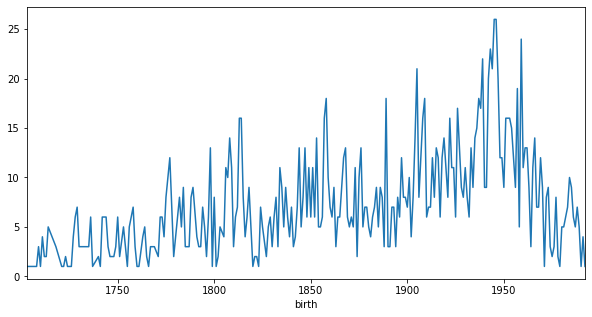

In [119]:
b[b.index > 1700].plot(figsize=(10,5), legend=False)

In [112]:
births[births > 1800].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [61]:
import datetime as dt

In [40]:
dates = pd.date_range("1/1/1700", "1/1/2020", periods=300)

In [79]:
import re
def str2int(num):
    x = re.findall("[0-9]+", num)
    if x != []:
        res = int(x[0])
    else:
        res = 1000
    return res

In [86]:
births = df.groupby('birth')['lifespan'].count()

In [92]:
births

birth
742      1
935      1
1000     2
1056     1
1067     1
1155     1
1178     2
1204     1
1214     2
1304     1
1313     1
1483     2
1488     1
1490     3
1520     1
1528     1
1535     1
1538     3
1545     4
1564     1
1567     1
1574     1
1579     1
1580     1
1587     5
1593     1
1596     1
1602     1
1603     1
1608     1
        ..
1963     9
1964     3
1965    11
1966    14
1967     7
1968     7
1969    12
1970     9
1971     1
1972     8
1973     9
1974     3
1975     2
1976     3
1977     8
1978     2
1979     1
1980     5
1981     5
1982     6
1983     7
1984    10
1985     9
1986     6
1987     5
1988     7
1989     5
1990     1
1991     4
1992     1
Name: lifespan, Length: 319, dtype: int64

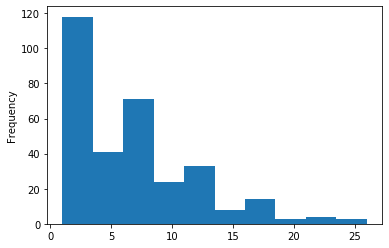

In [91]:
births.plot.hist()

In [129]:
df.to_json('authority.json')